# **Problem Statement**

The objective of this project is to apply Exploratory Data Analysis (EDA) on a loan application dataset to identify patterns that indicate a high likelihood of default. The goal is to help a consumer finance company minimize financial risk by identifying key factors that influence loan repayment. Insights from the analysis will enable the company to make informed decisions such as rejecting high-risk applicants, offering adjusted loan terms, or charging higher interest rates for riskier loans. Ultimately, the project aims to ensure creditworthy applicants are not denied while reducing the risk of loan defaults.

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use('ggplot')
sns.set_style('ticks')

In [2]:
# loading the files
df1=pd.read_csv('Application_data.csv')

In [3]:
# checking no. of rows and columns in dataset
df1.shape

(307511, 122)

# **Data Cleaning**

In [4]:
# checking for null valus in dataset
100*df1.isna().mean().sort_values(ascending=False)

COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [5]:
# droping columns with more than 40% null values in dataset
df1=df1.drop([i for i in df1.columns if 100*df1[i].isna().mean()>40],axis=1)

In [6]:
# now checking no. of rows and columns in dataset
df1.shape

(307511, 73)

In [7]:
# again checking for null values in dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [30]:
# Filling null values of numerical columns with median and that of categorical columns with mode
for column in df1.columns:
        if df1[column].dtype == 'object':
            df1[column].fillna(df1[column].mode()[0], inplace=True)
        else:
            df1[column].fillna(df1[column].median(), inplace=True)

In [9]:
# checking null values in dataset
df1.isna().sum().sum()

0

# Detection of data imbalance in dataset

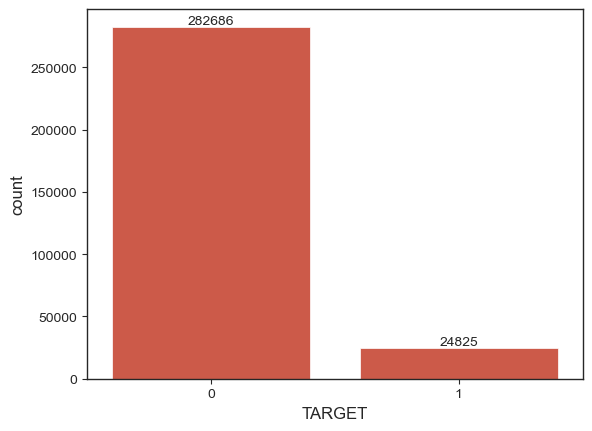

In [10]:
# plotting graph of target value
ax=sns.countplot(data=df1,x=df1['TARGET'])
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

### there are 92% value for 0 and 8% for 1 therefore there is a data imbalance in given dataset.

# **Outlier detection using boxplot**

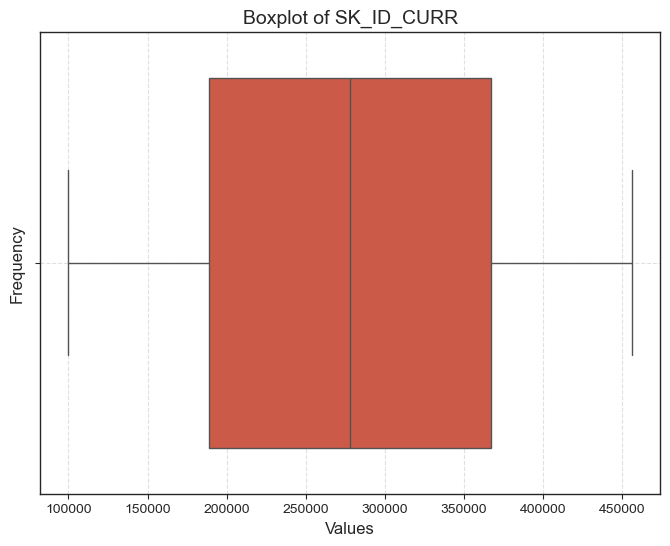

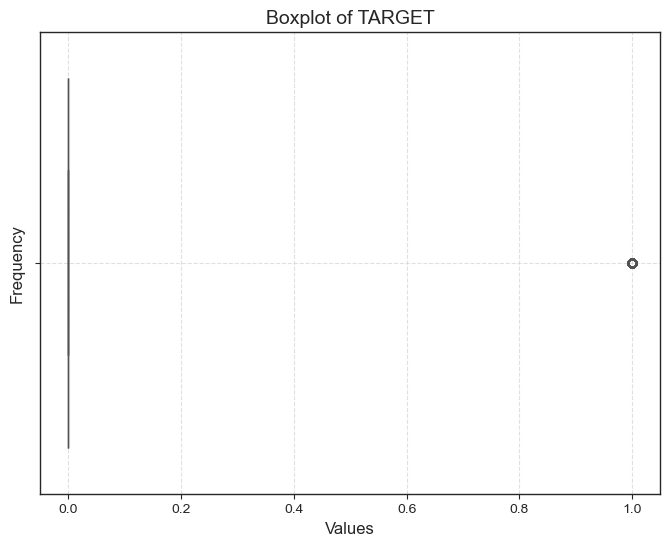

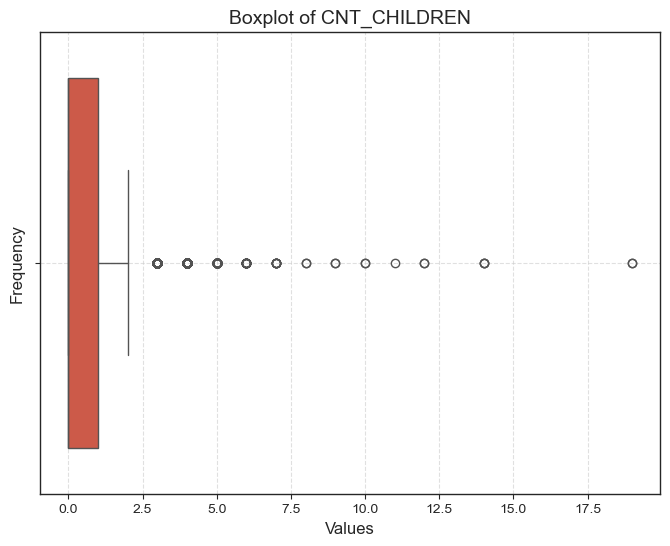

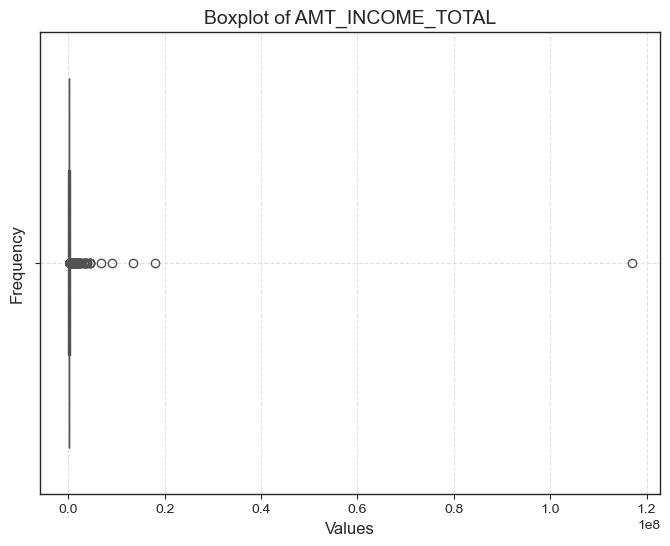

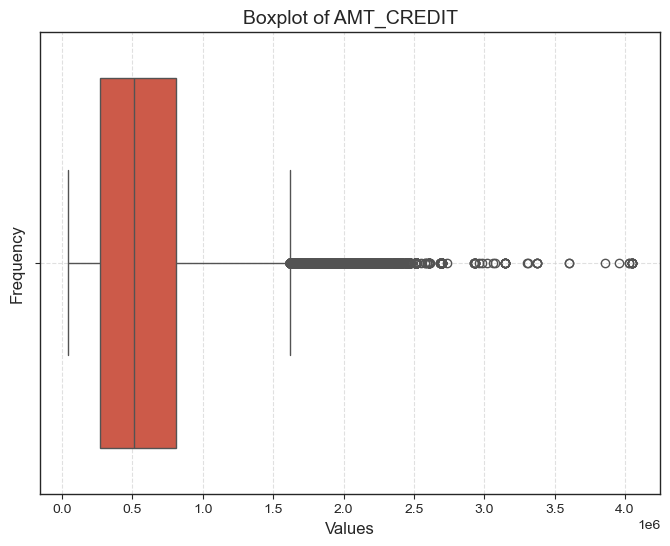

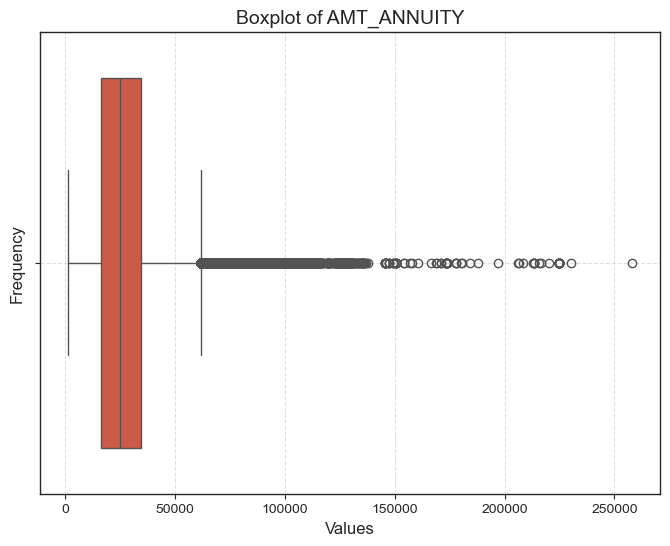

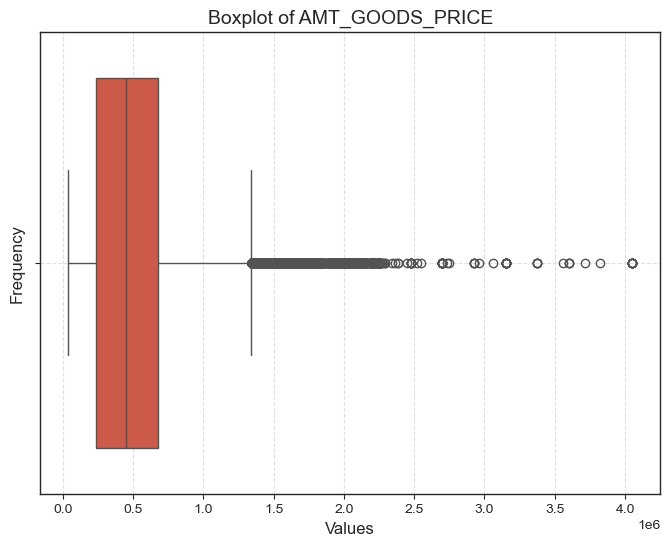

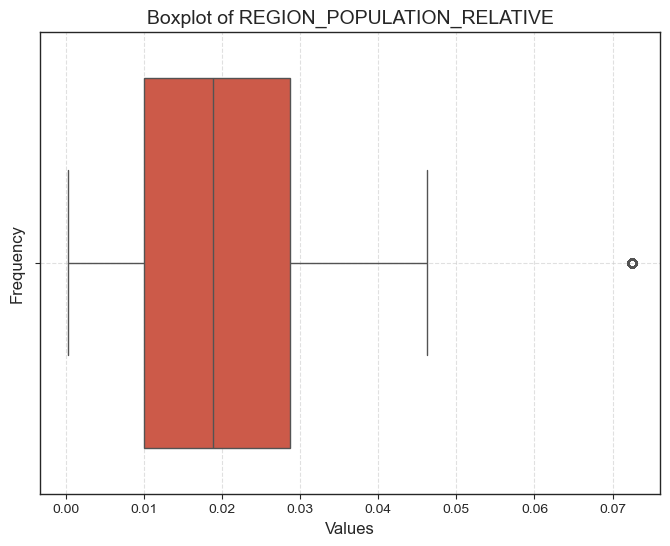

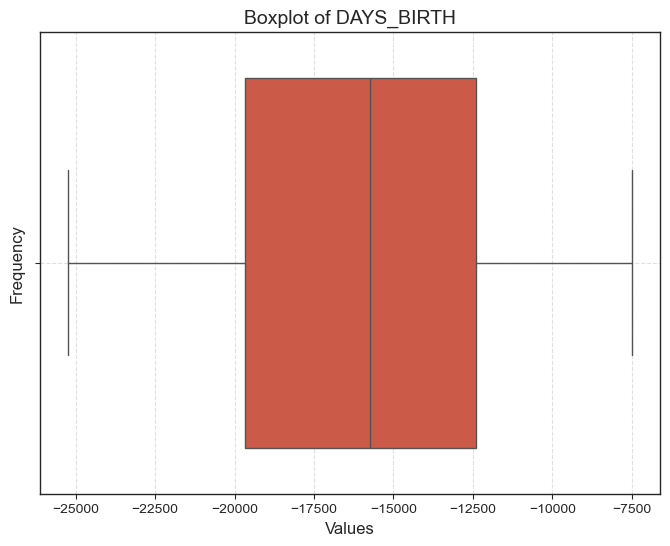

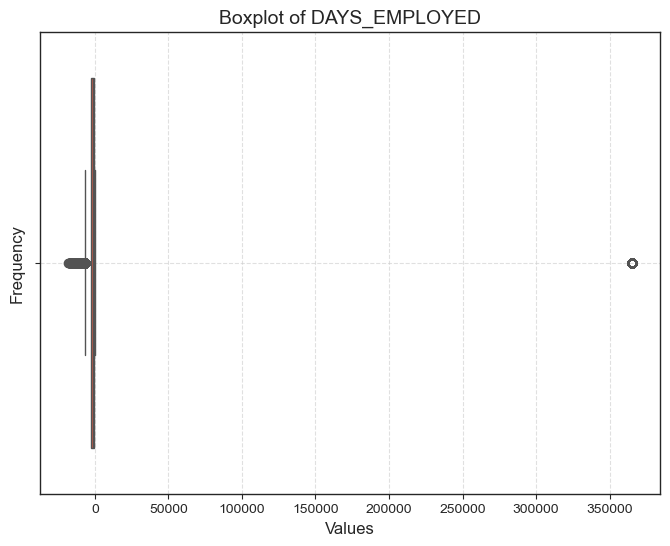

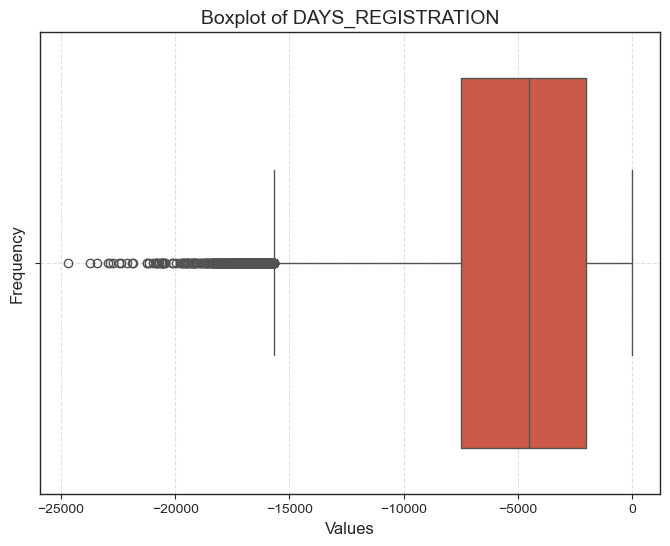

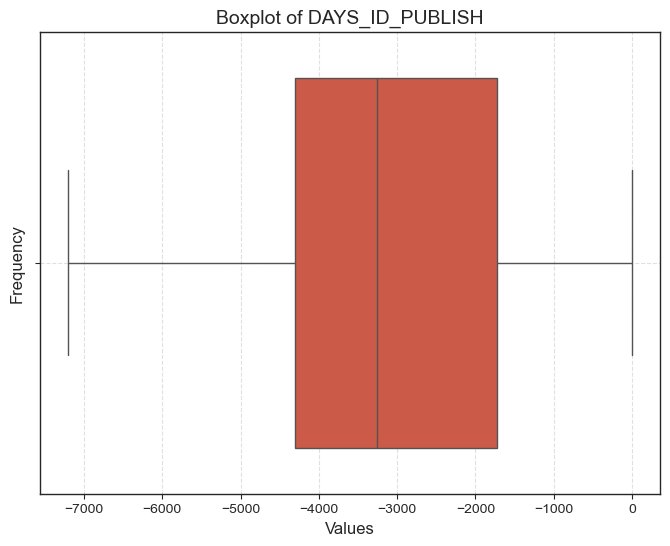

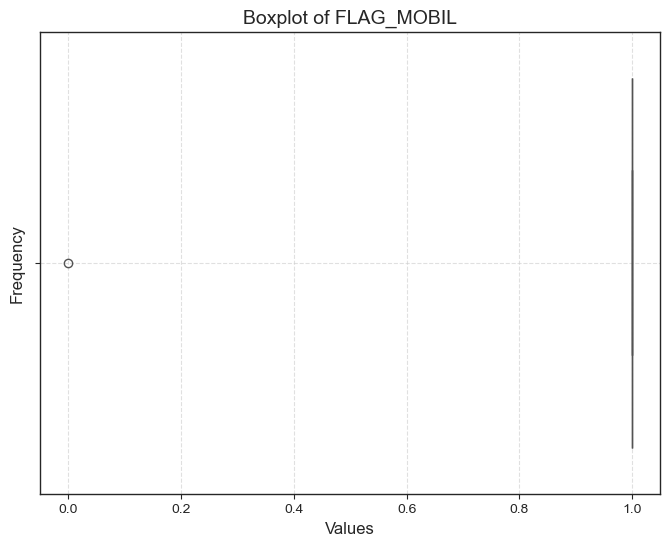

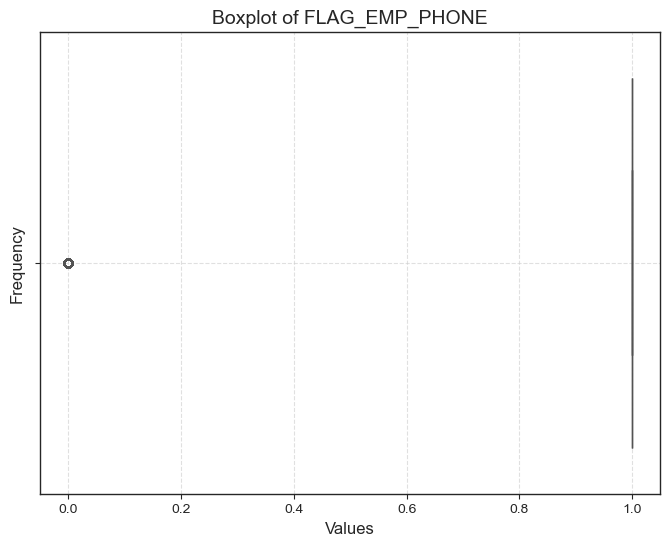

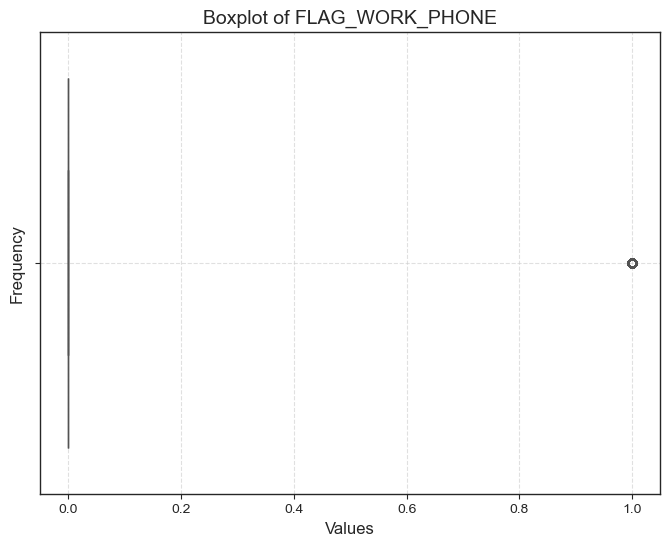

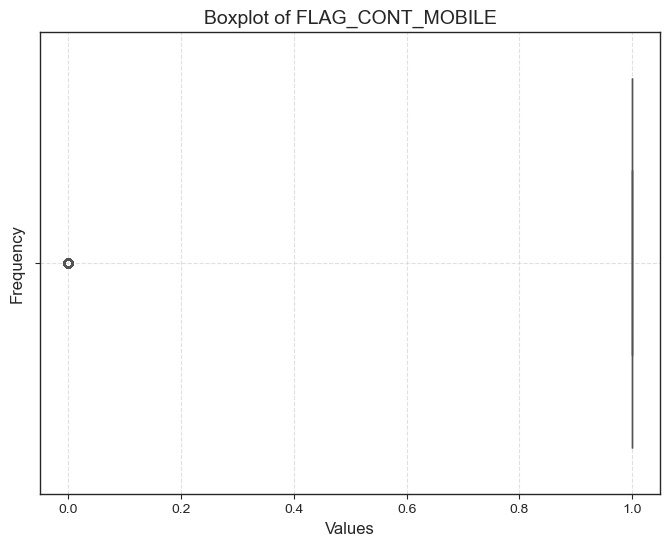

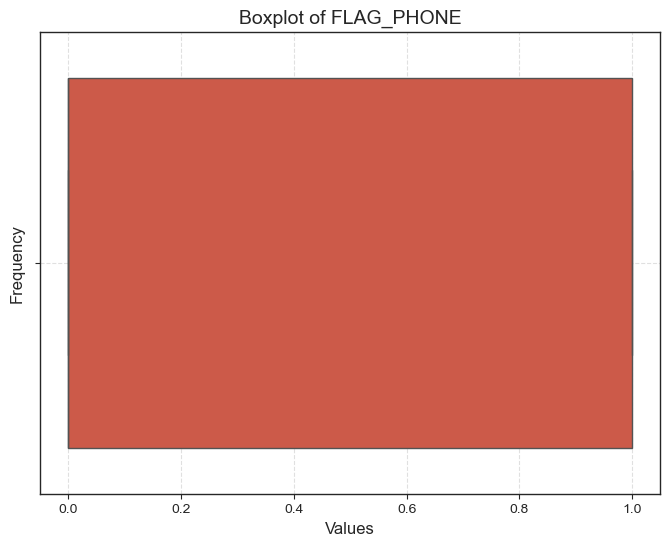

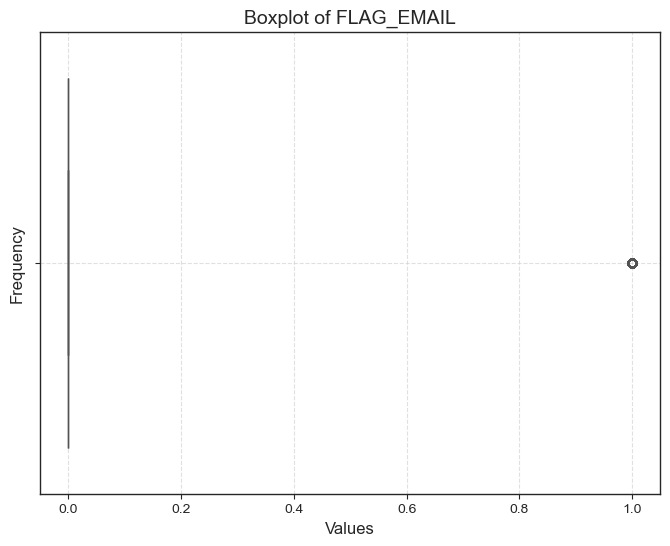

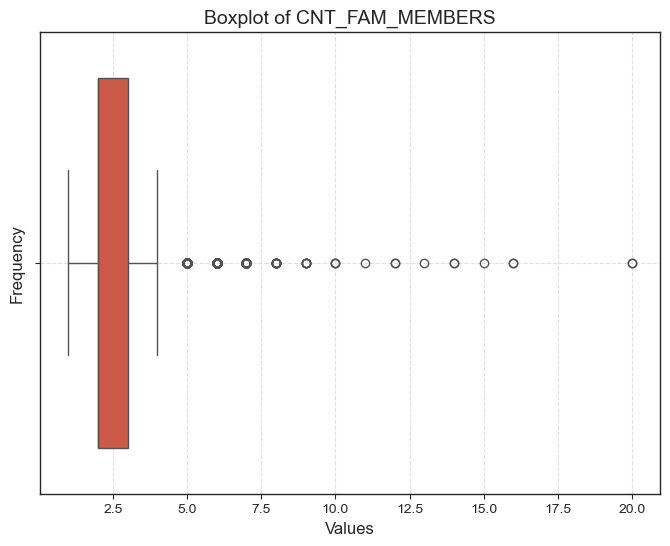

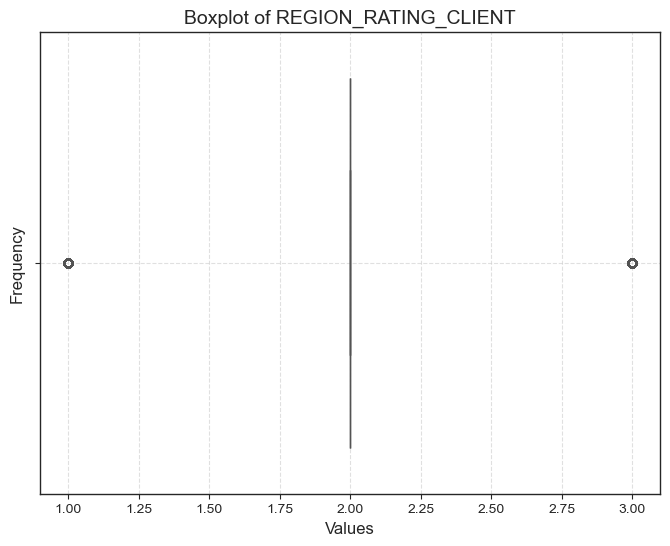

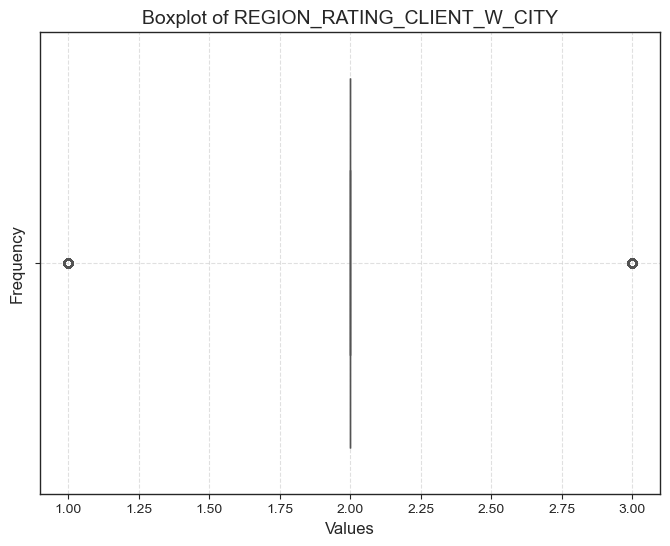

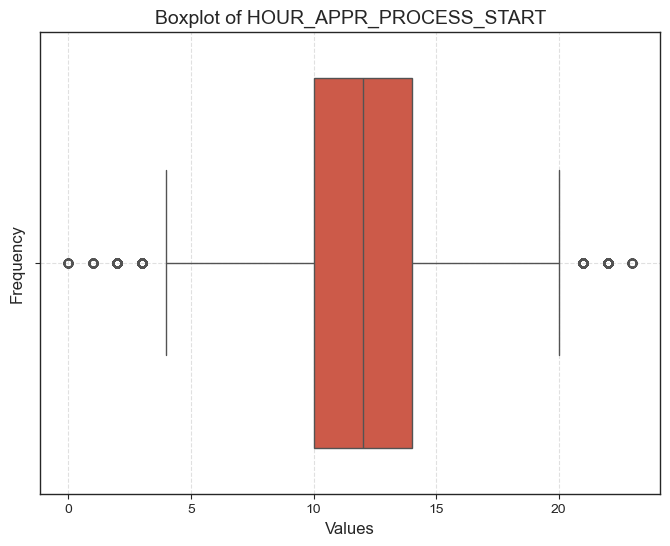

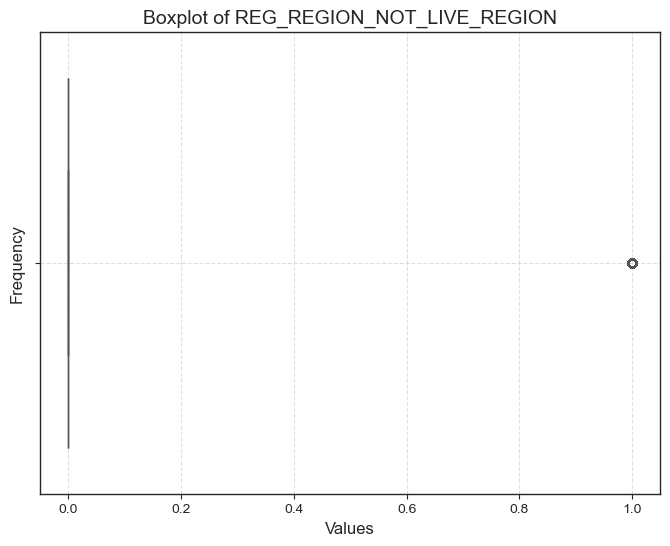

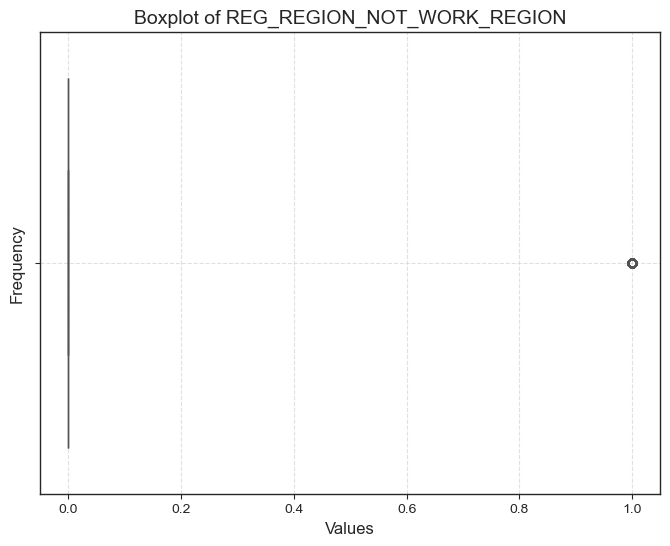

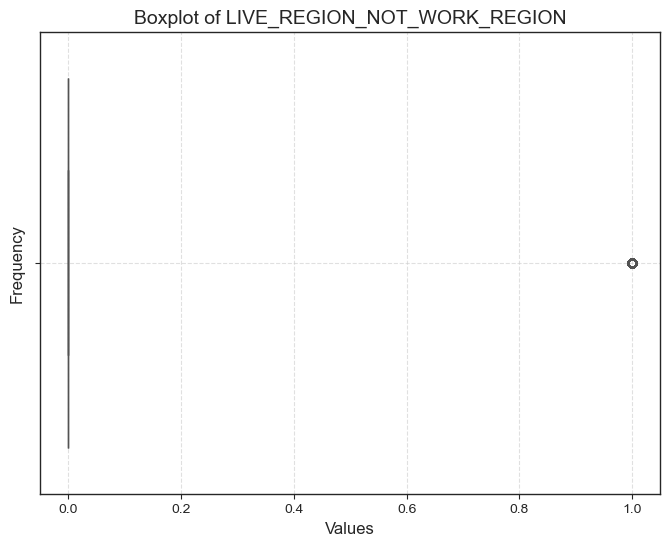

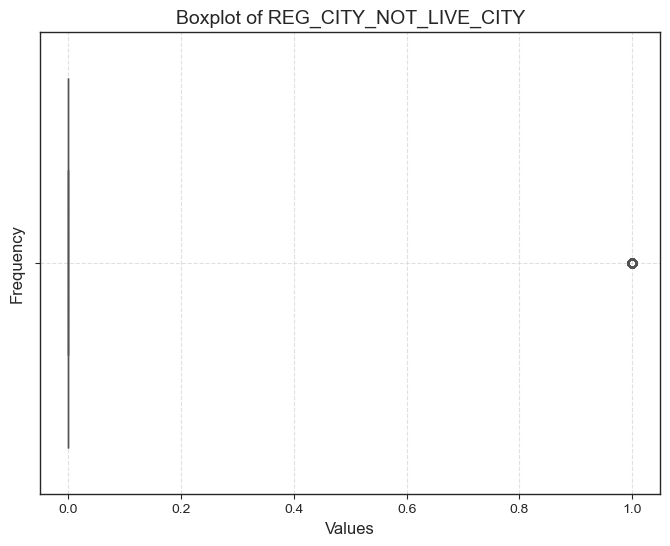

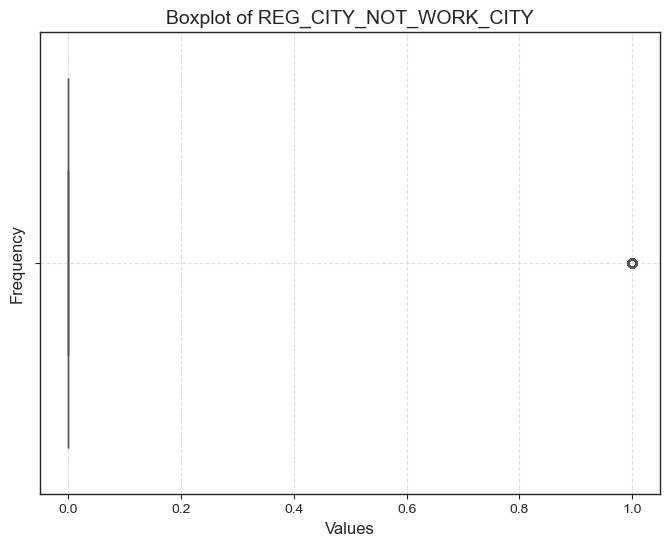

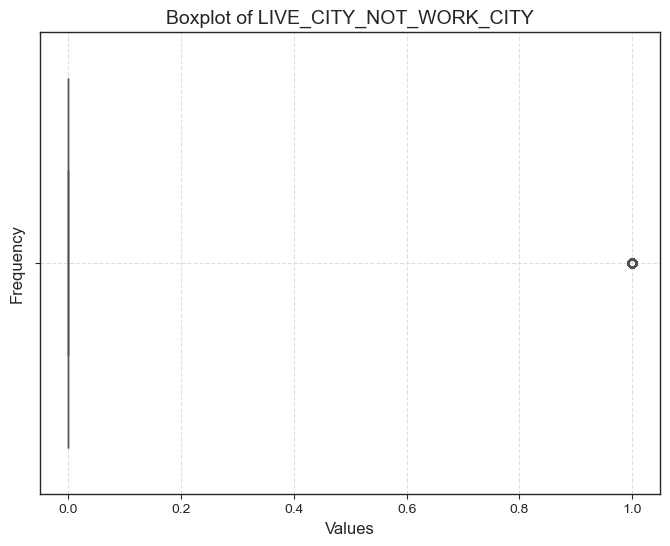

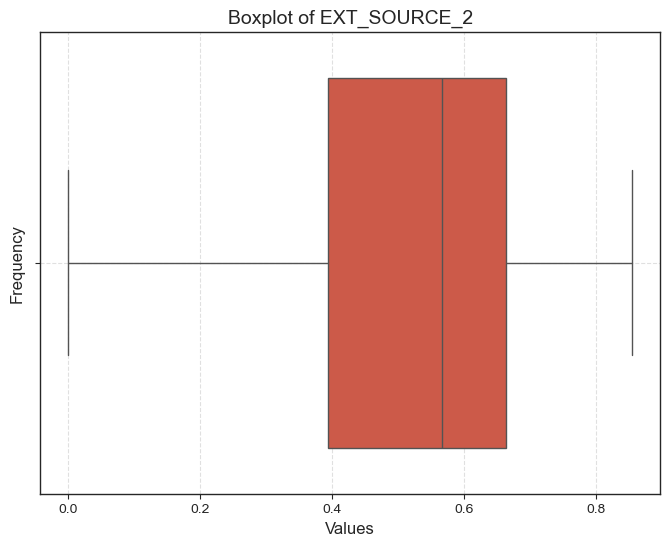

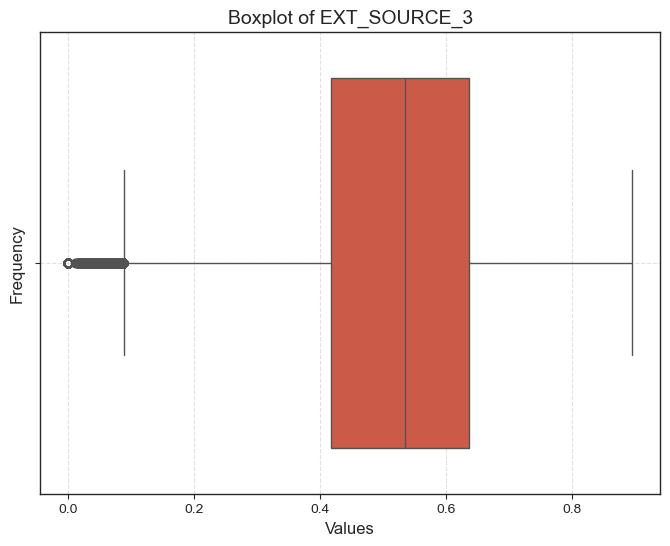

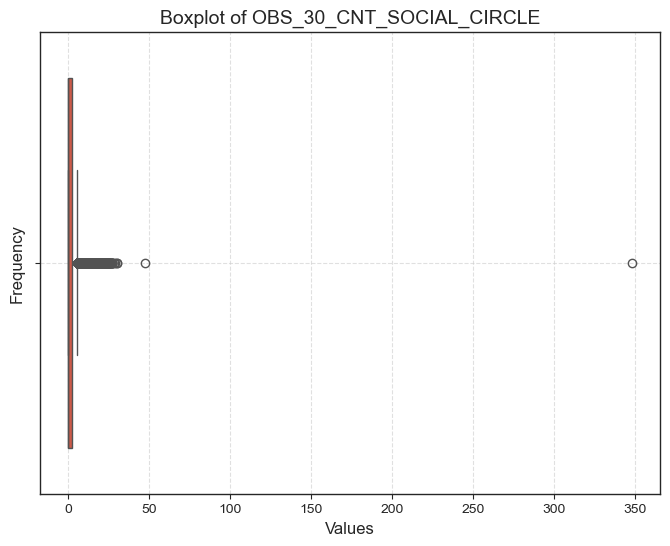

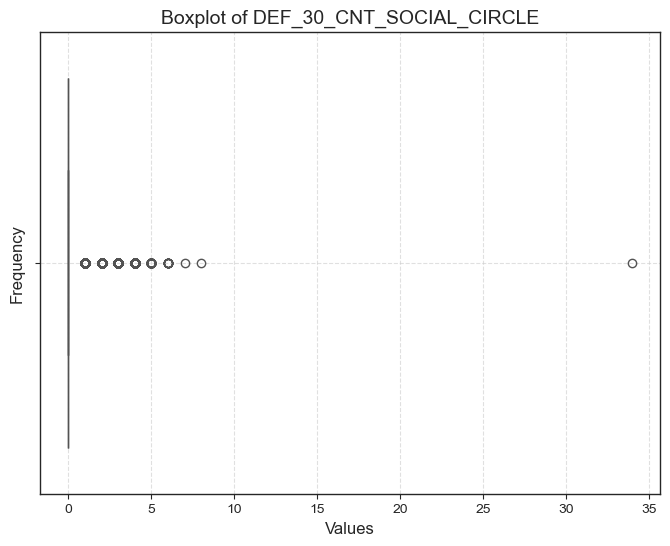

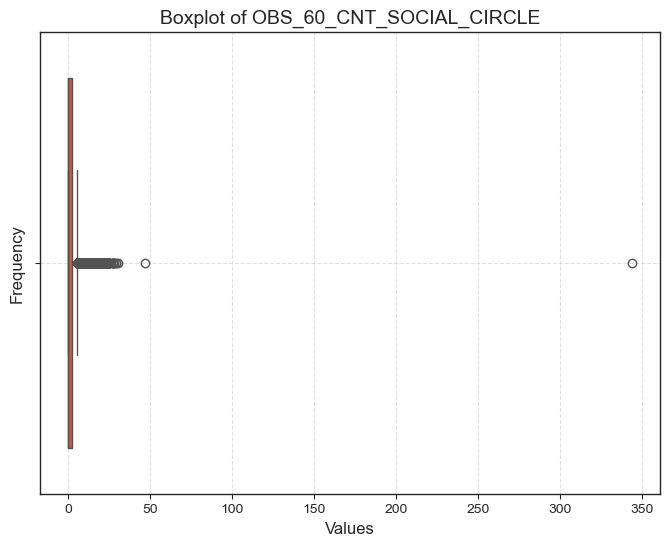

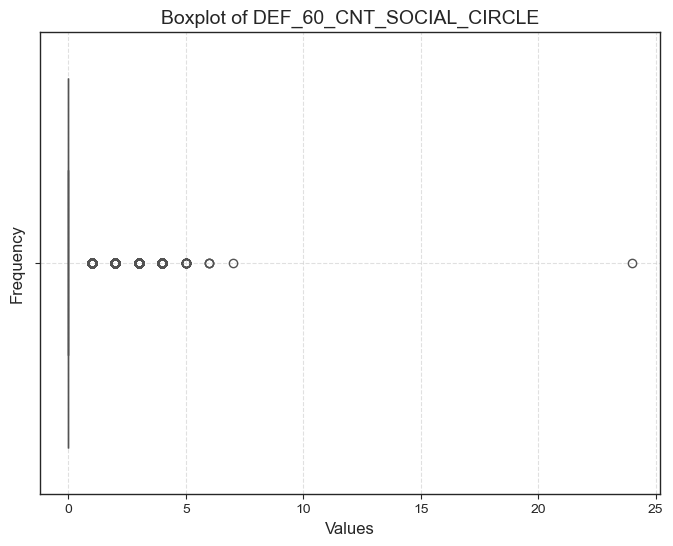

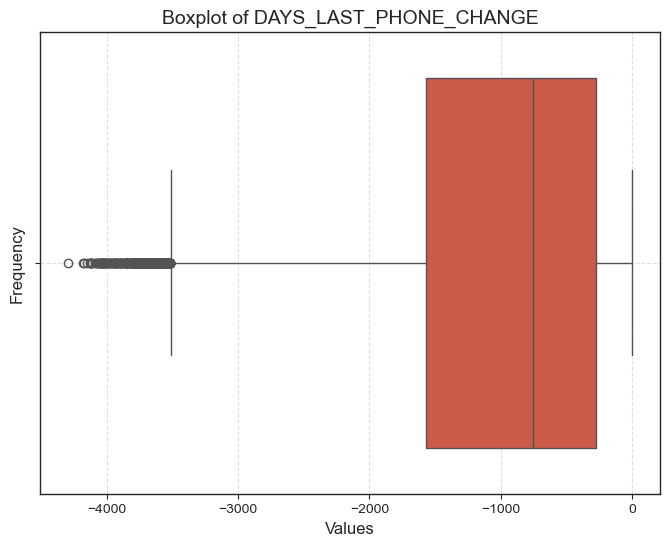

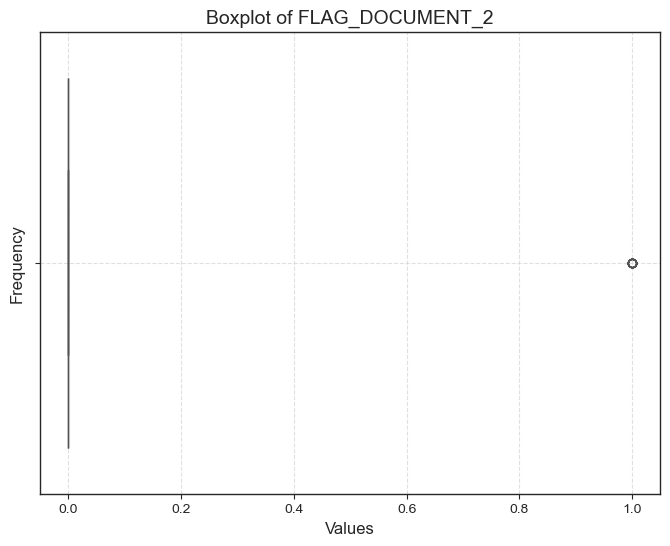

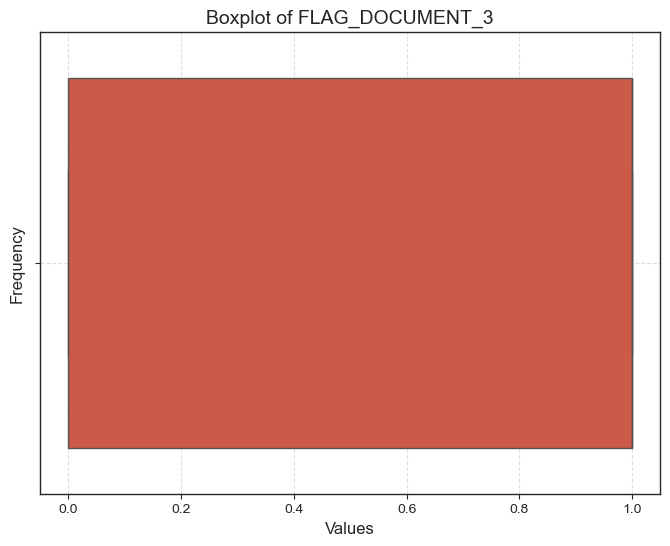

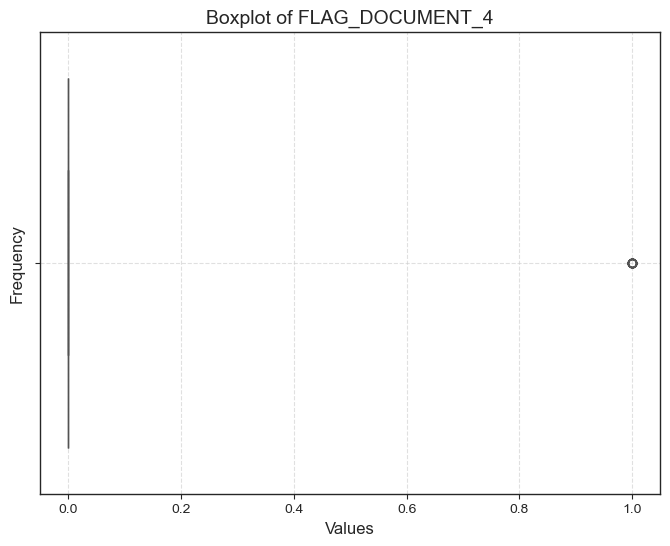

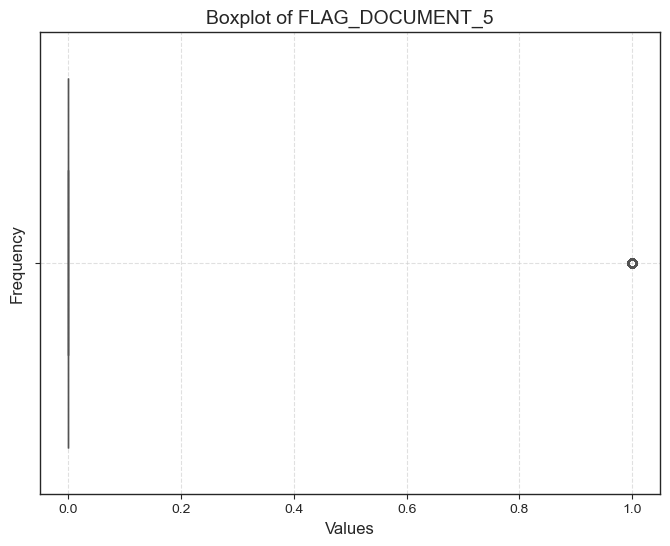

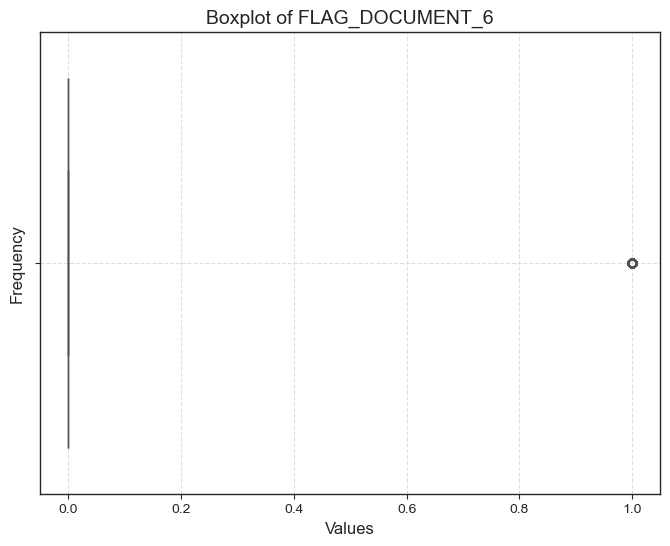

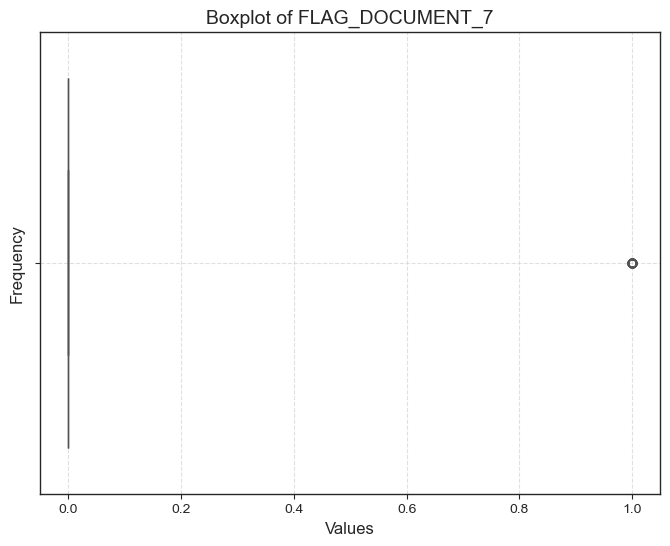

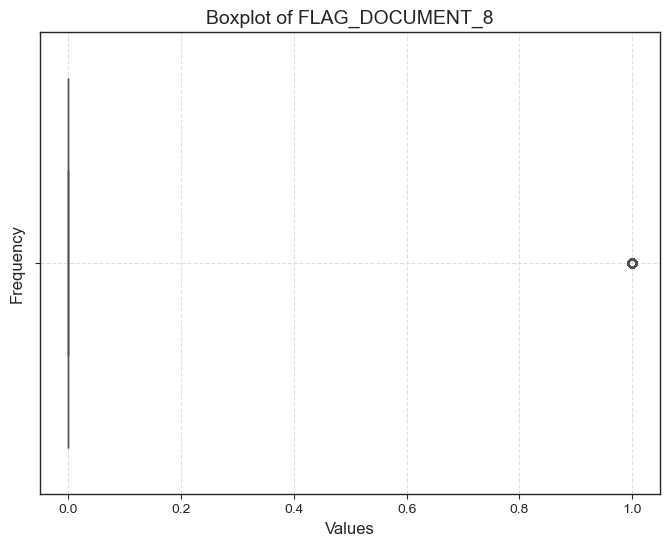

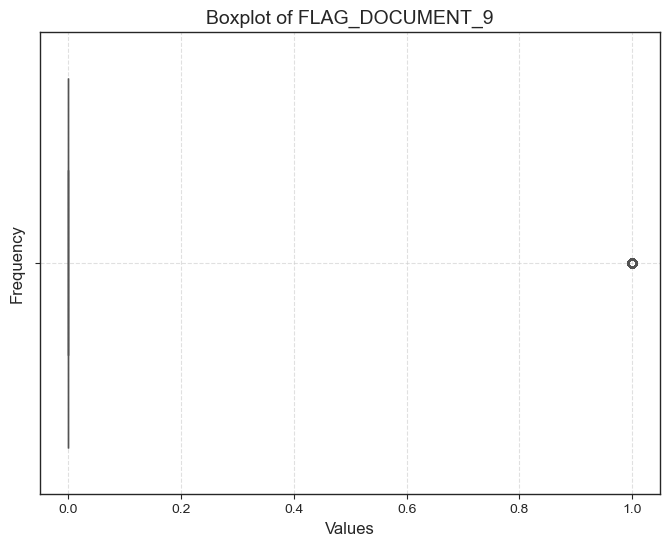

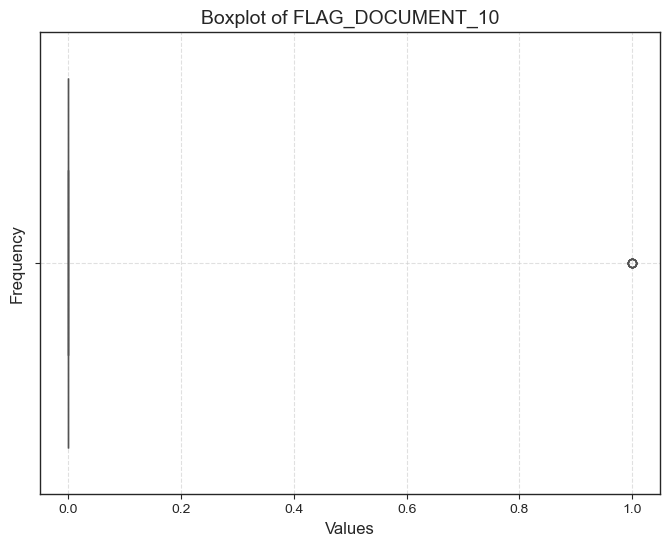

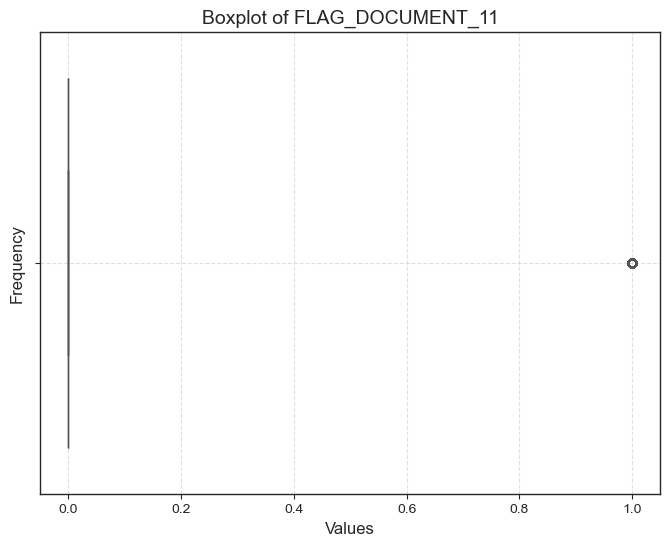

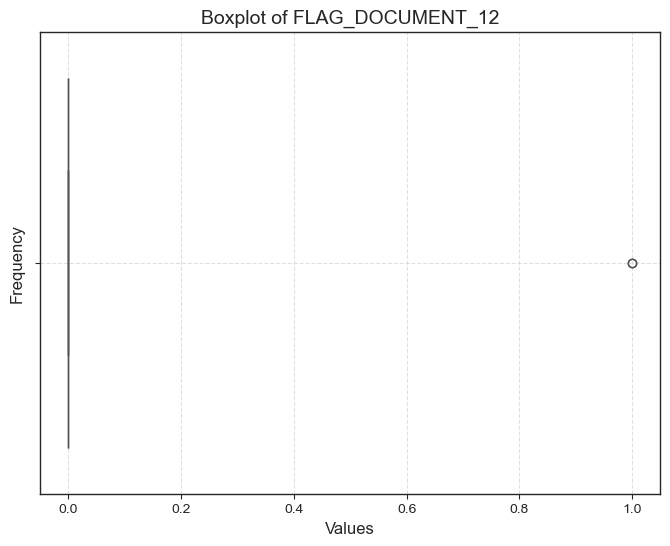

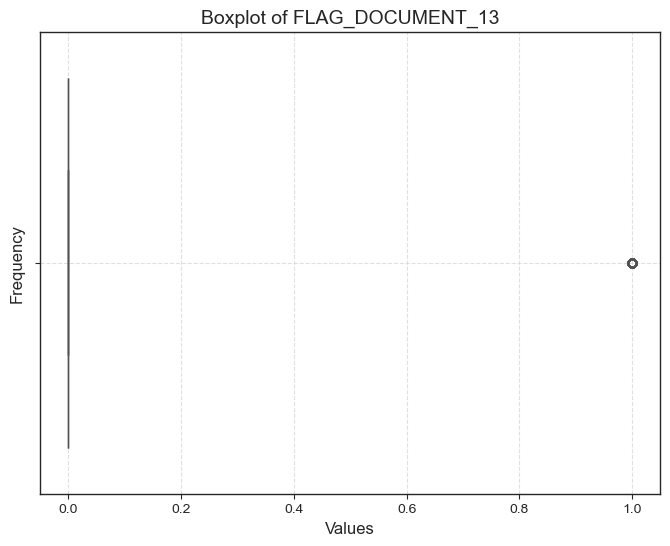

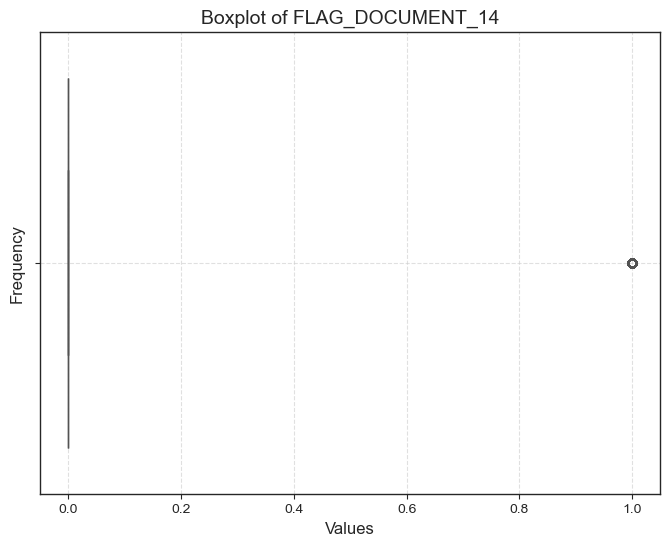

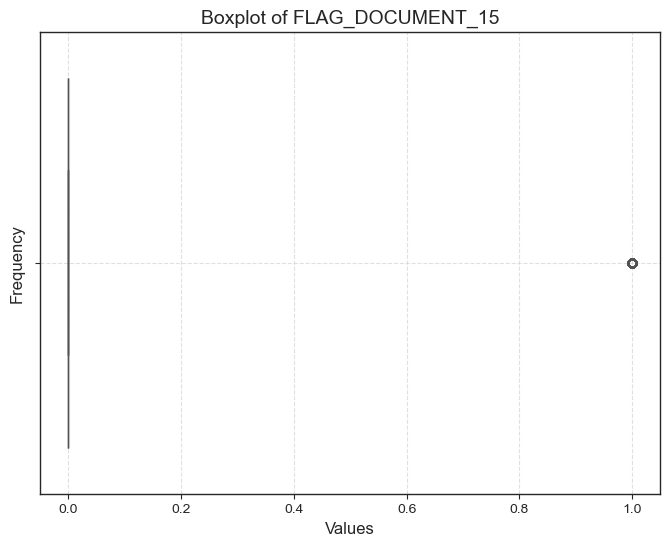

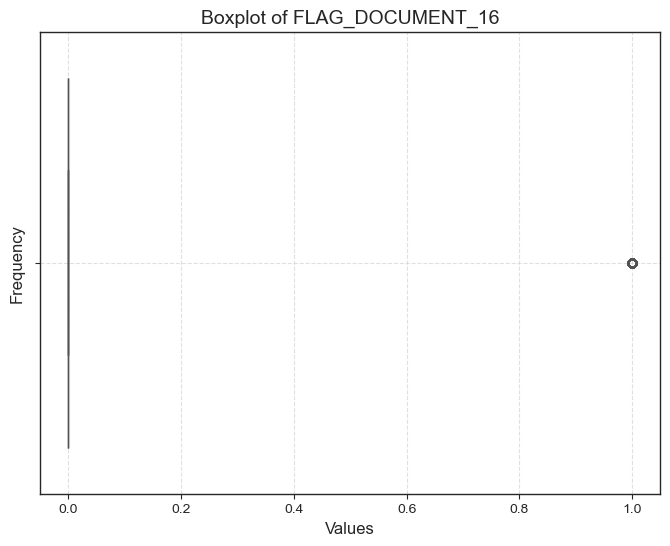

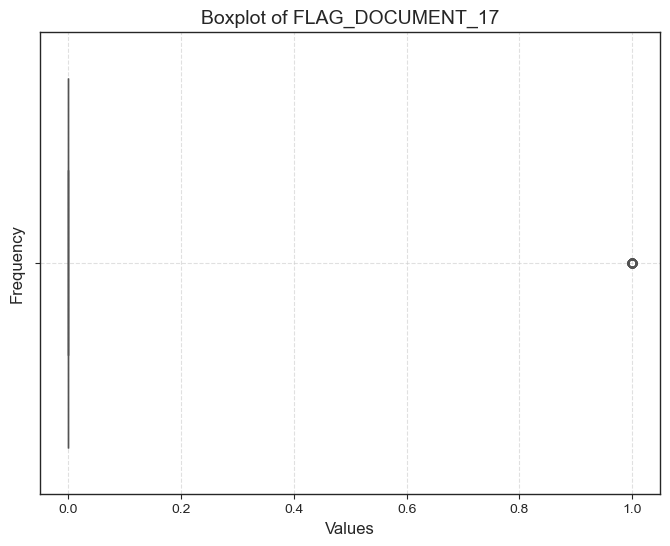

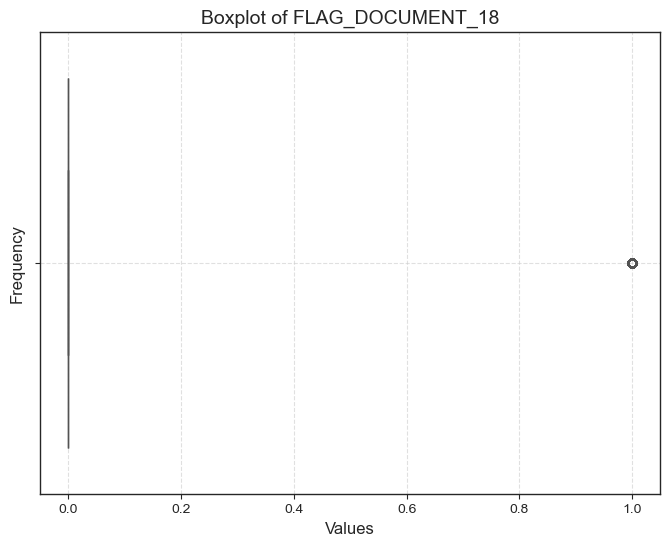

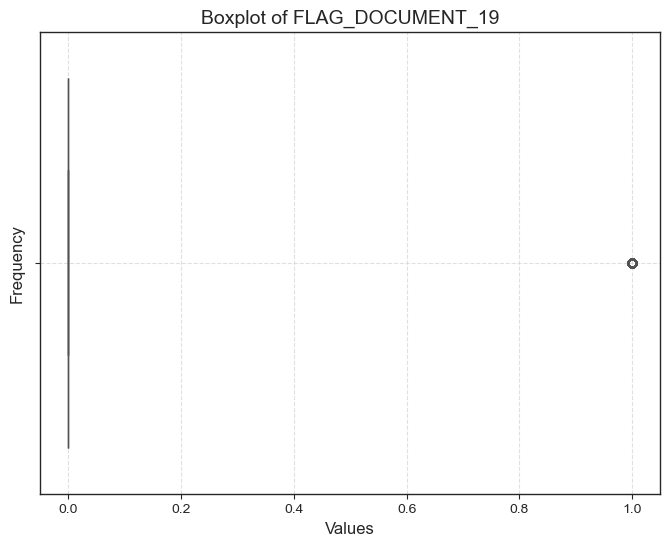

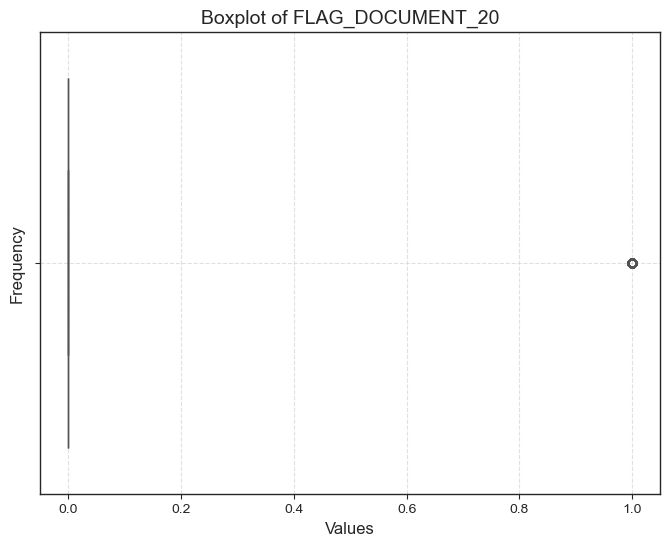

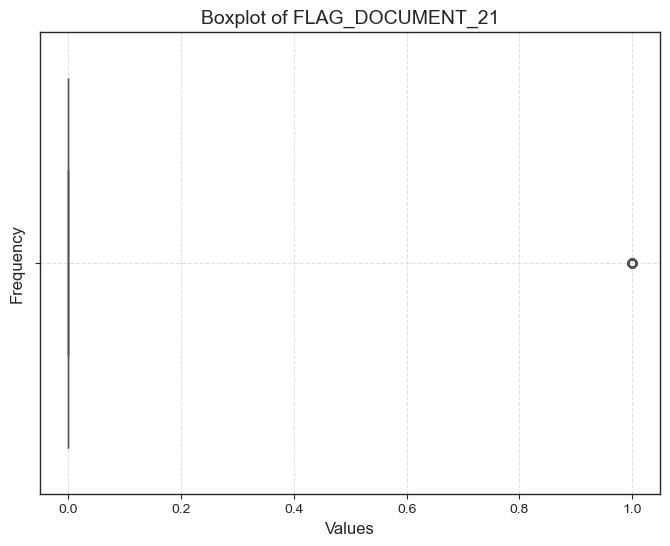

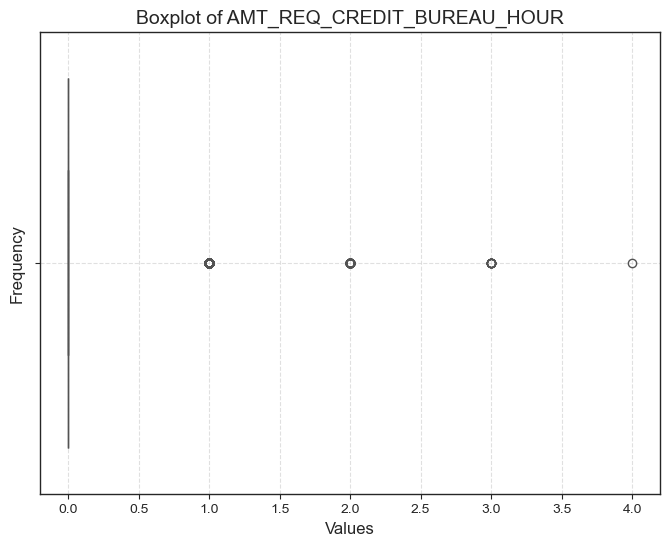

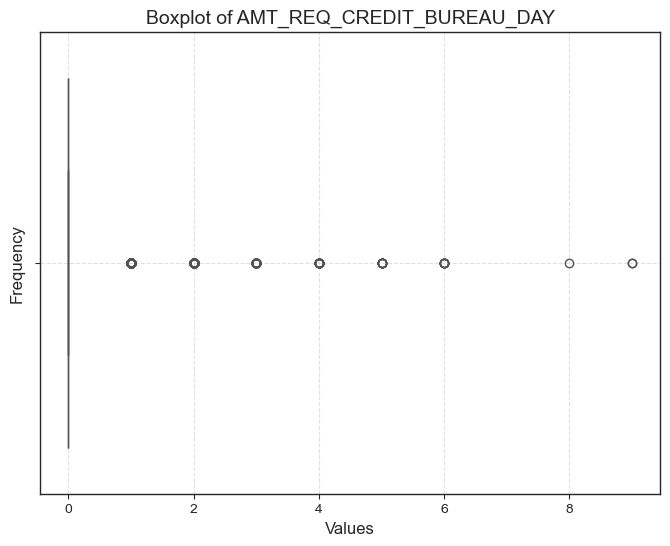

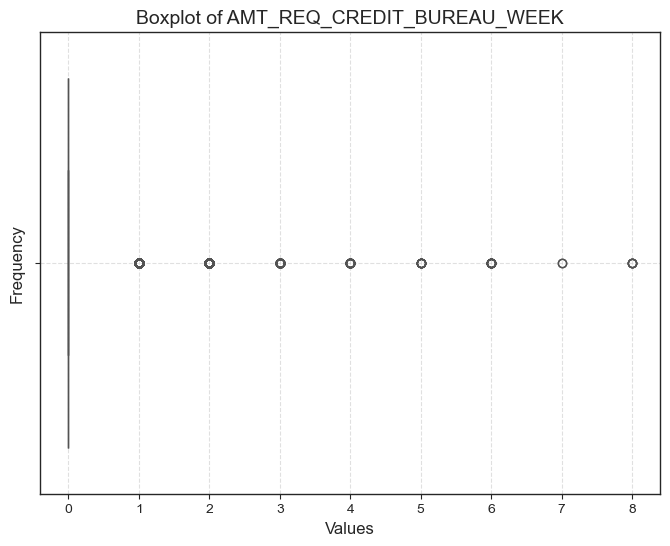

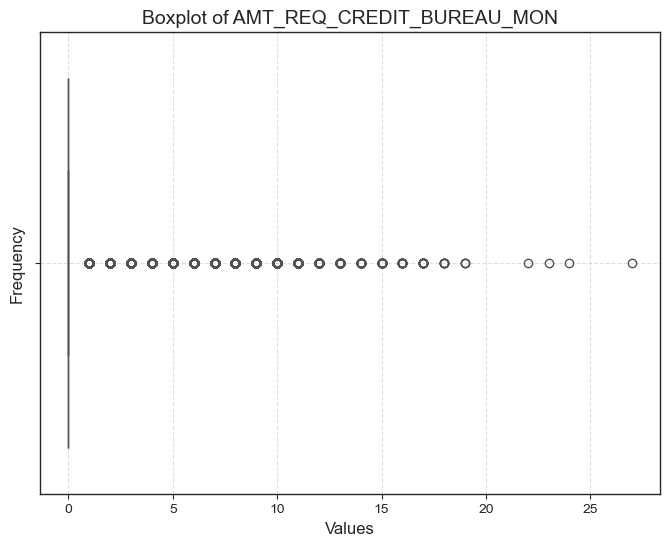

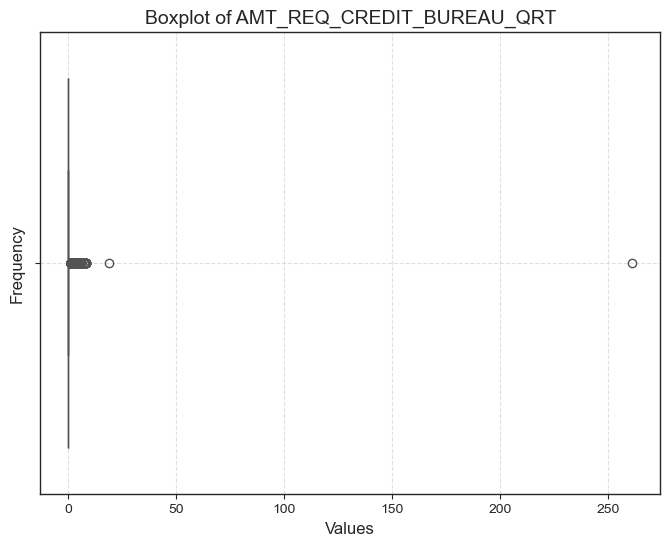

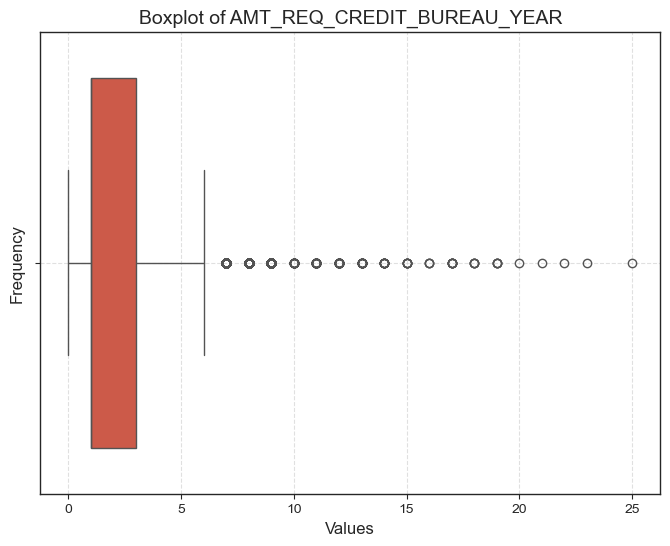

In [11]:
numerical_columns = df1.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df1, x=column)
    plt.title(f"Boxplot of {column}", fontsize=14)
    plt.xlabel("Values", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

# **Univariate Analysis**

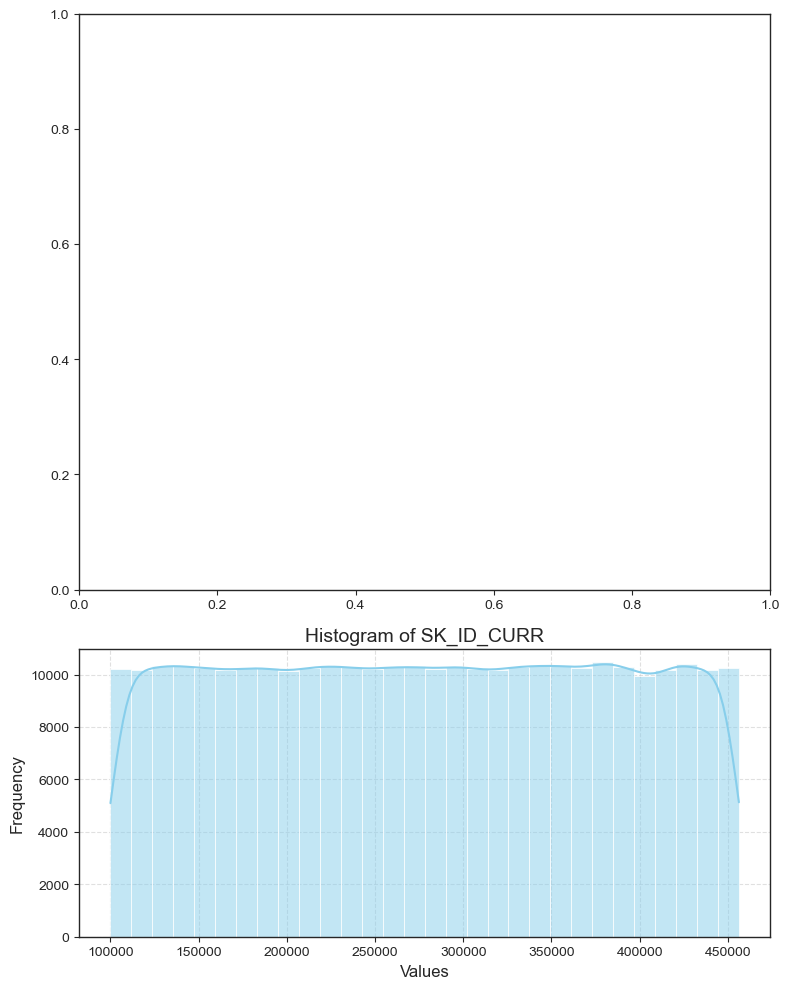

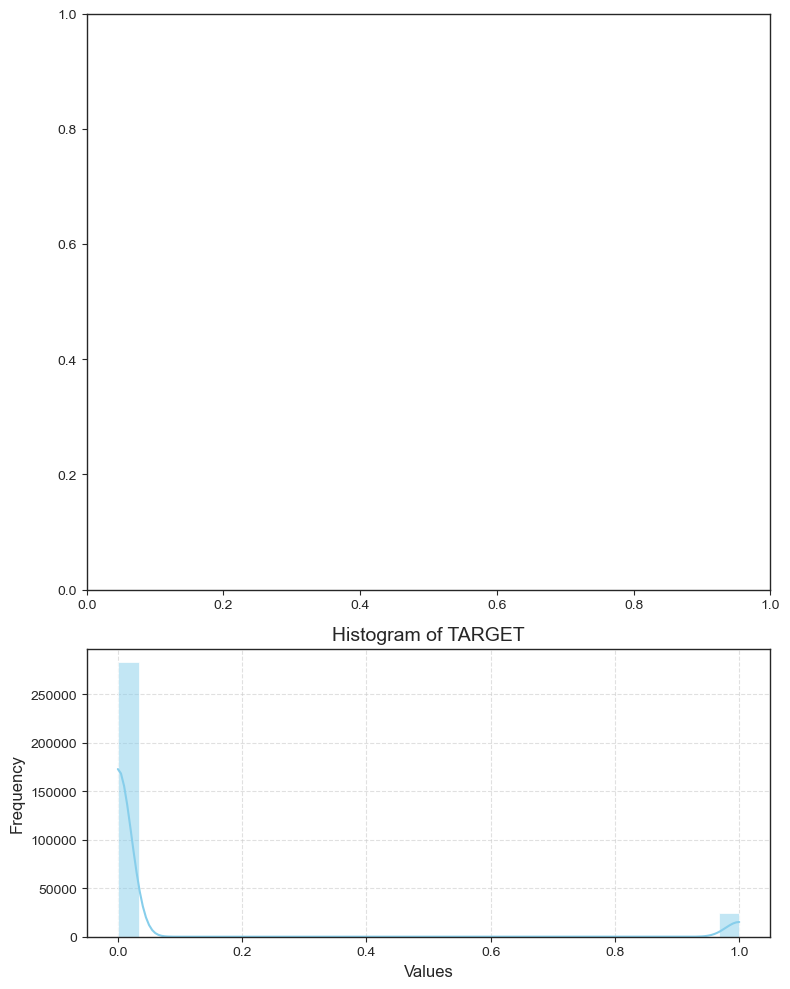

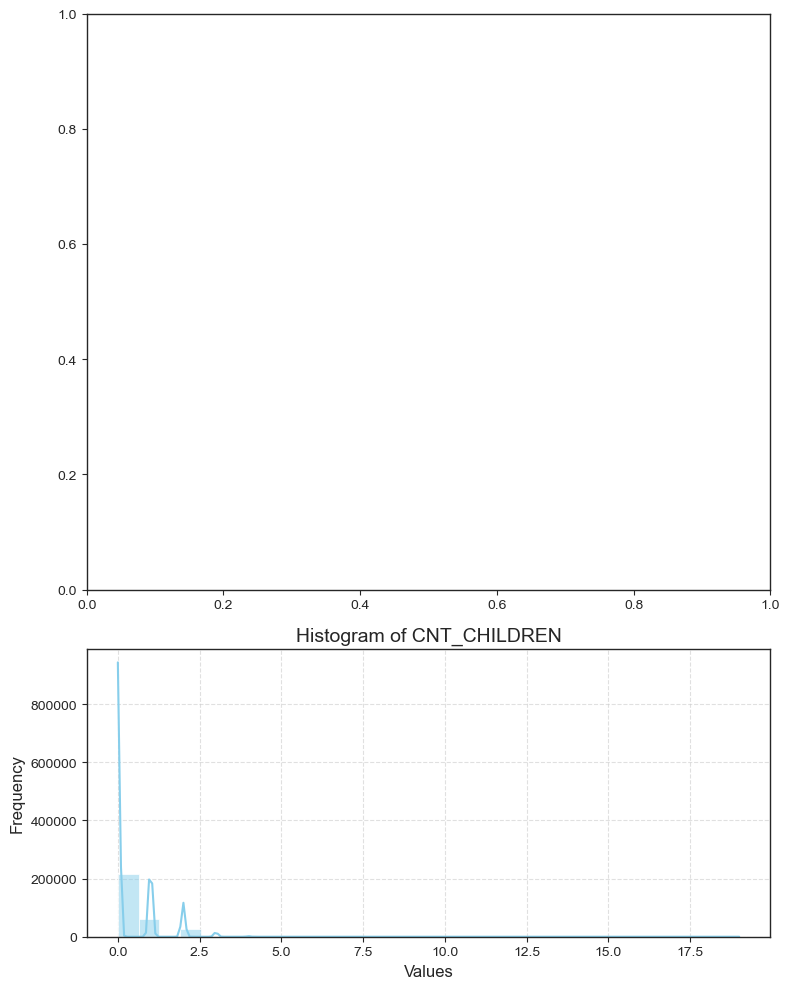

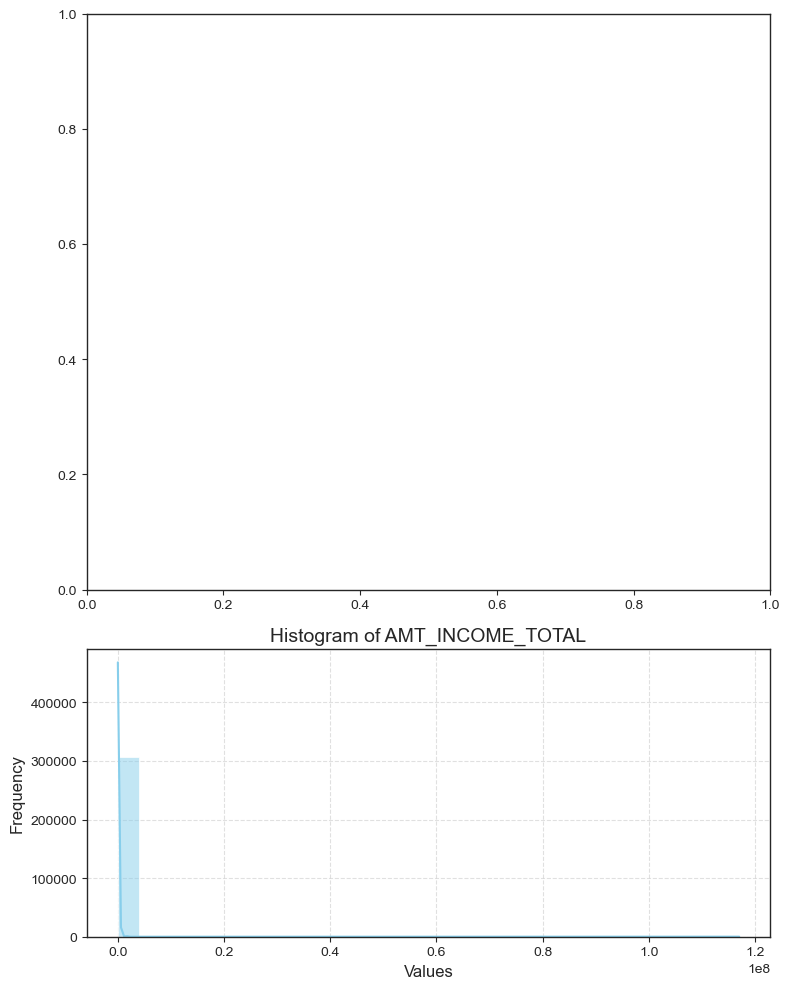

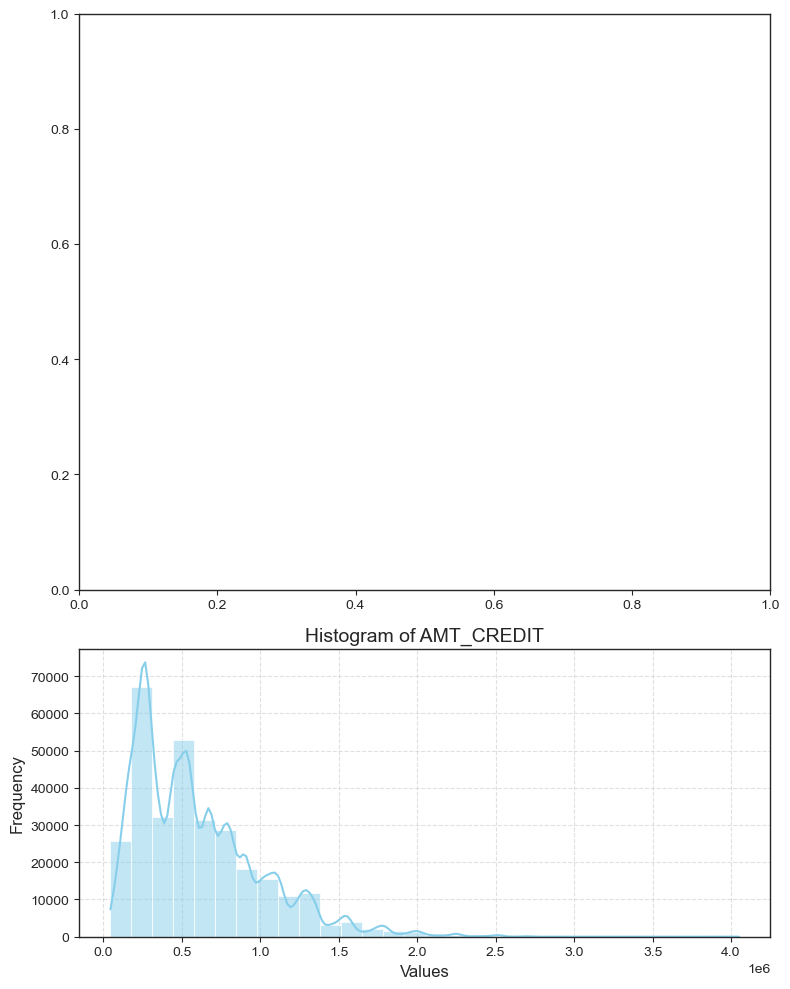

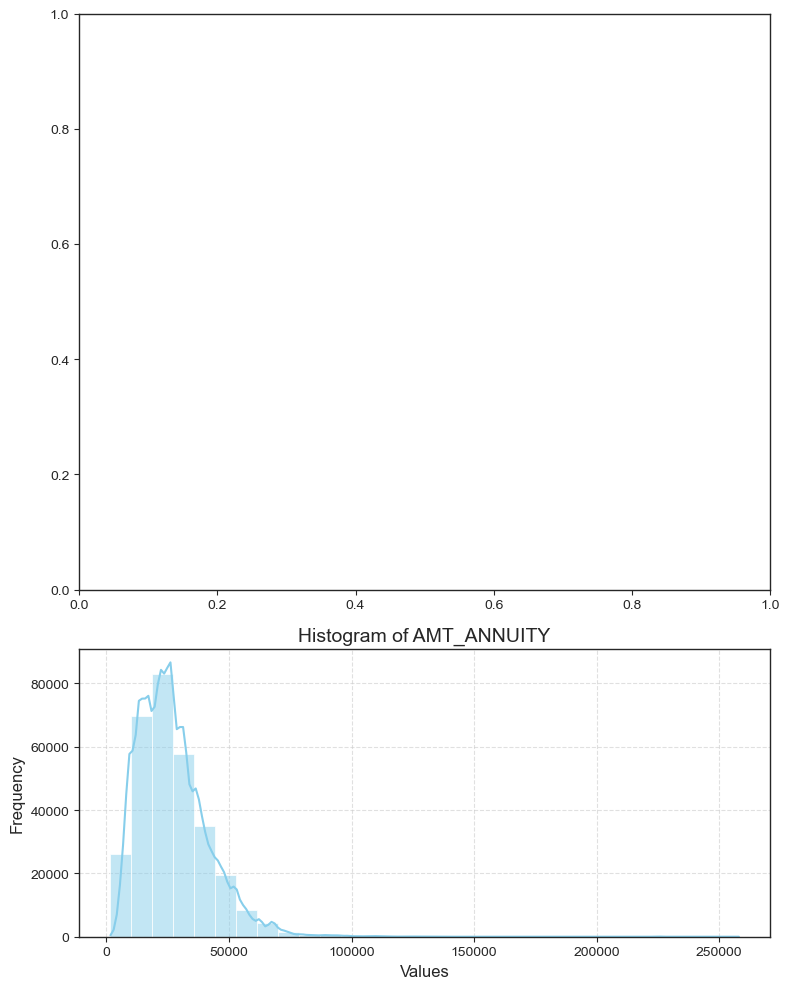

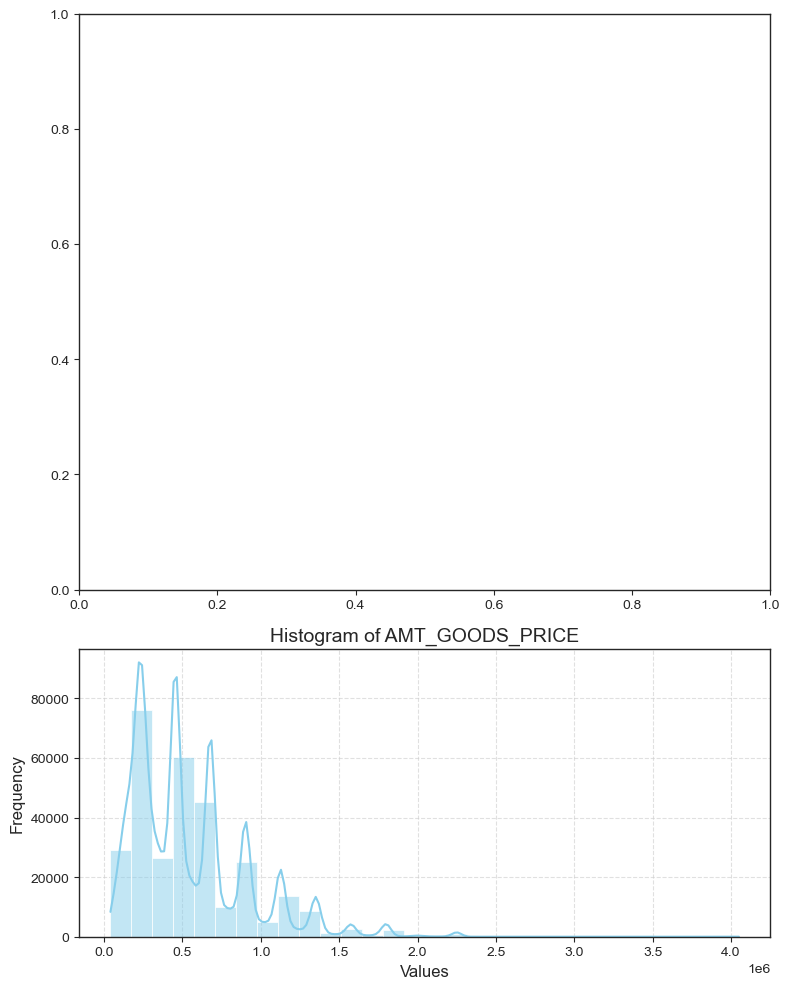

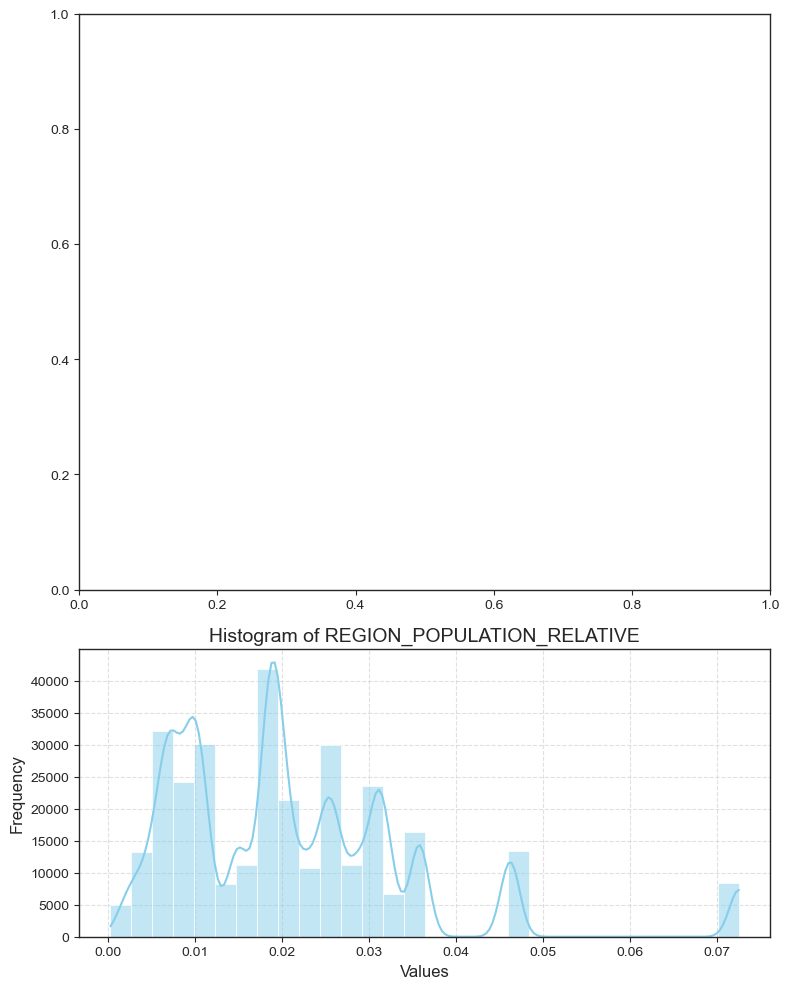

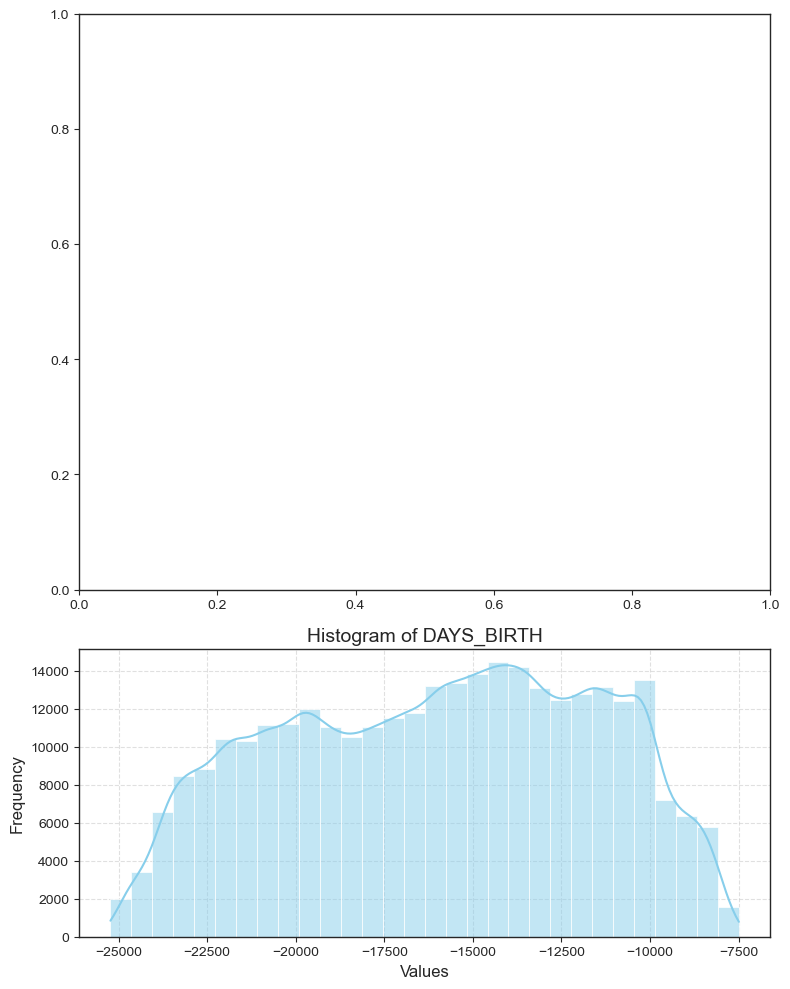

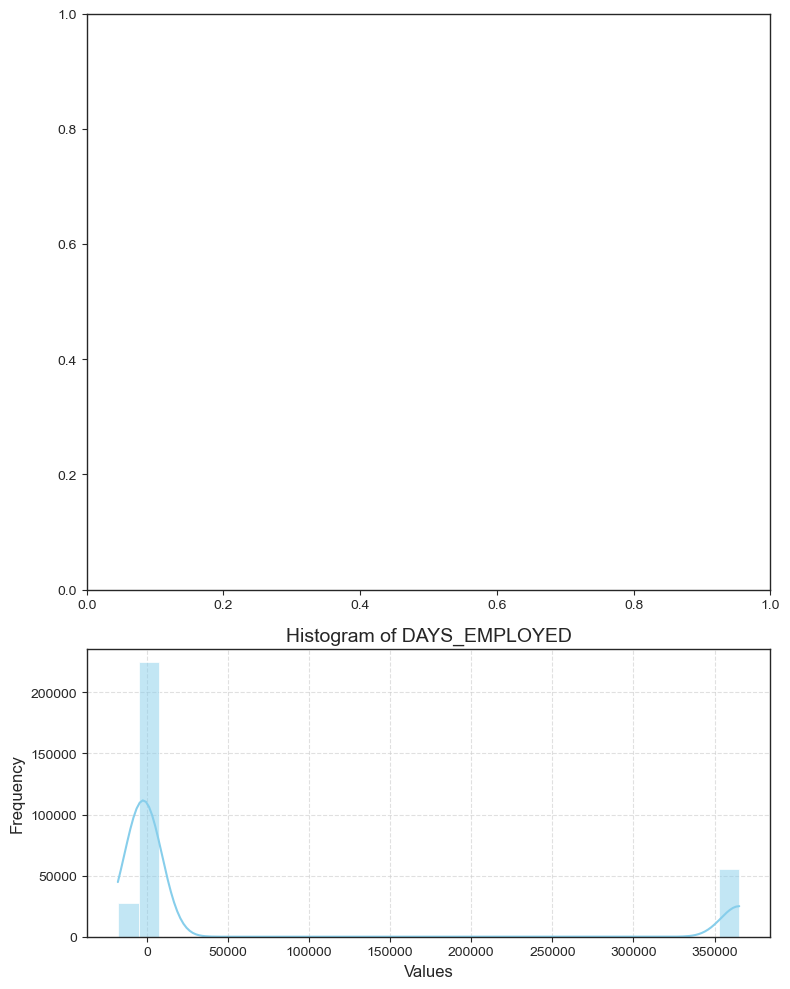

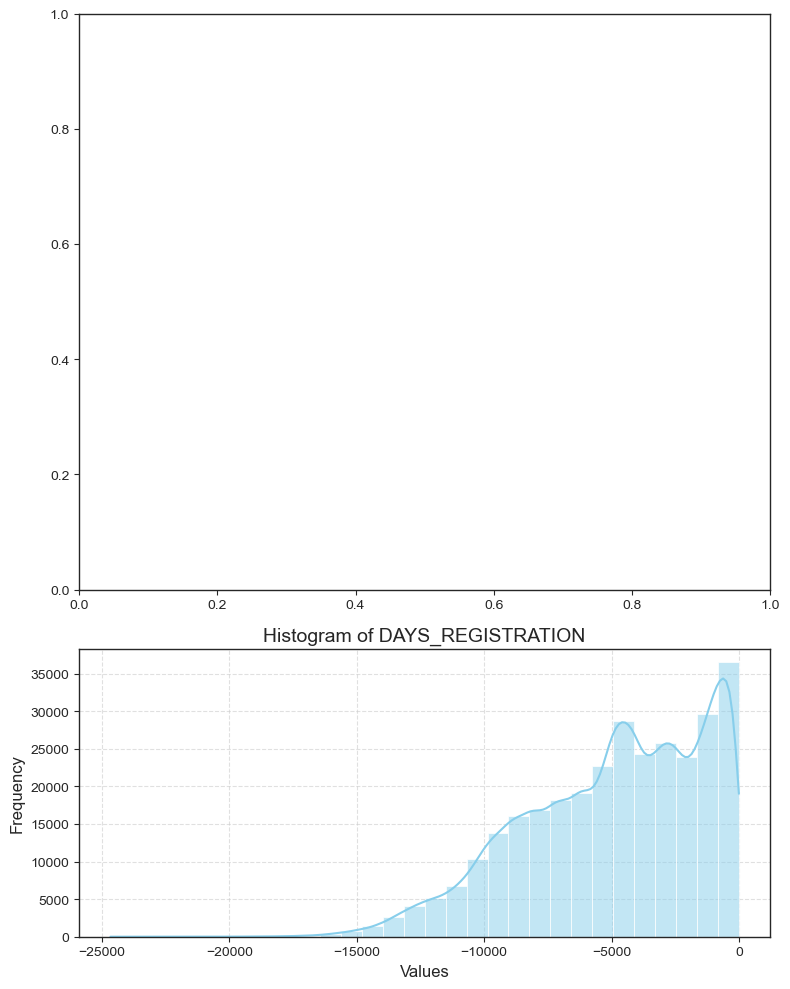

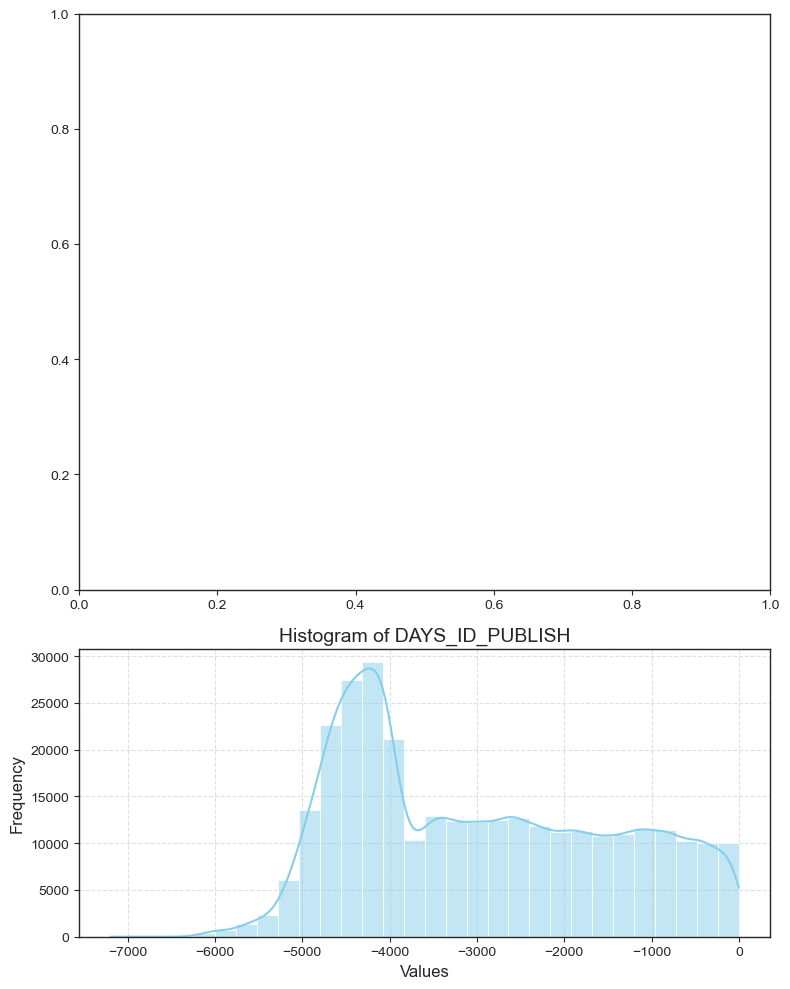

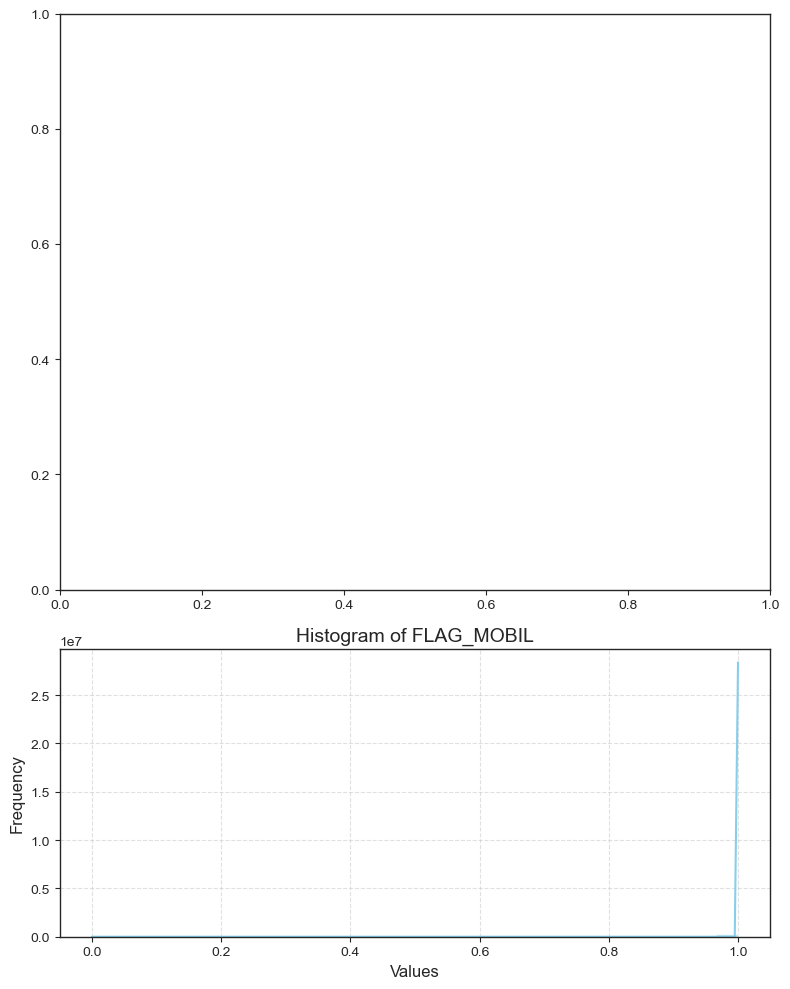

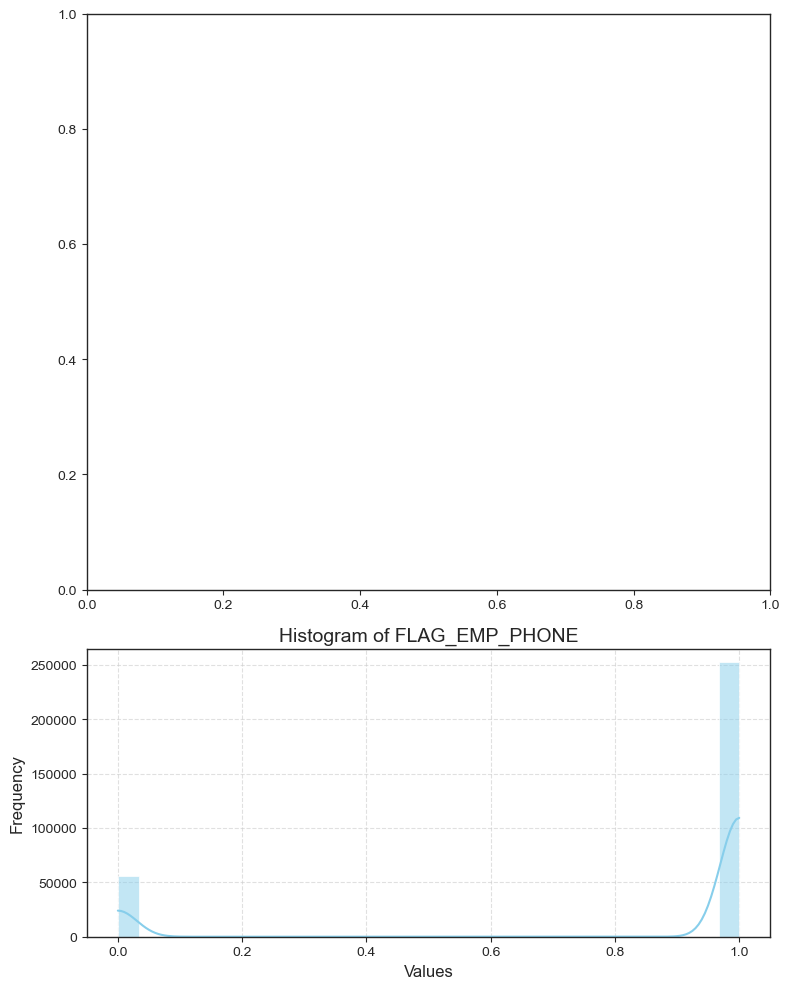

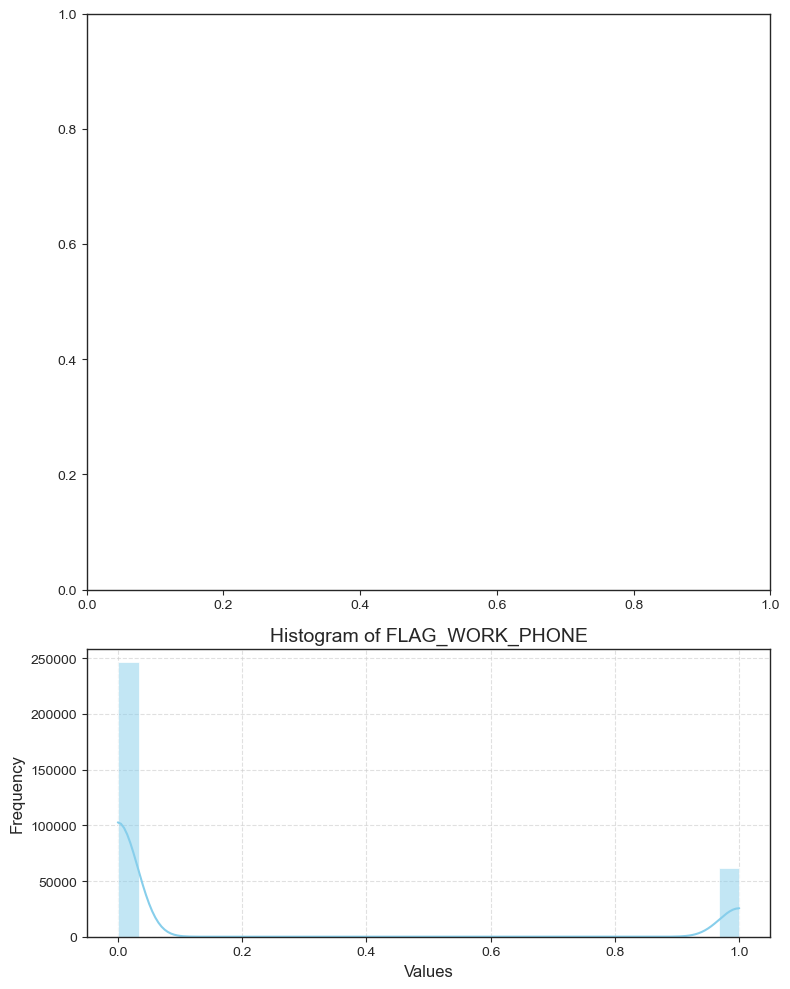

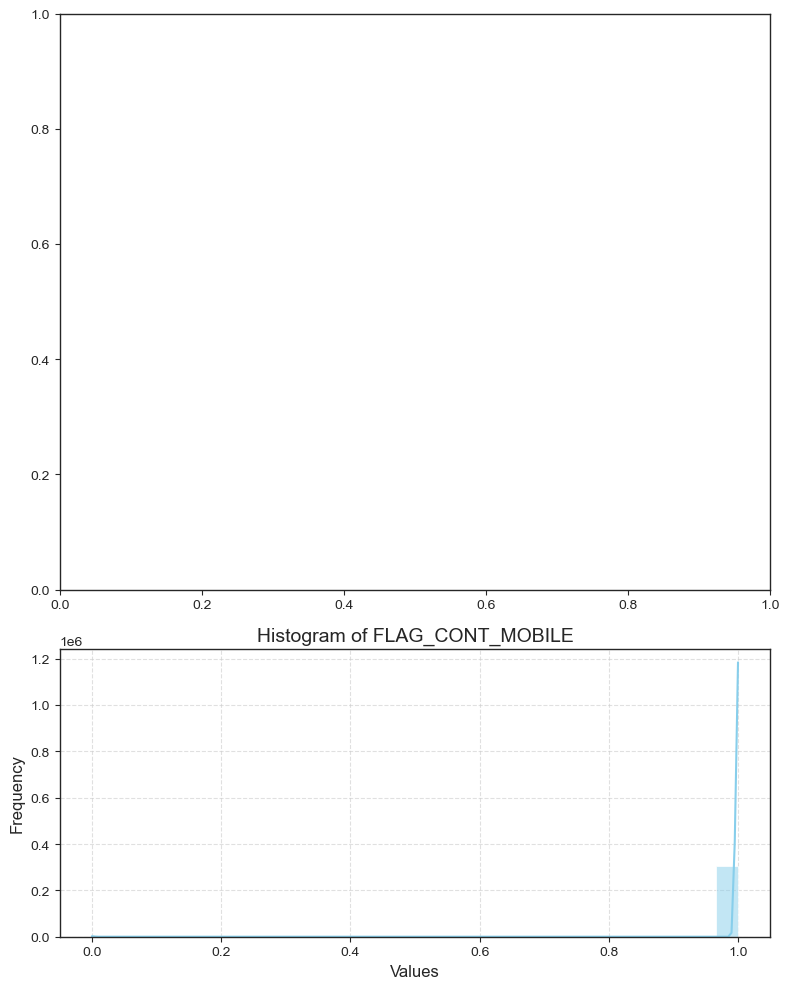

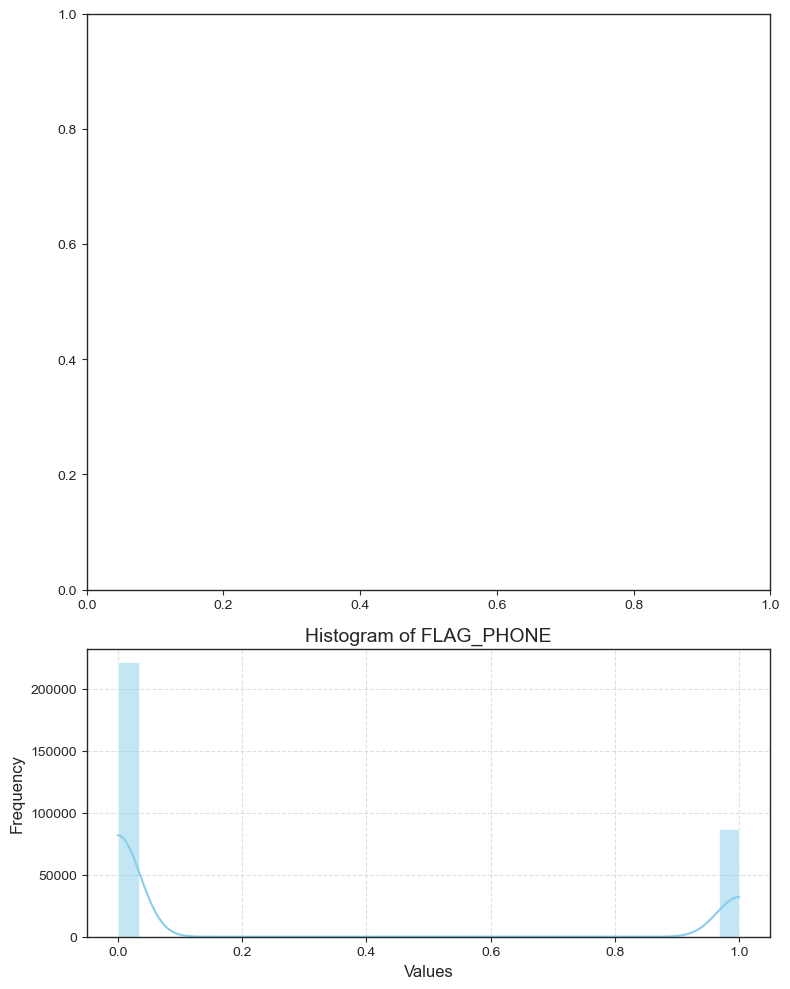

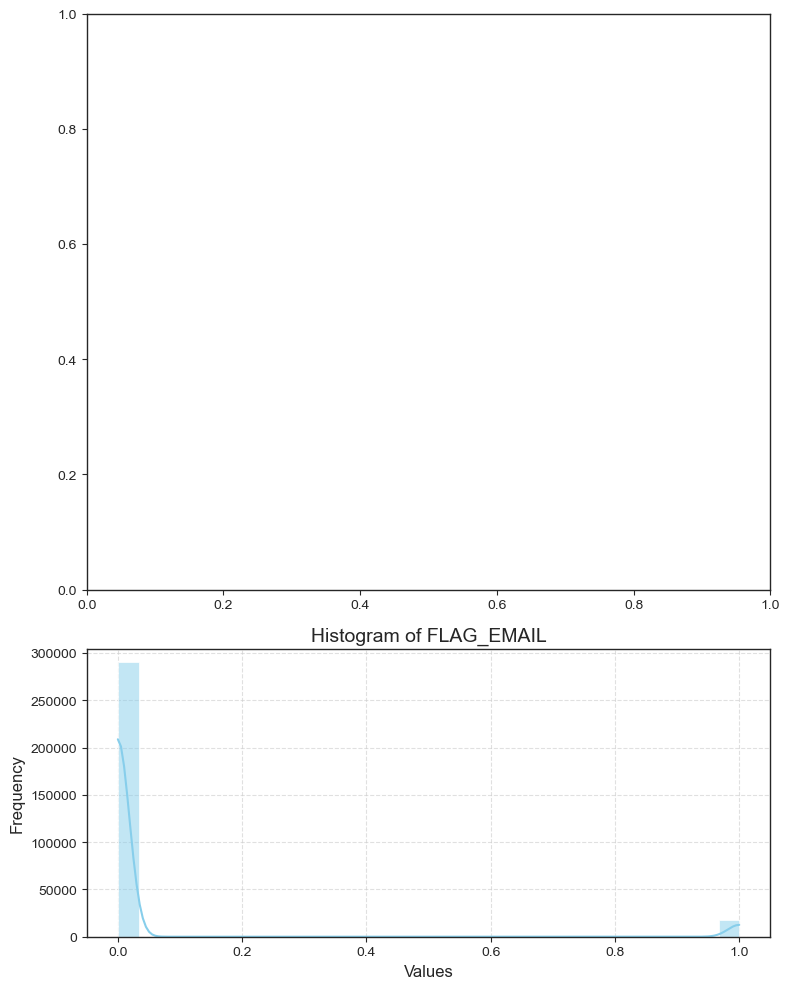

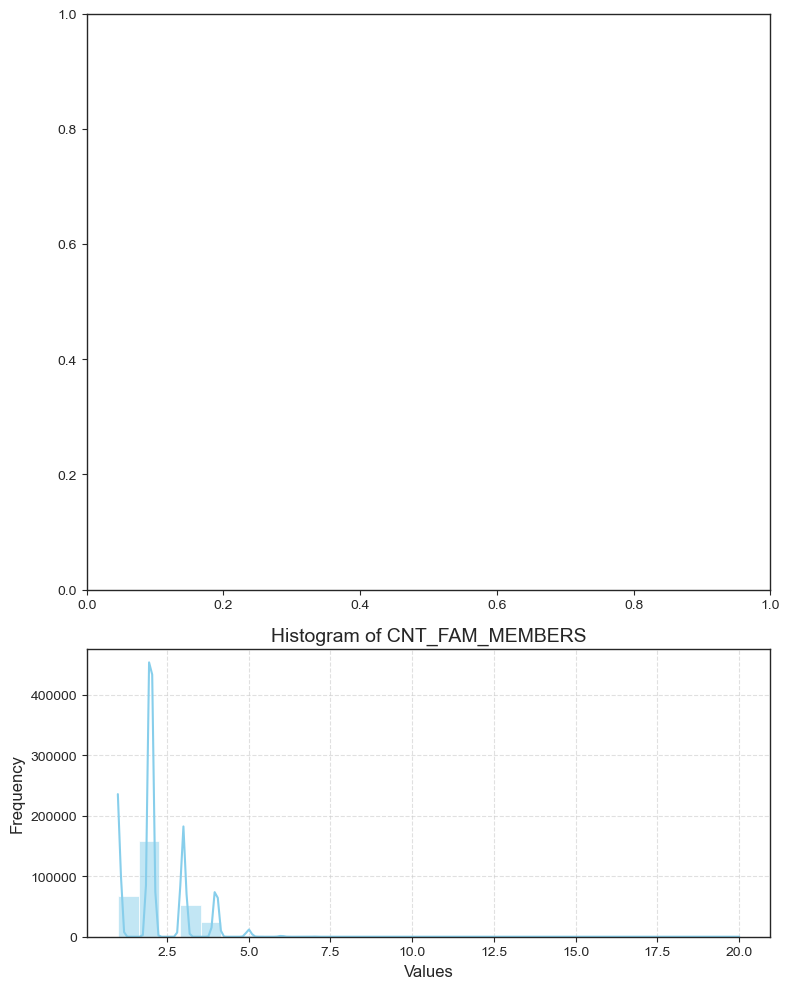

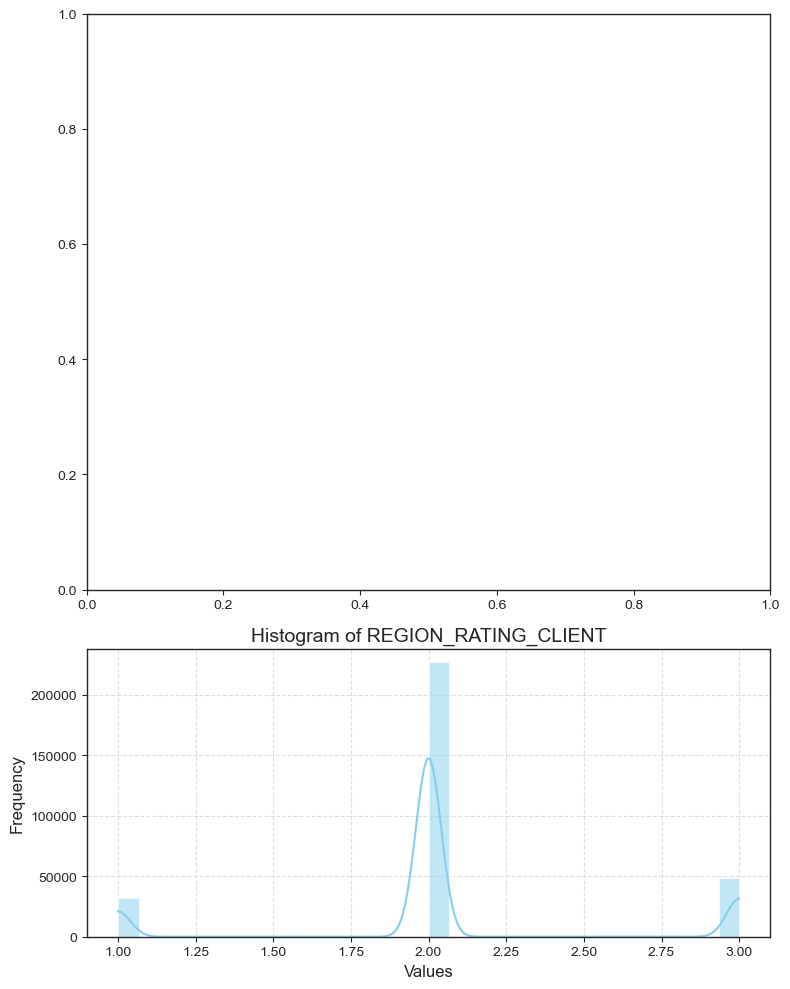

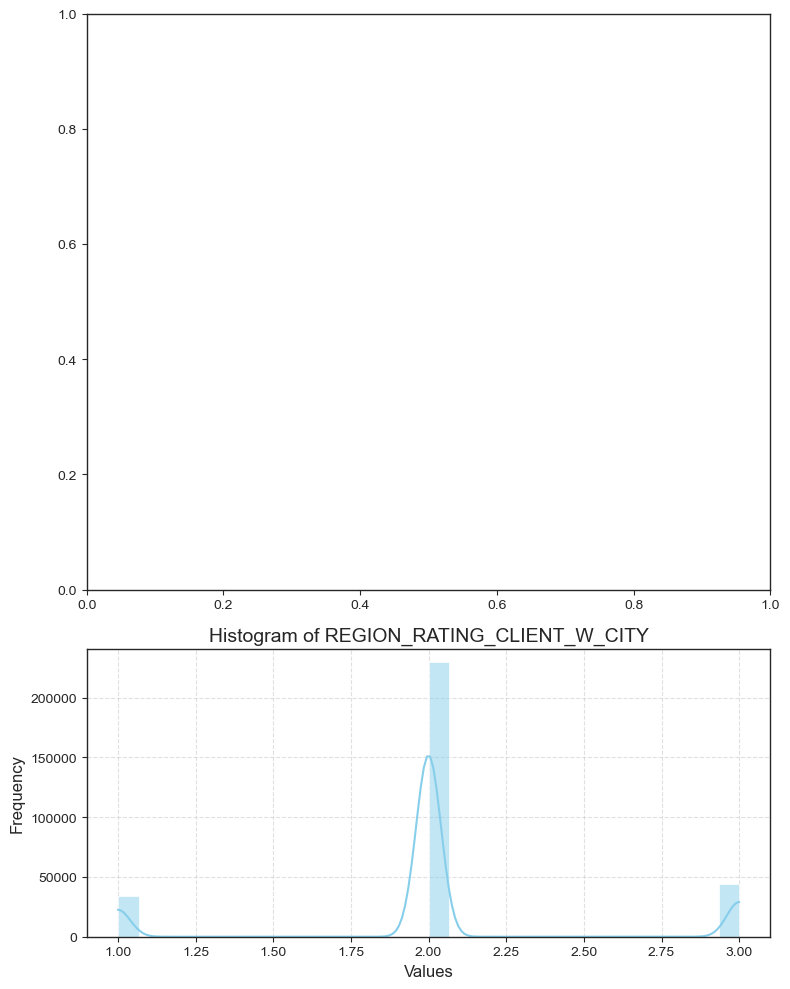

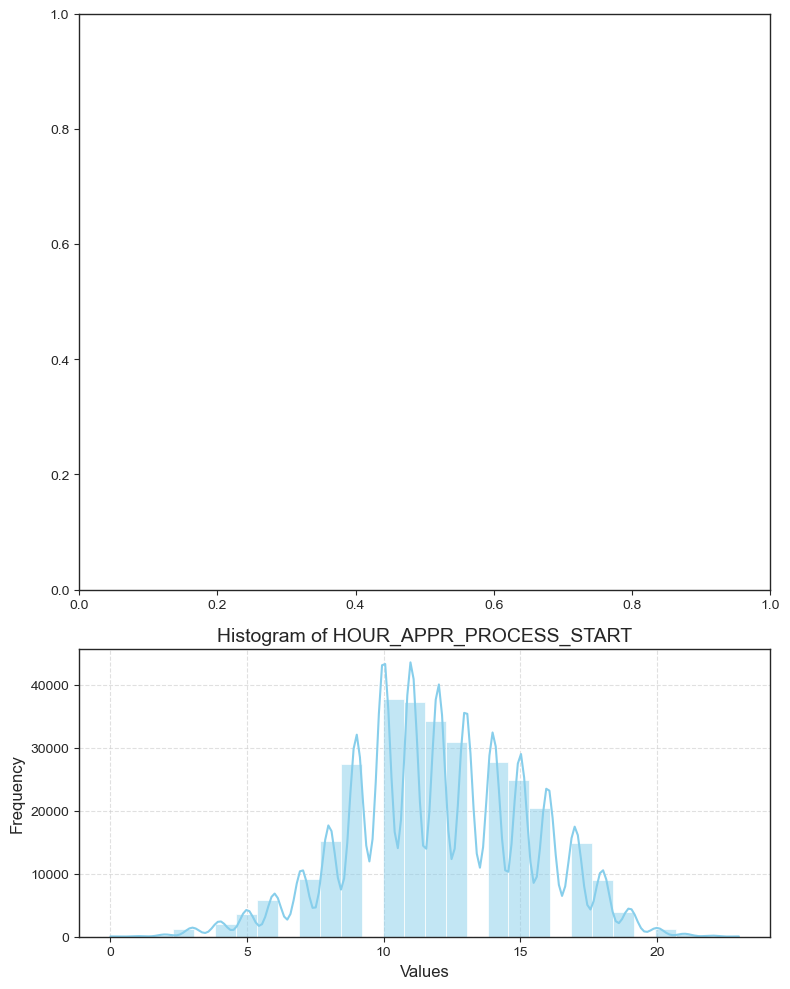

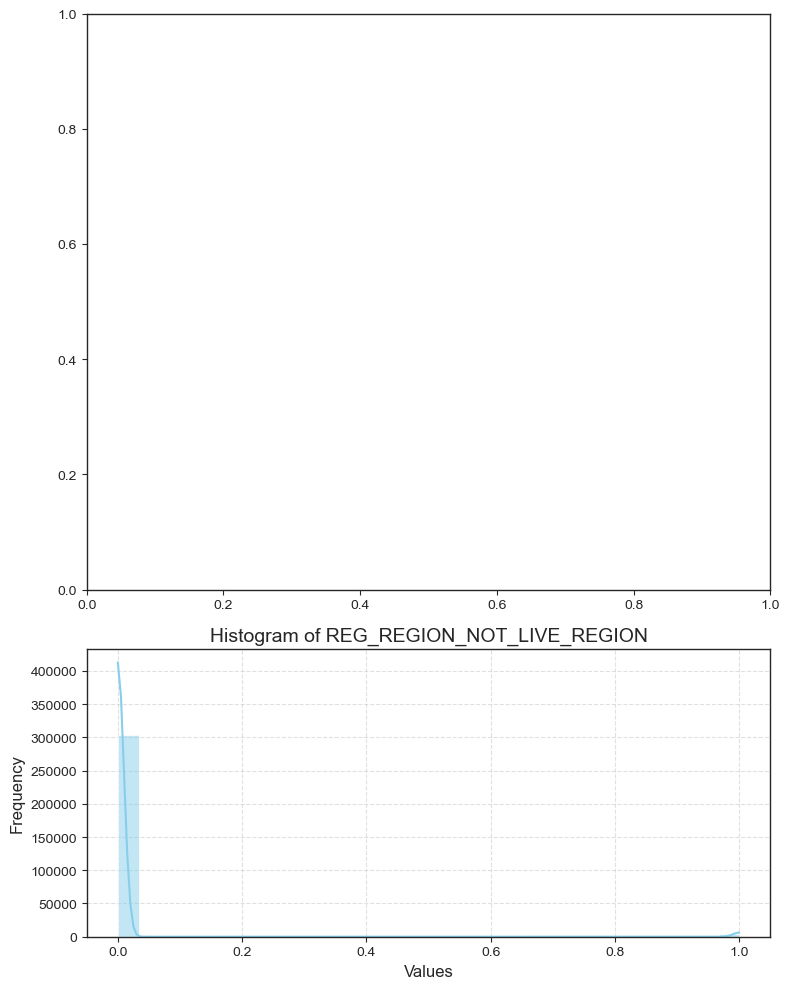

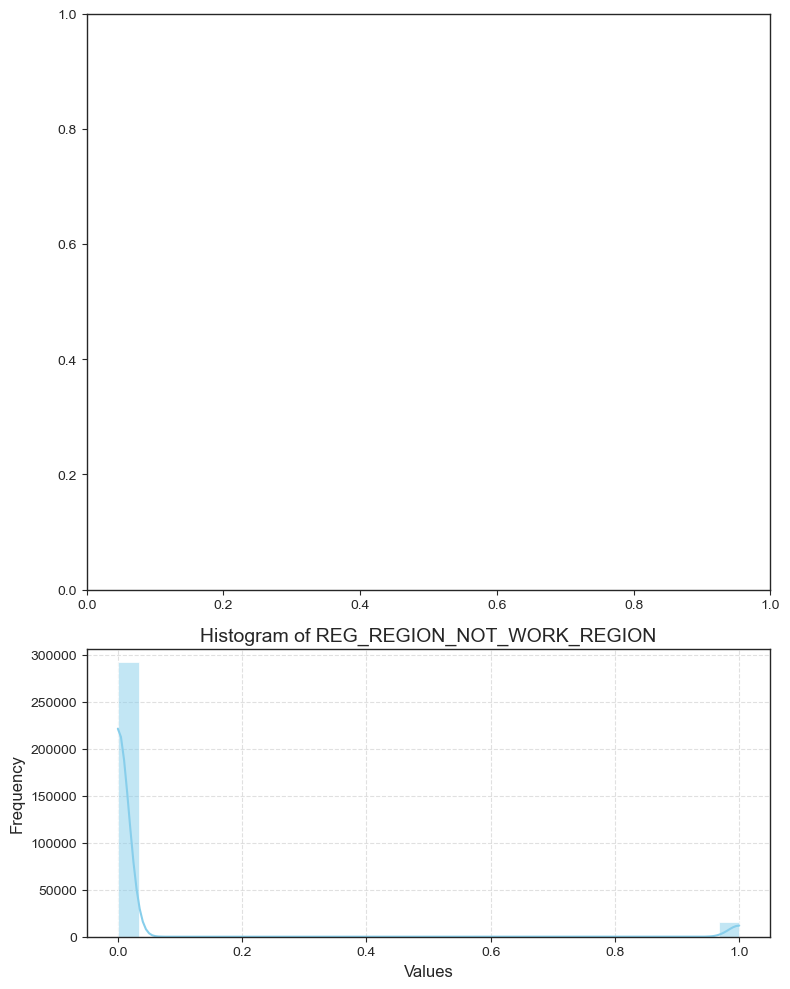

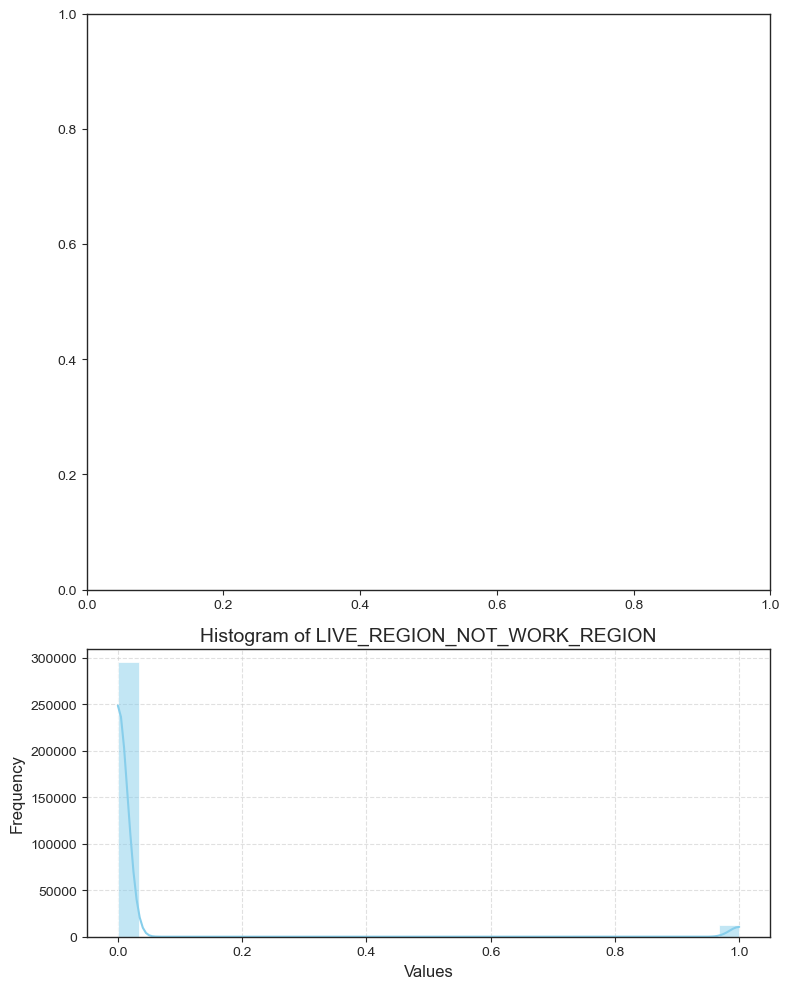

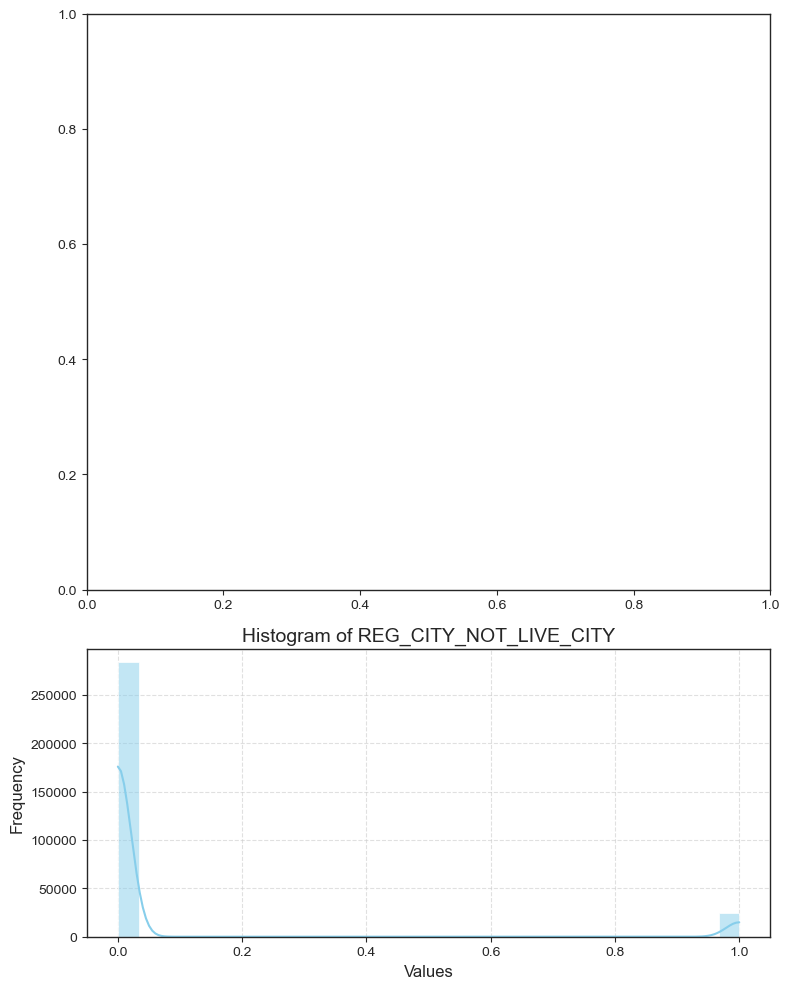

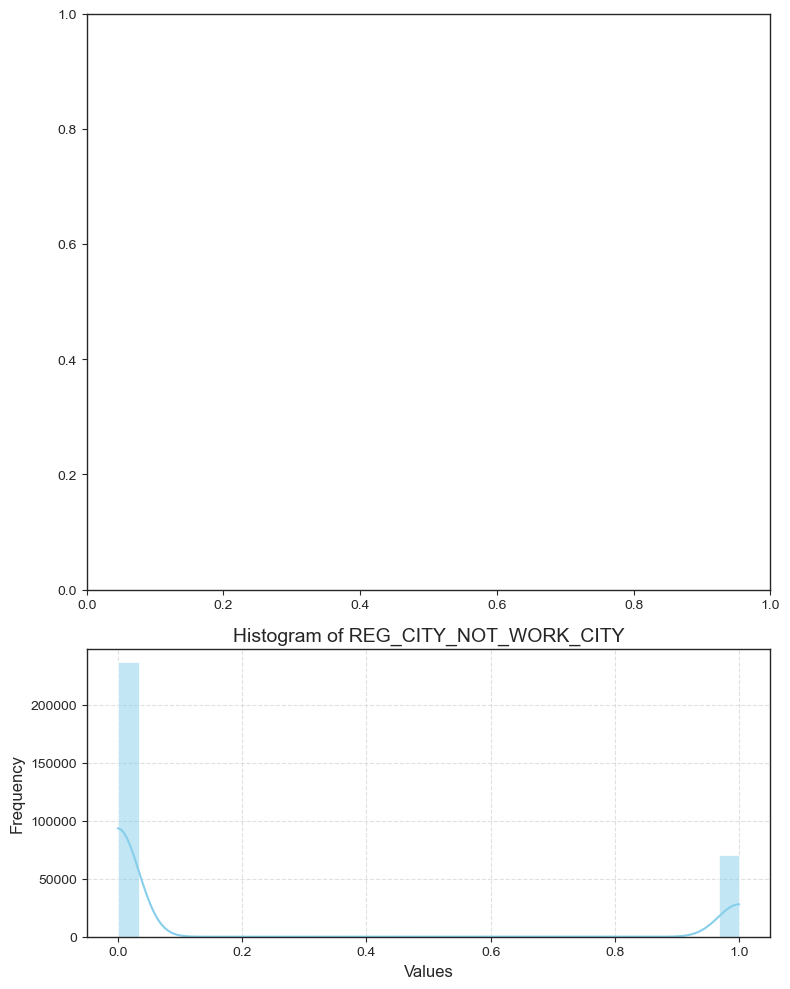

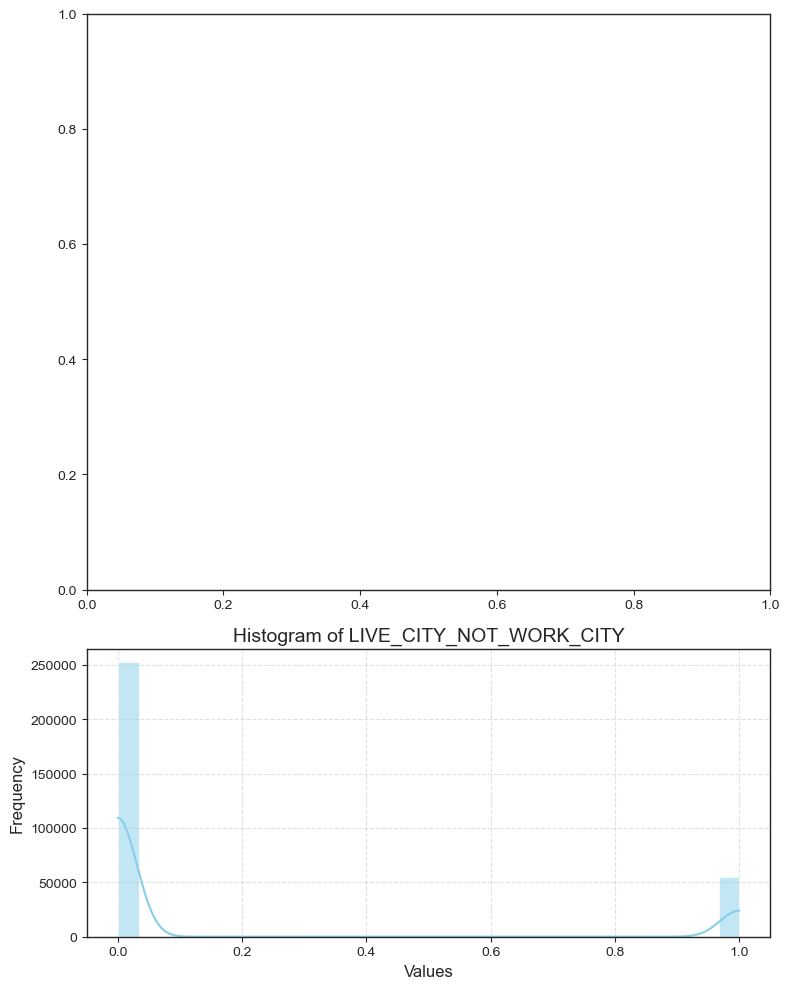

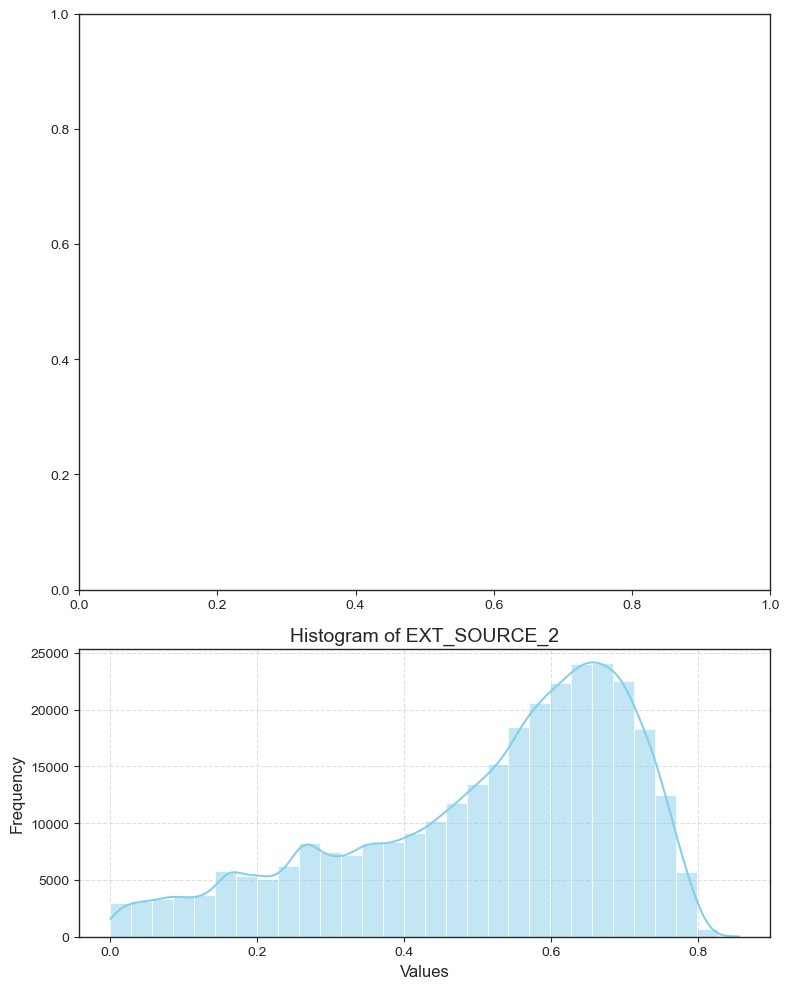

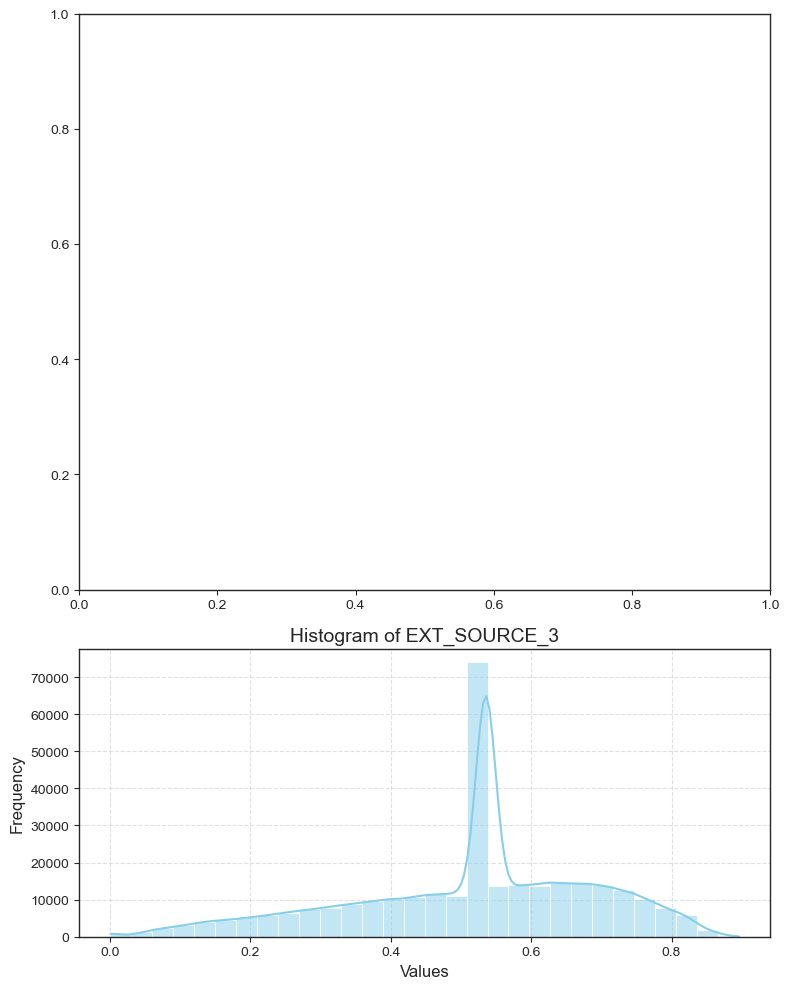

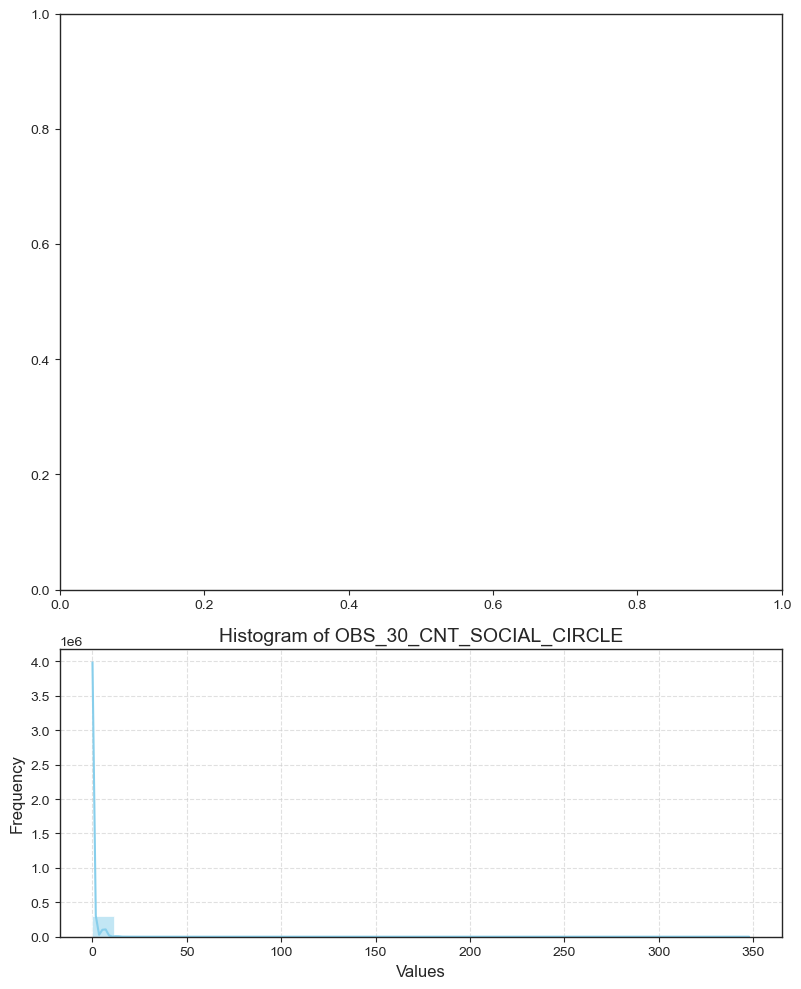

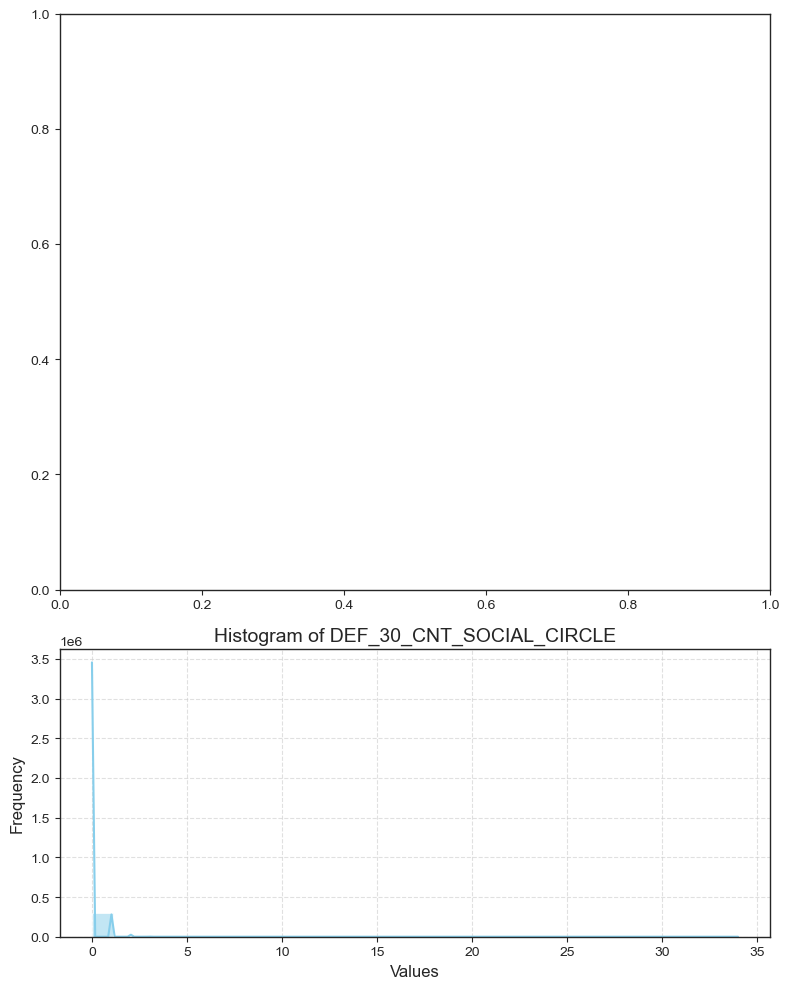

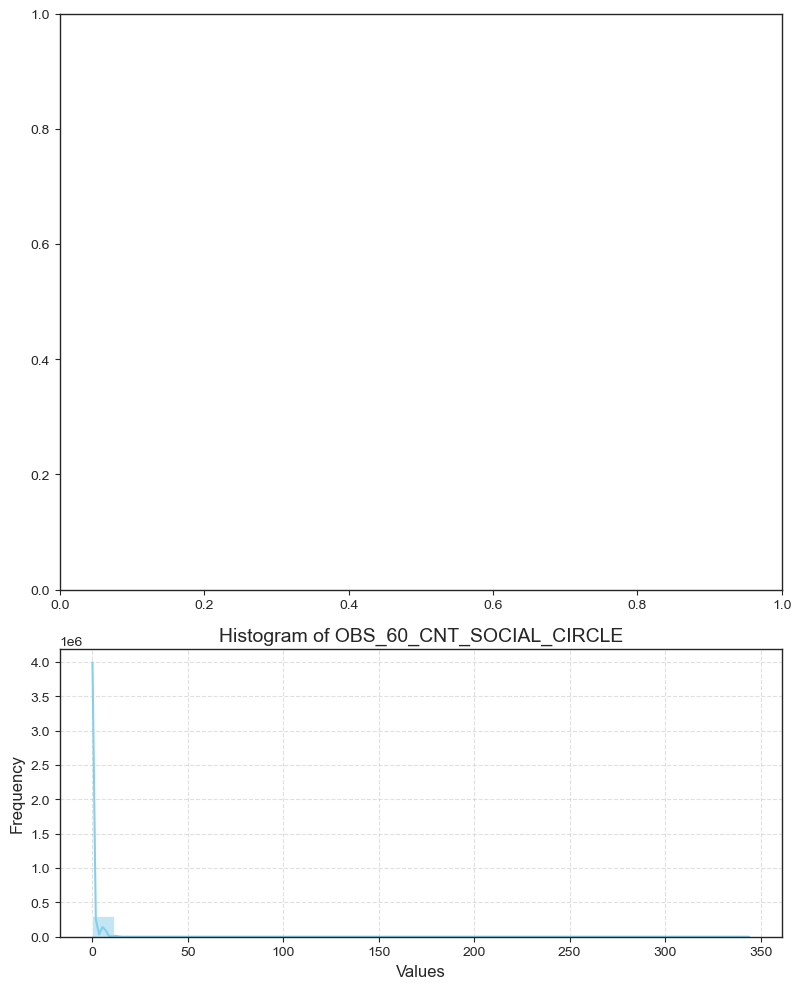

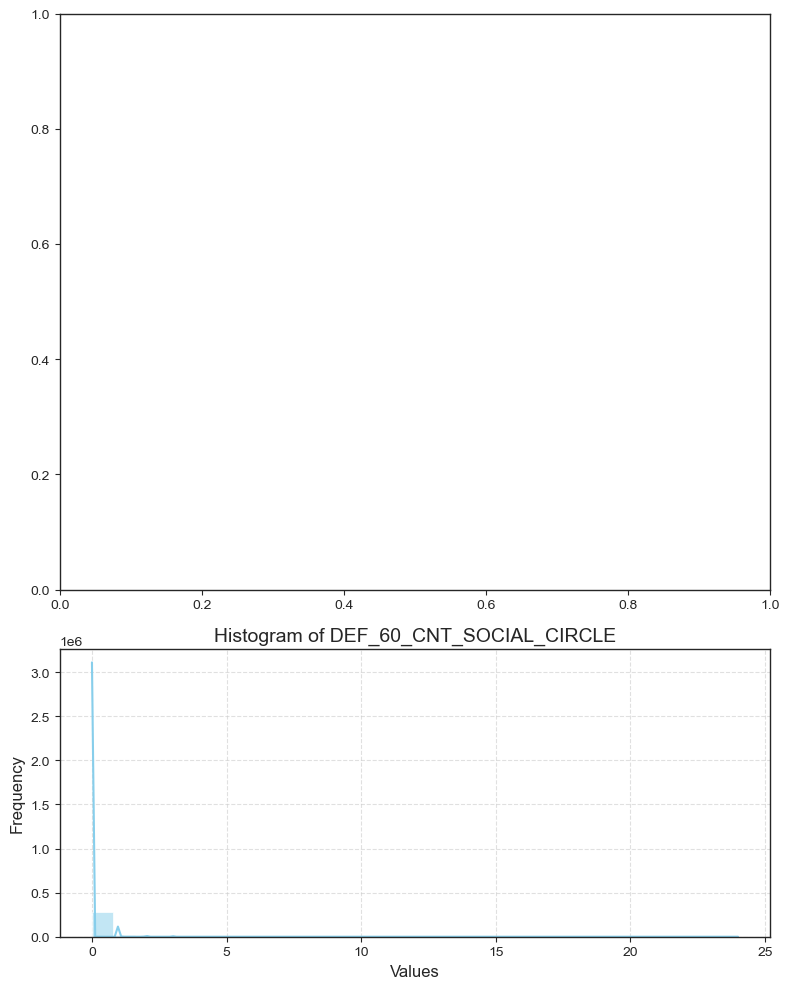

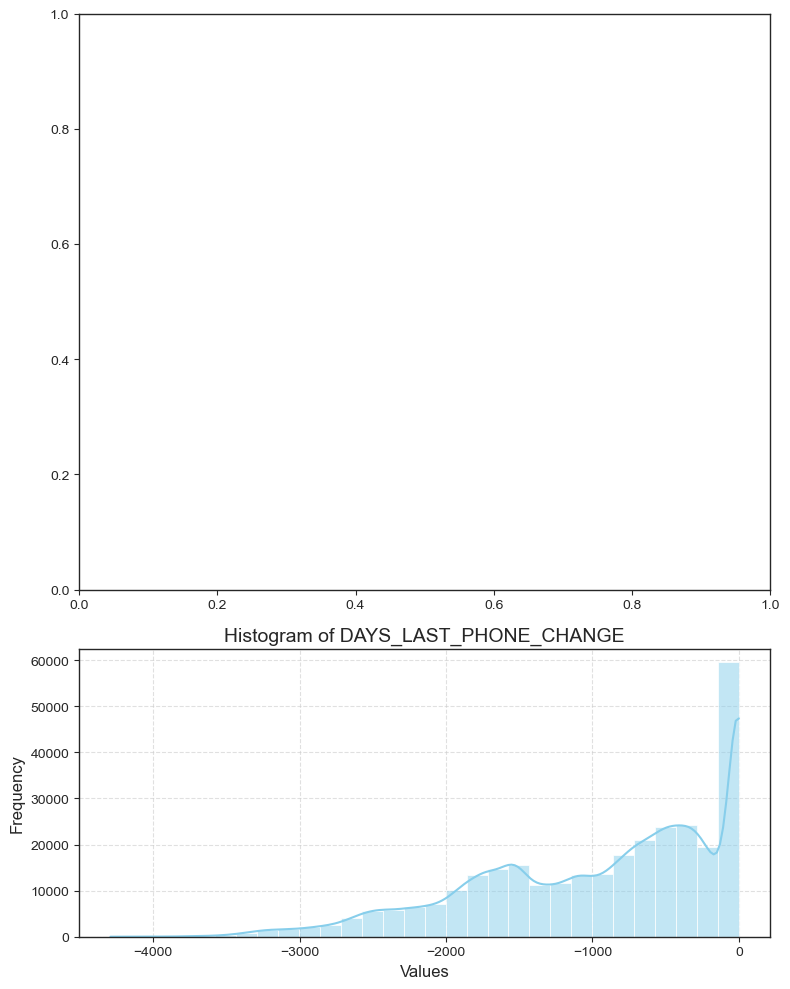

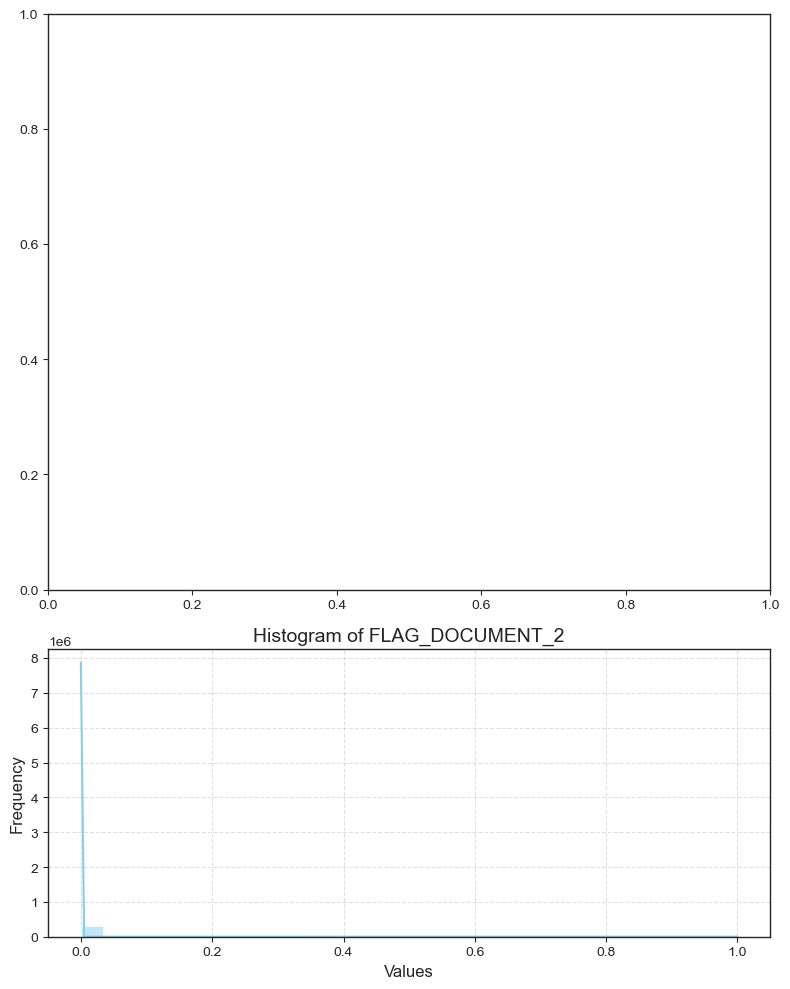

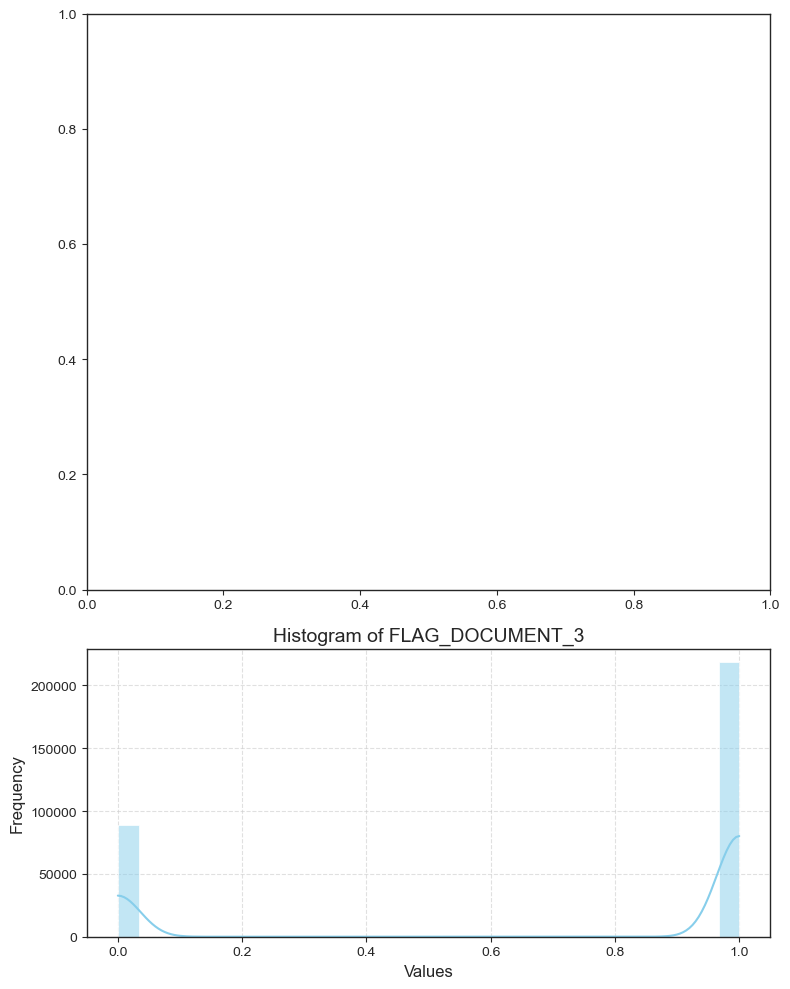

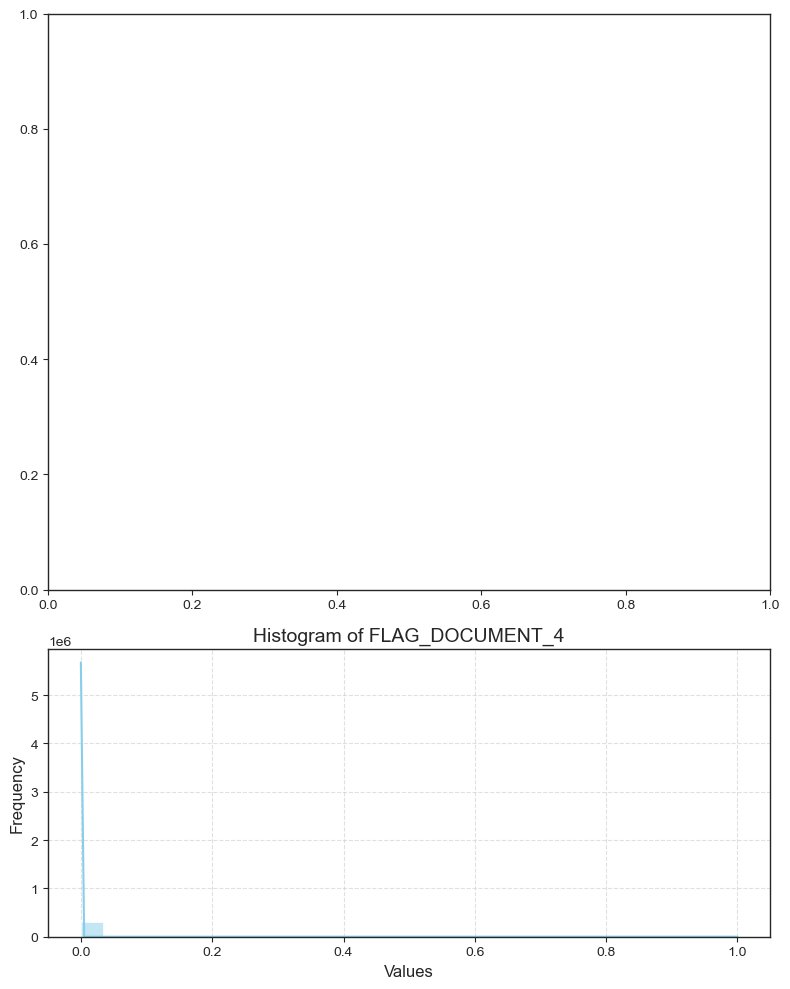

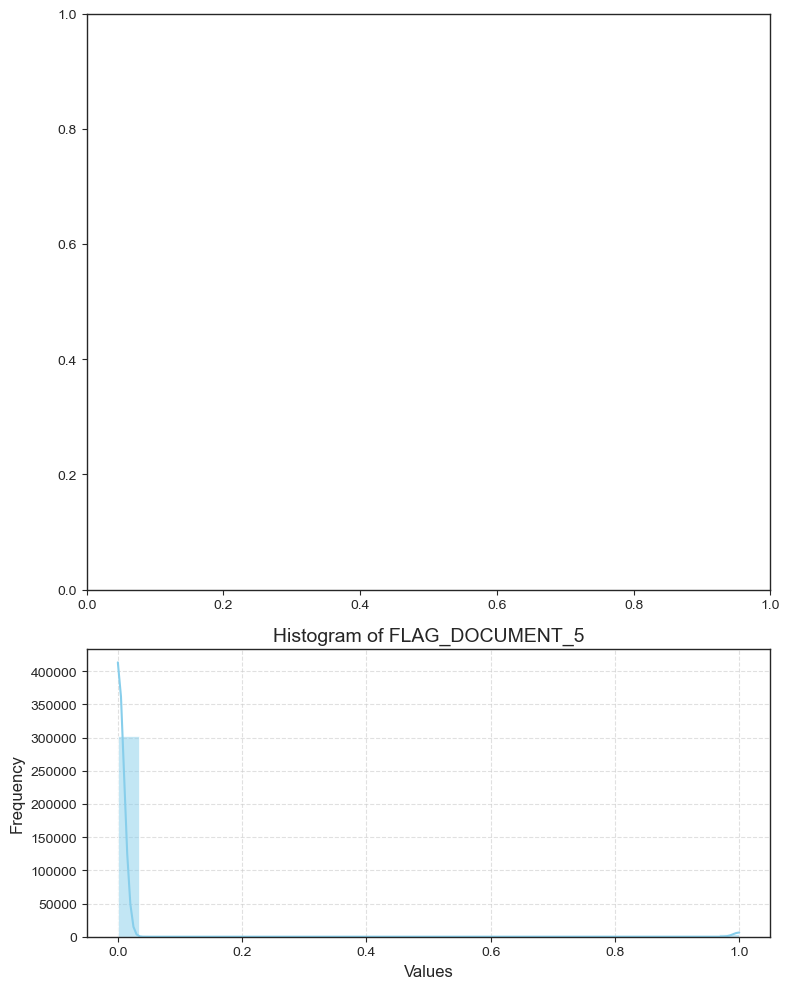

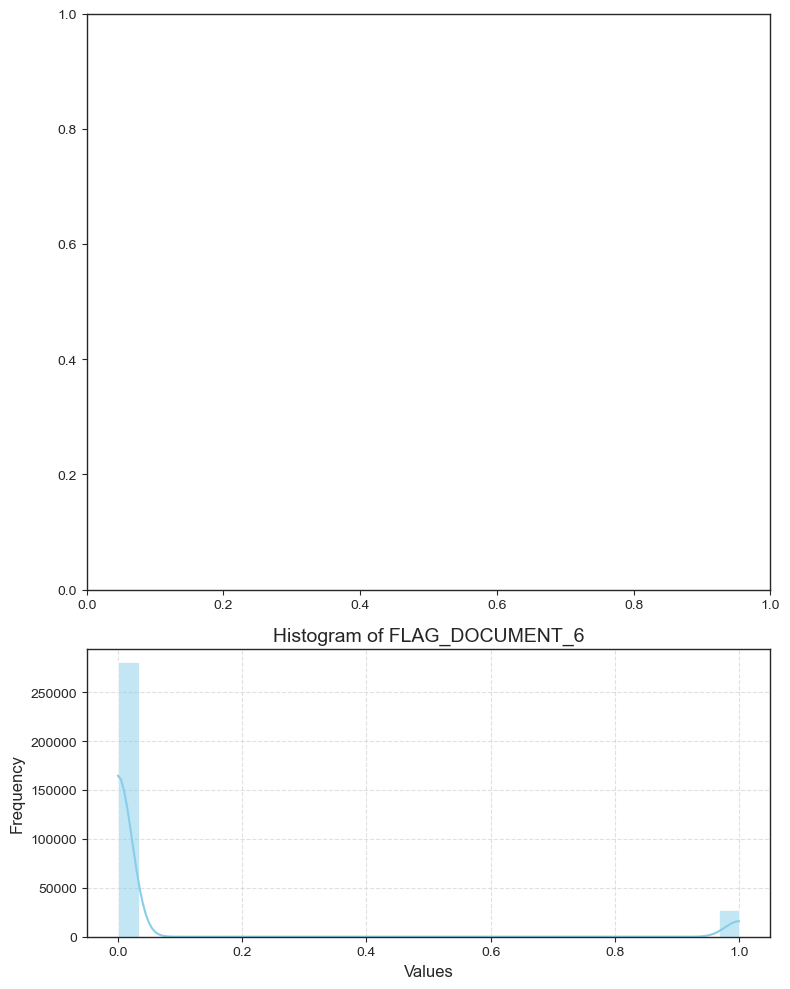

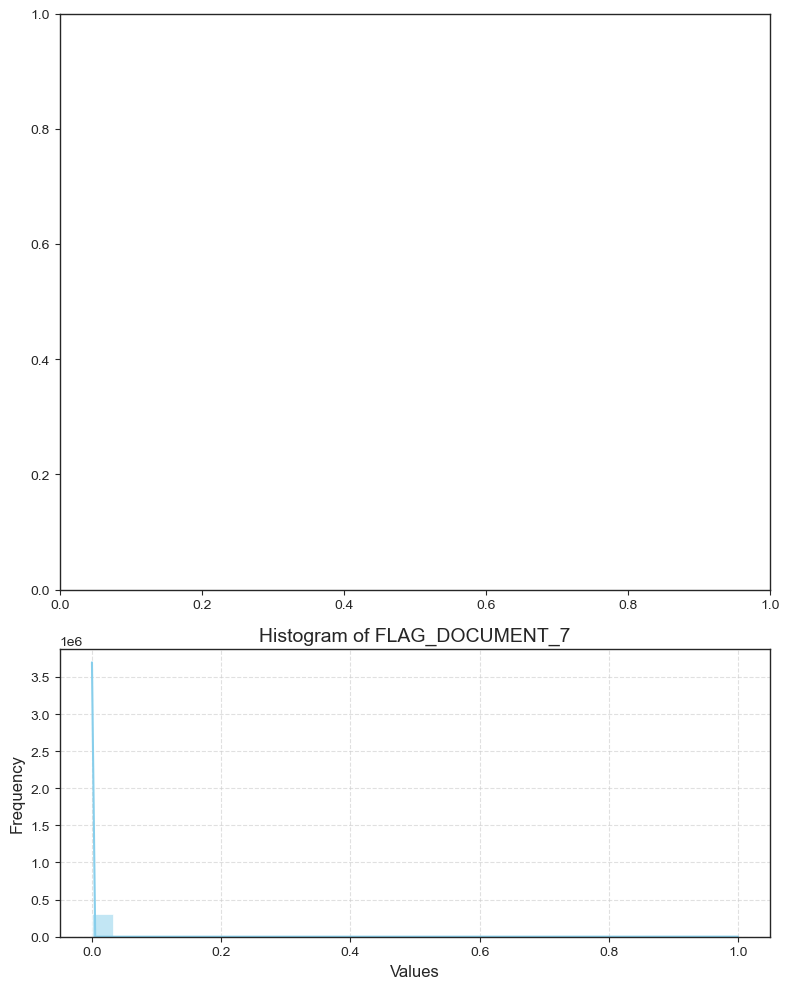

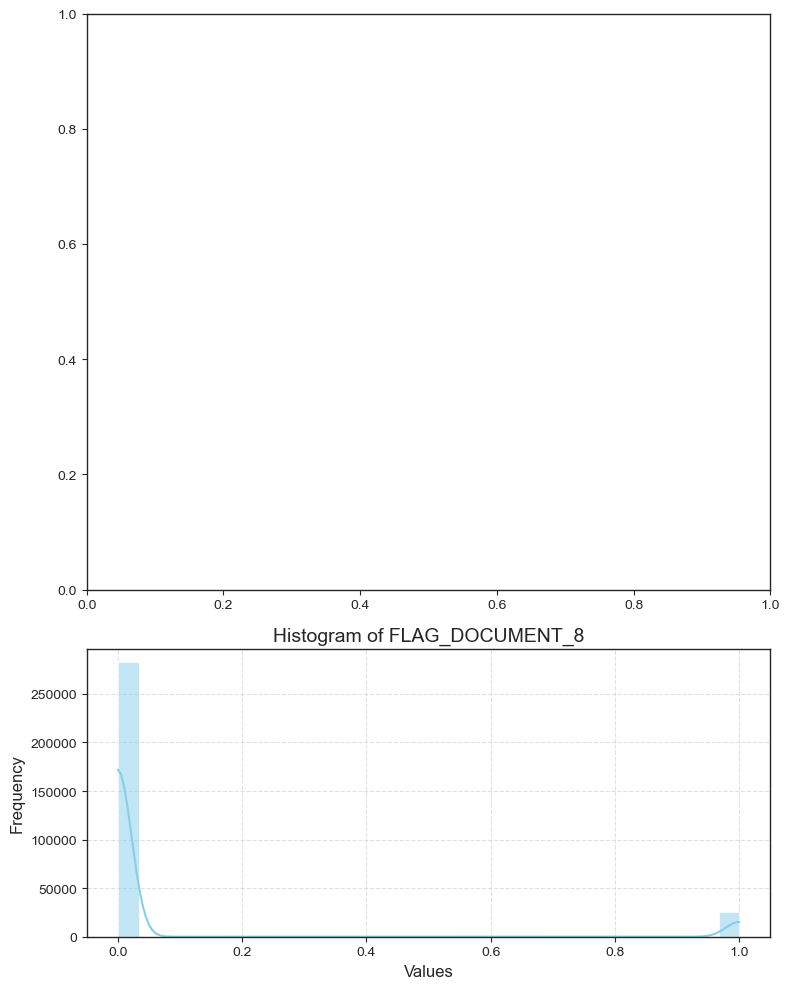

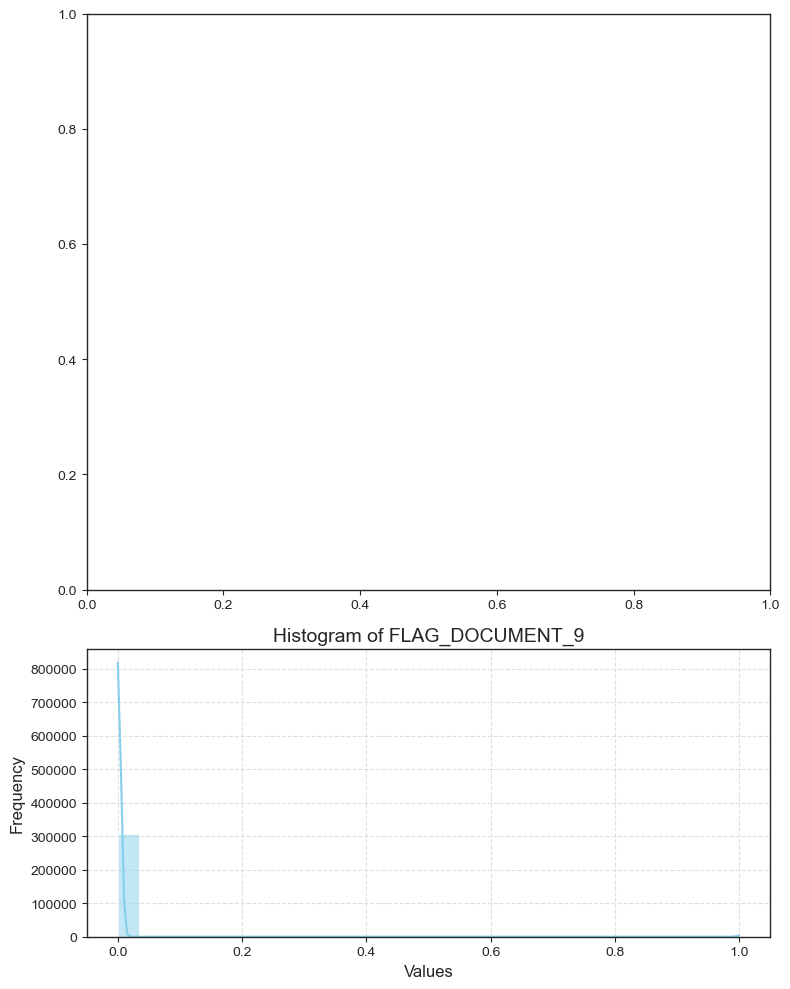

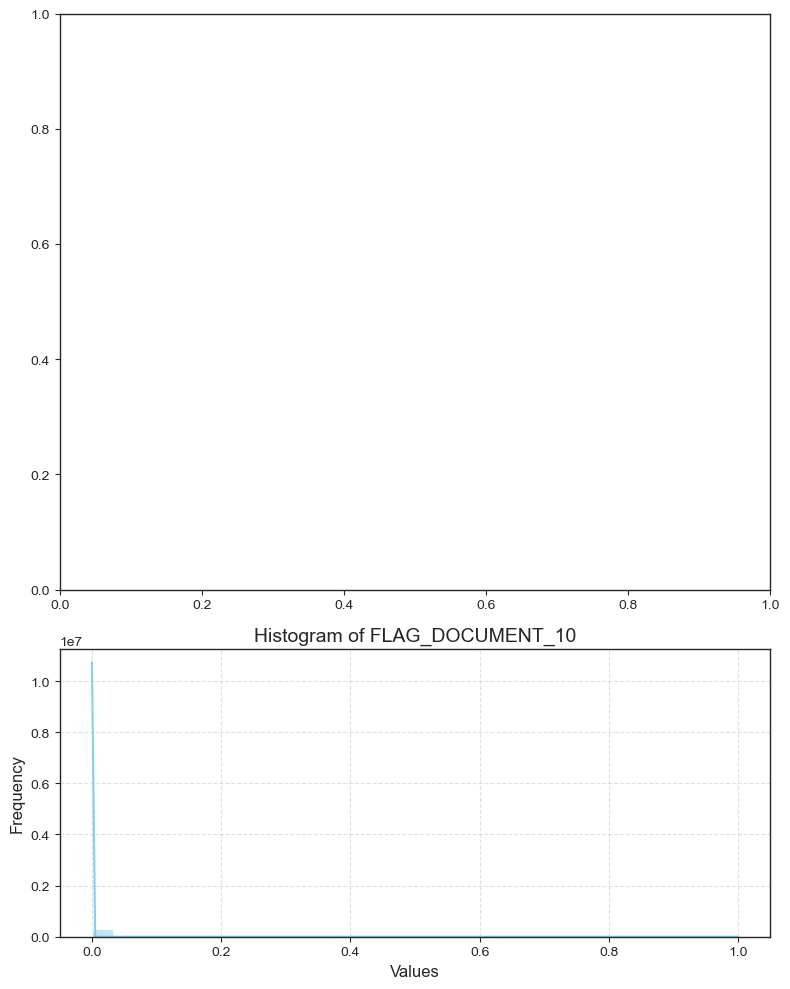

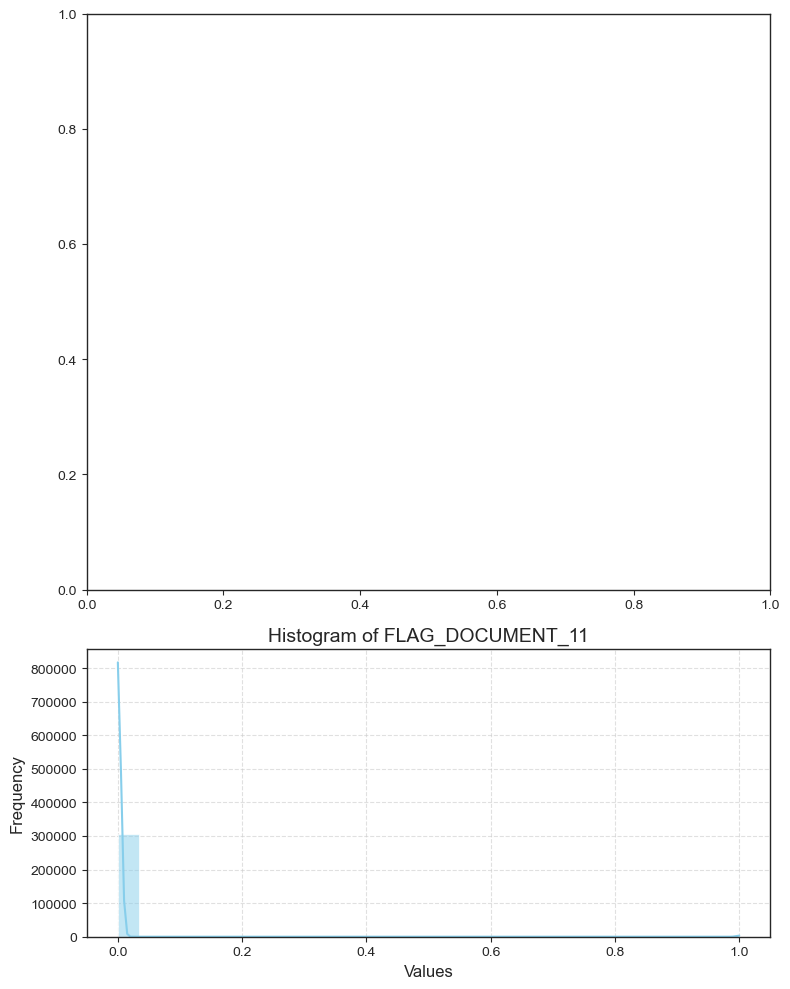

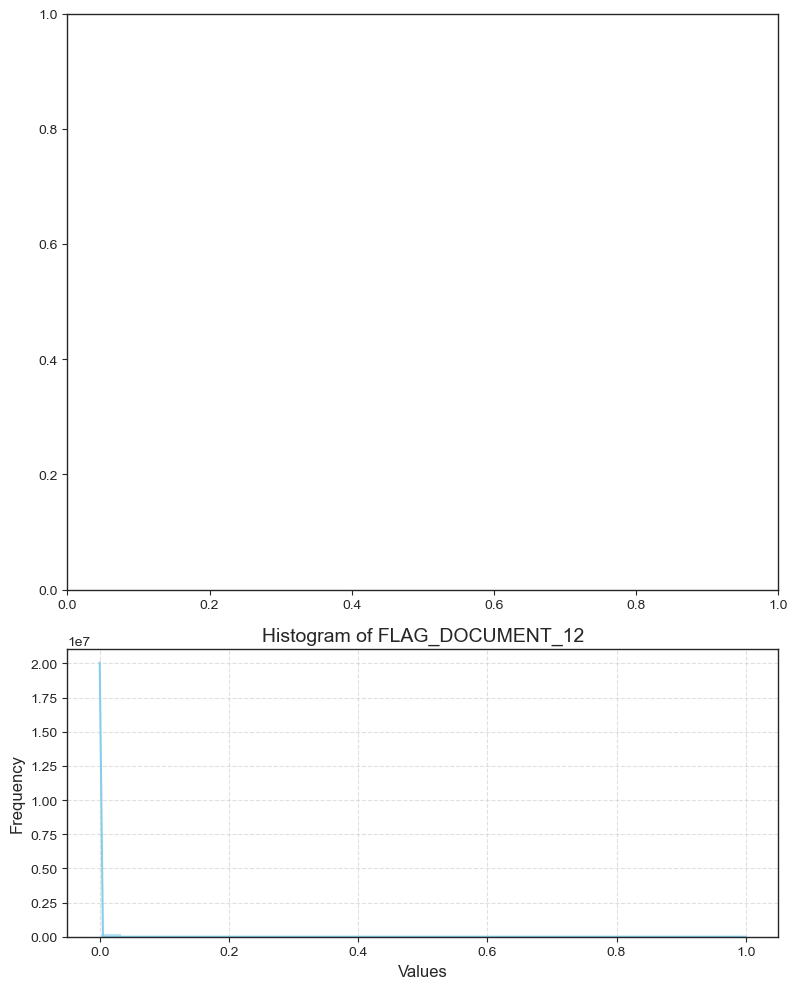

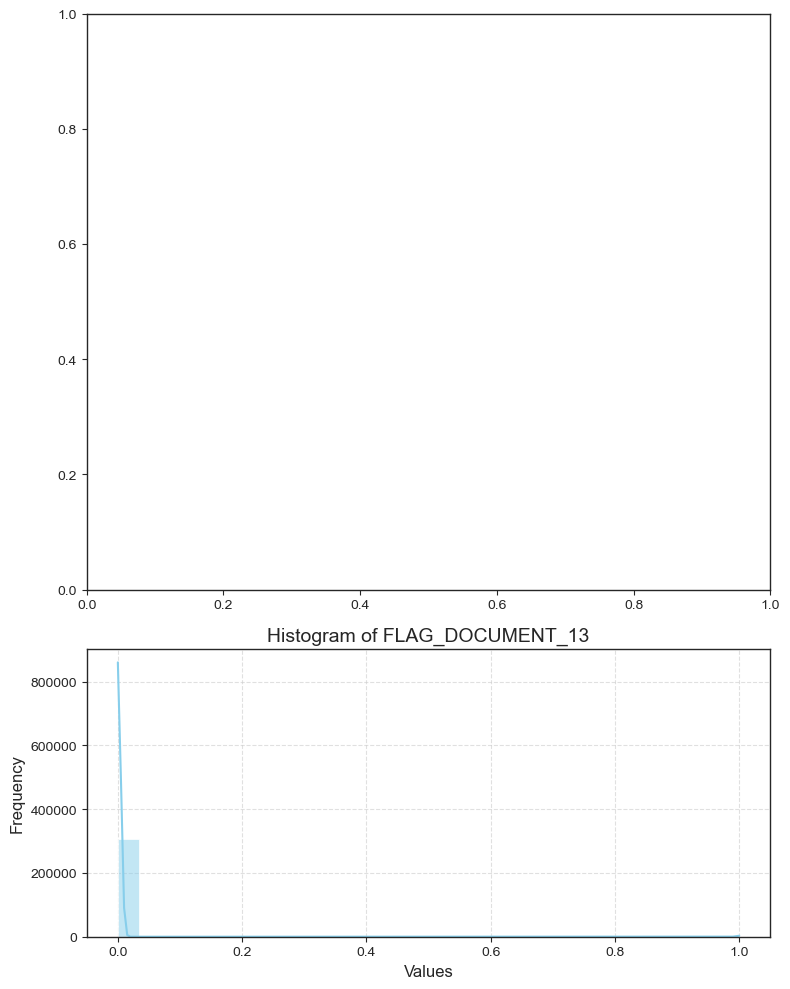

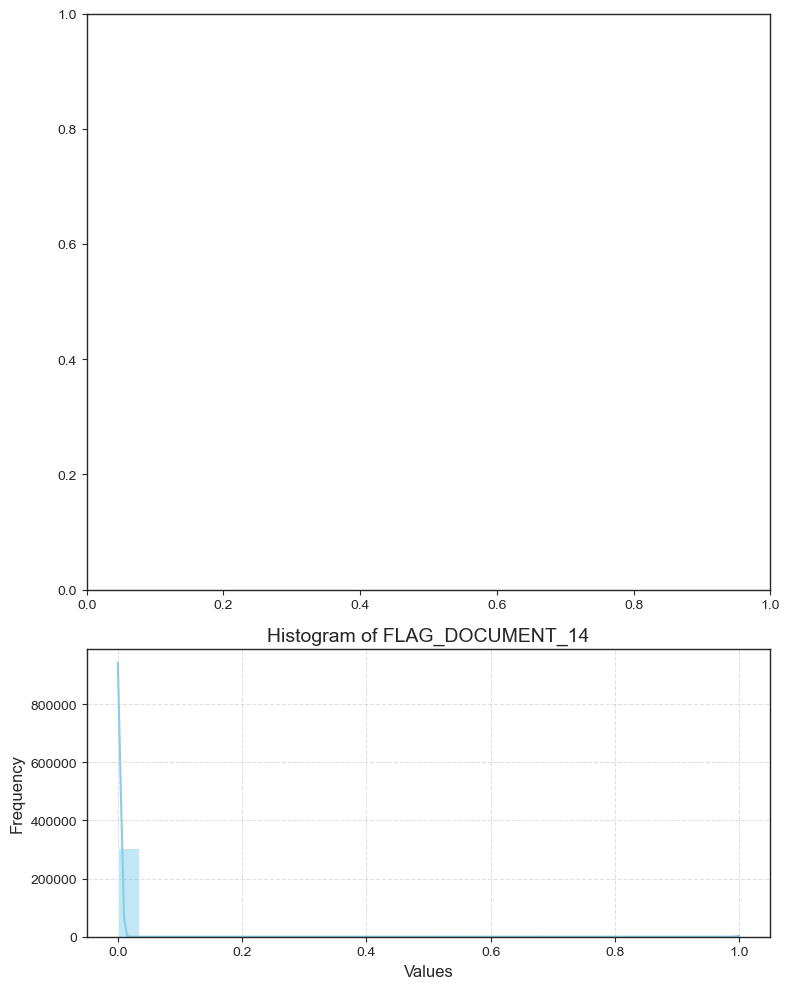

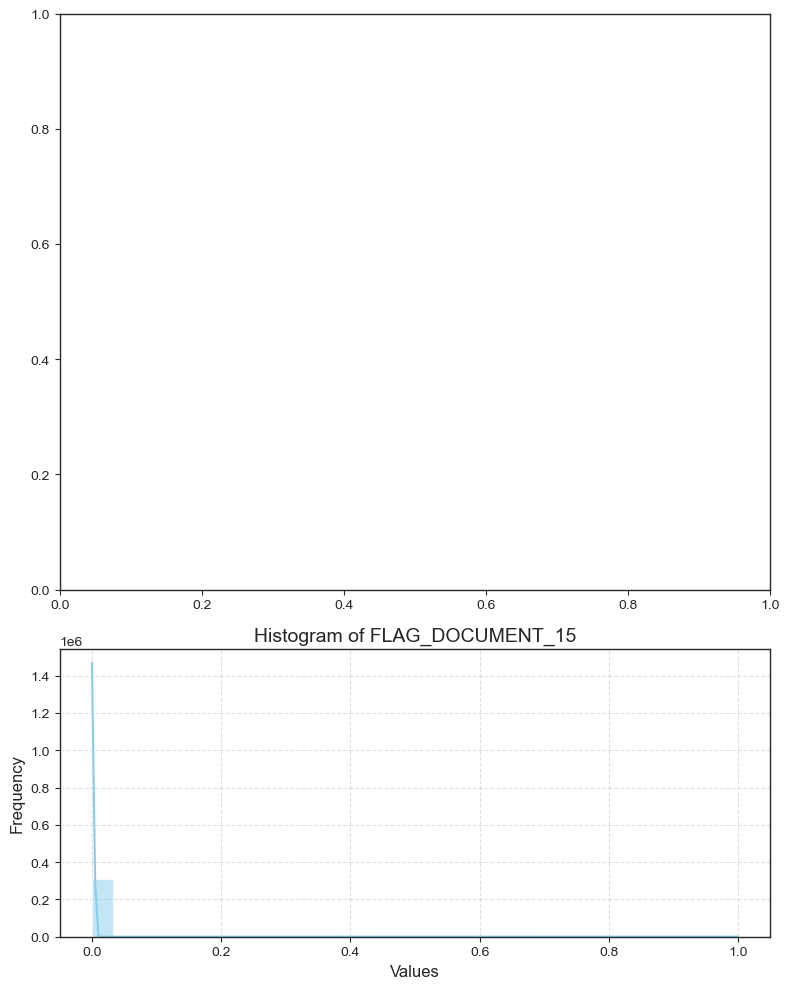

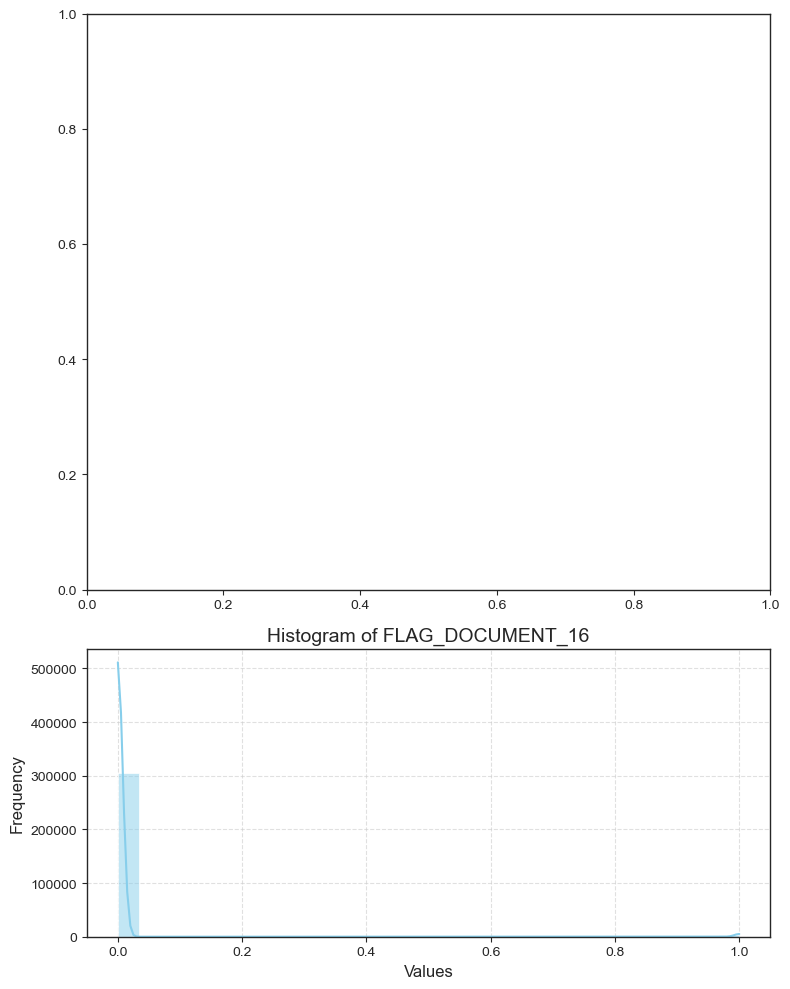

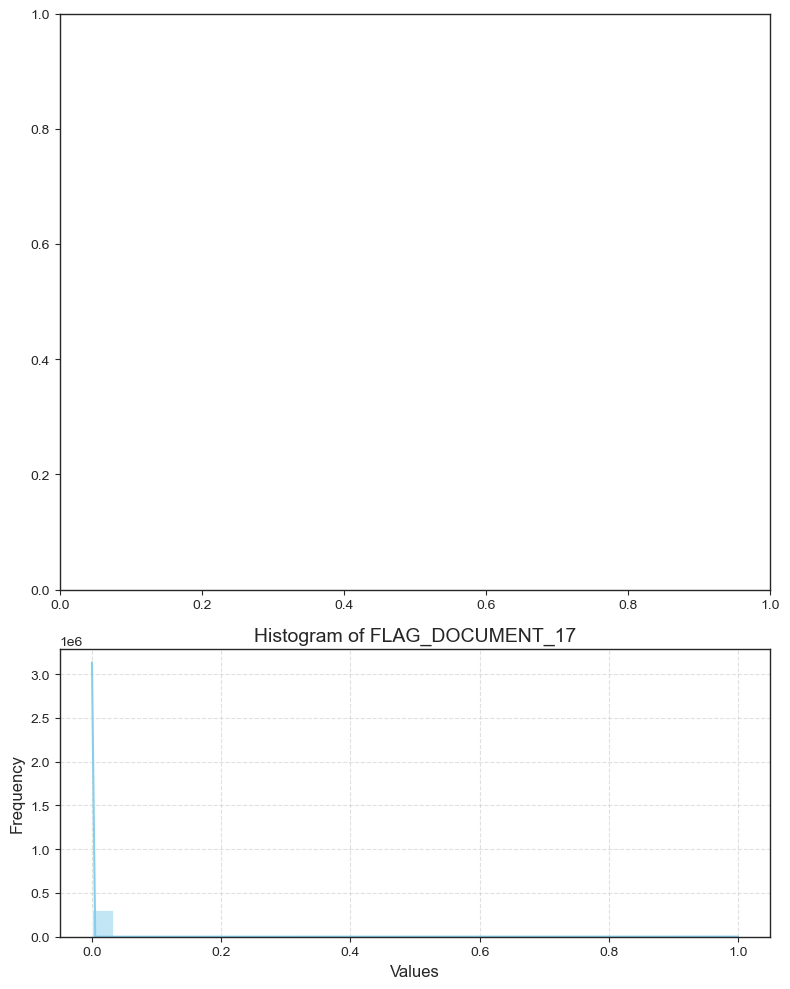

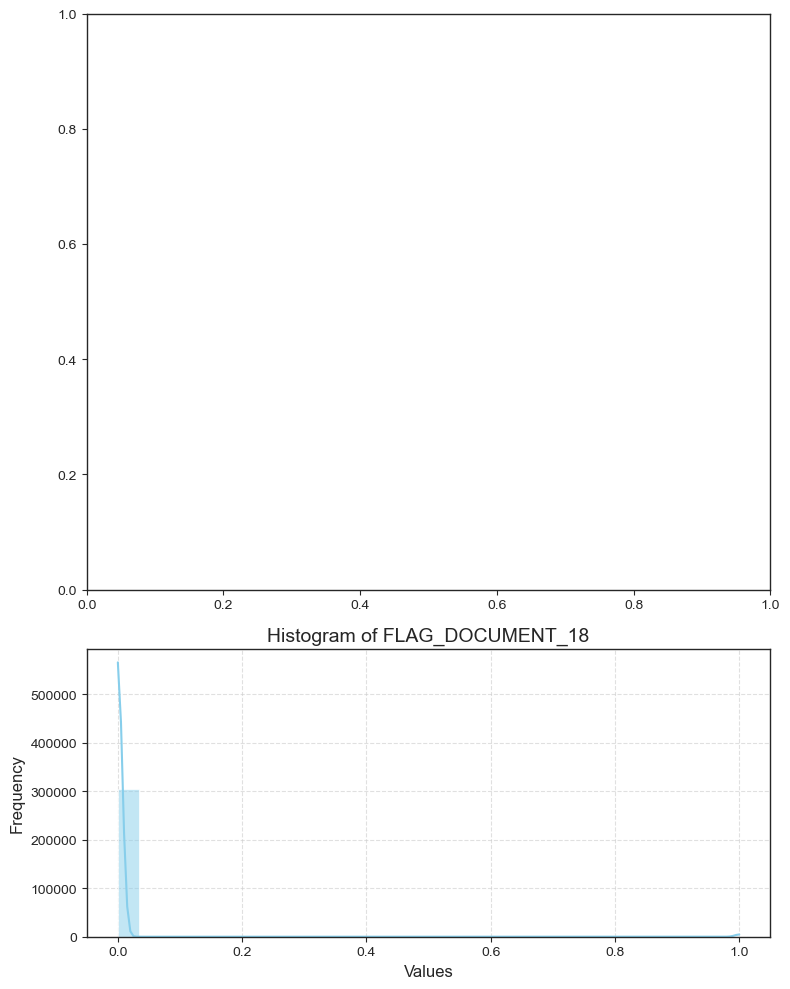

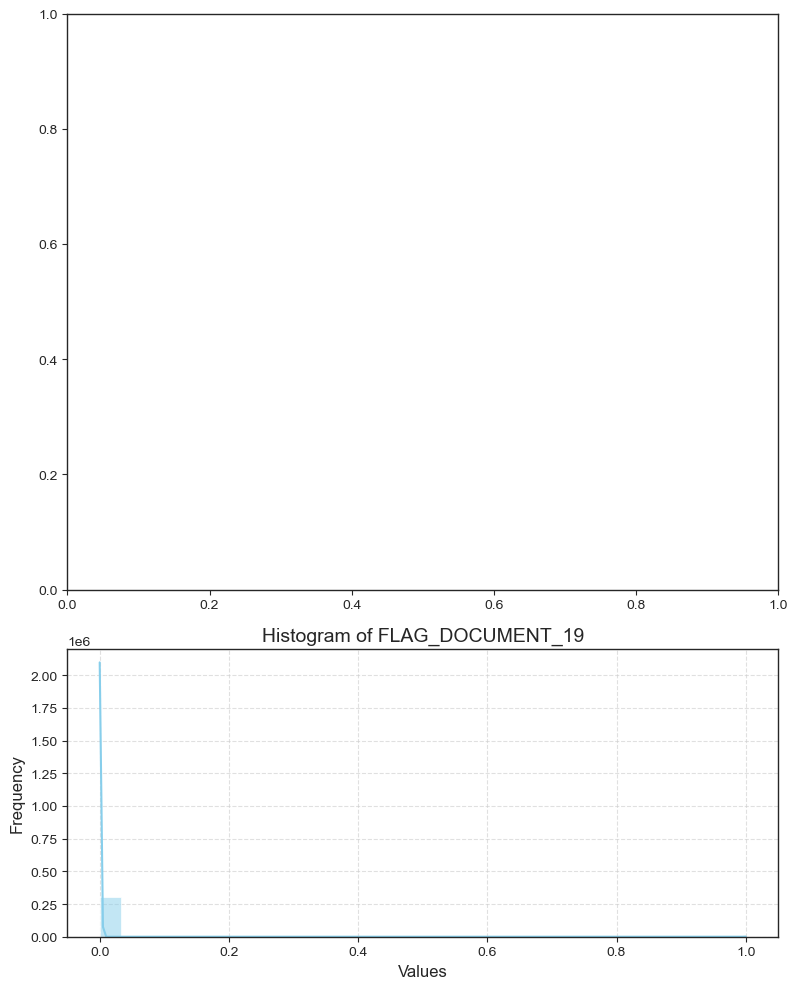

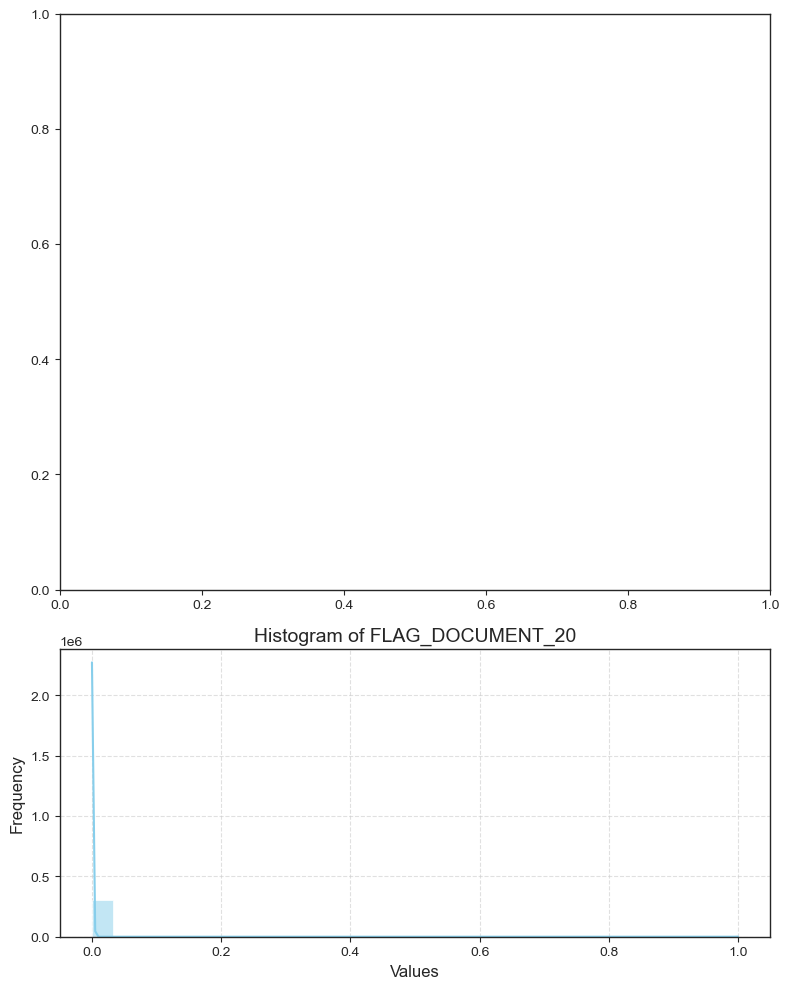

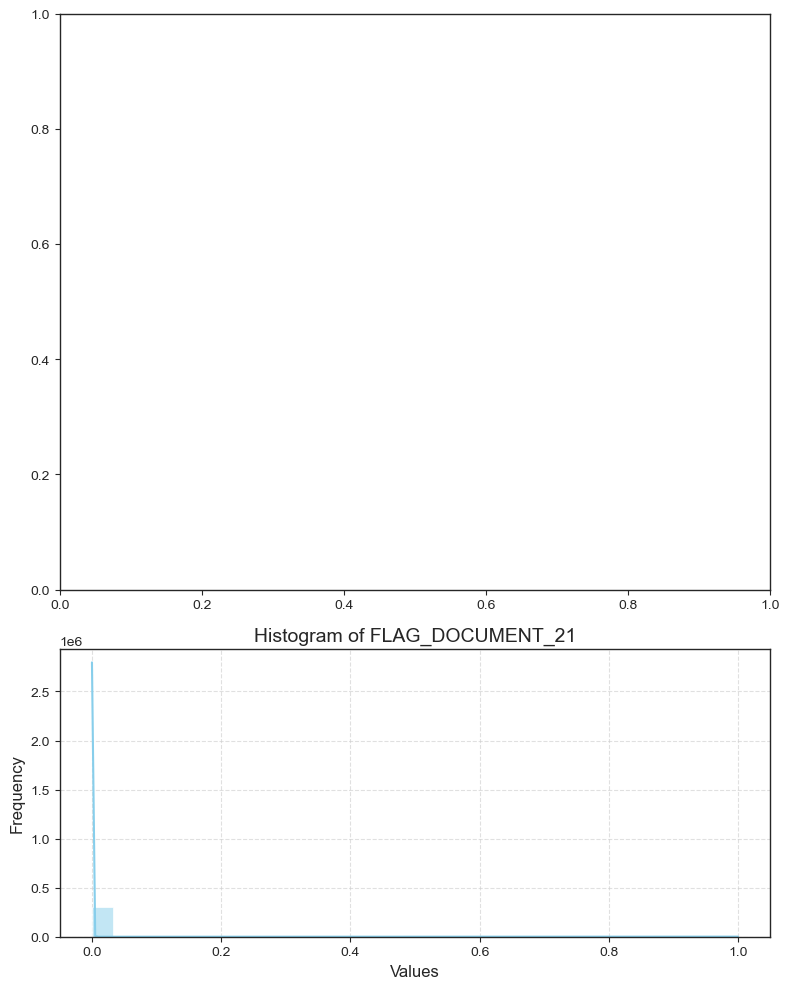

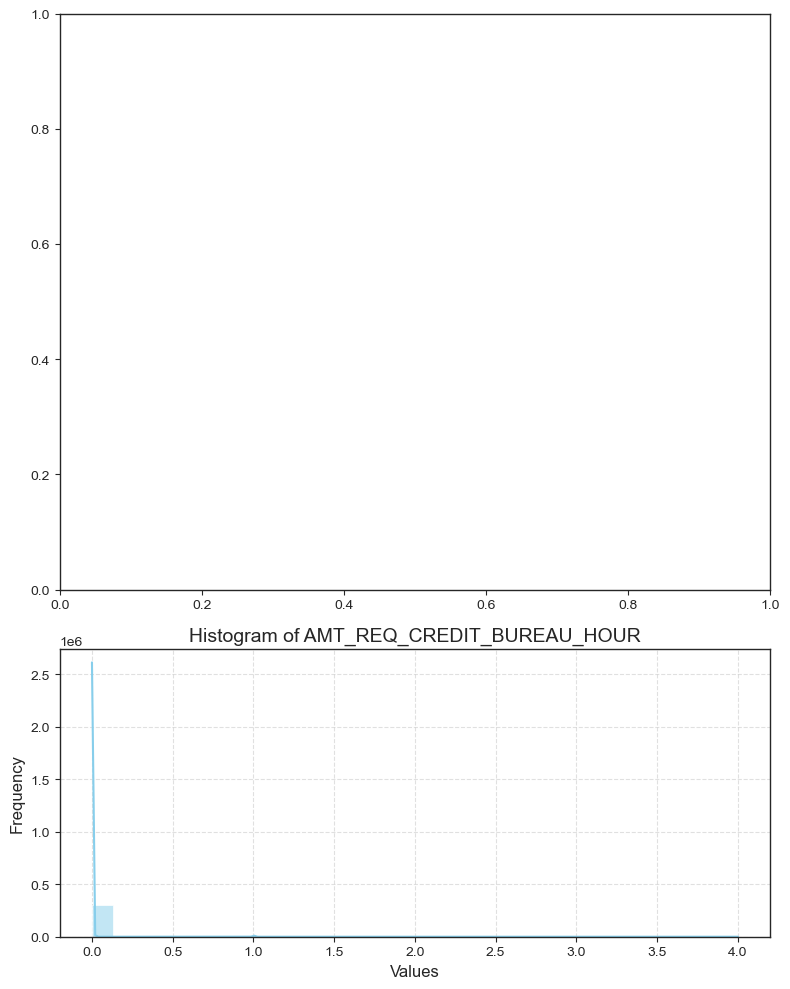

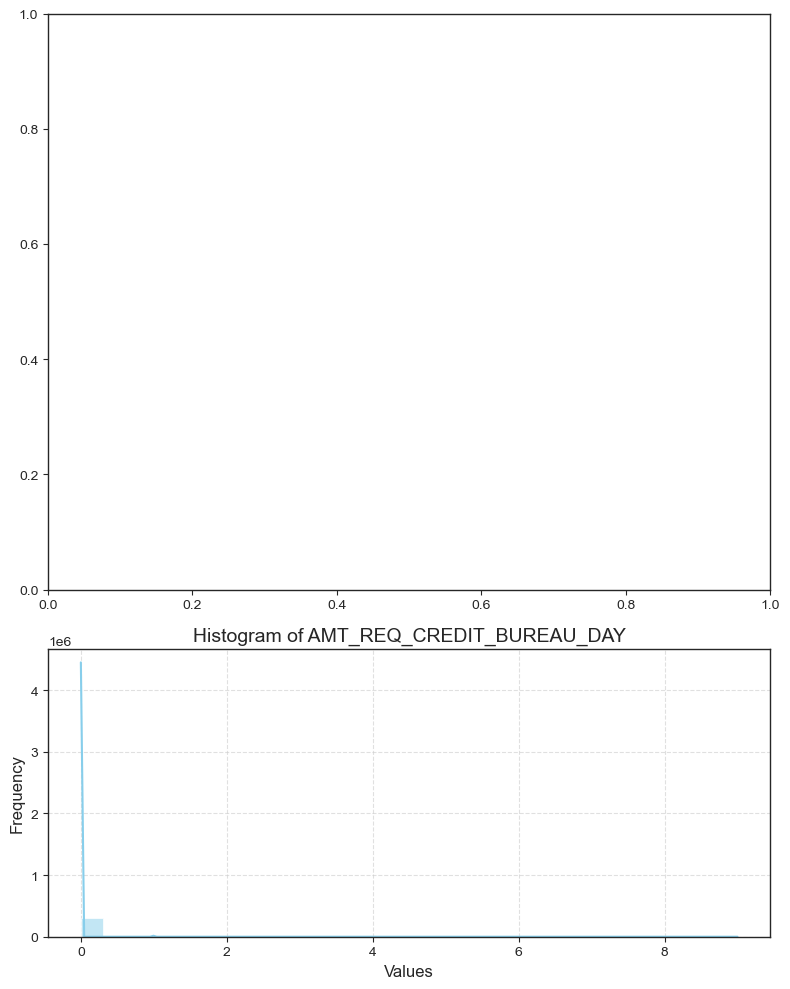

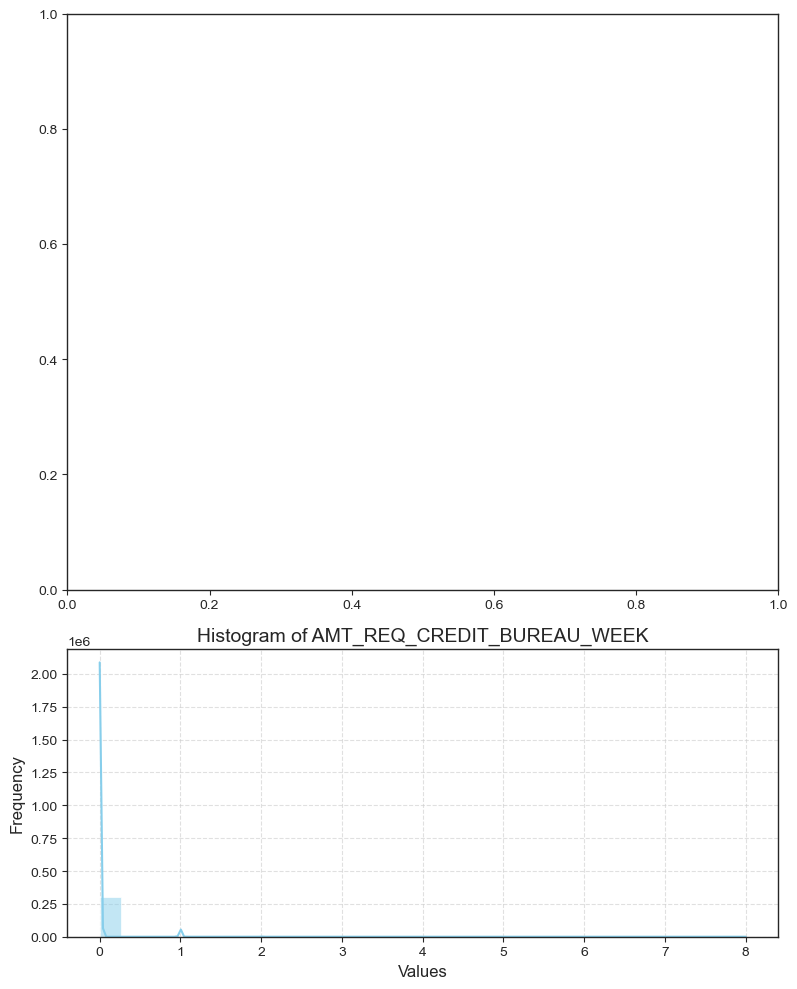

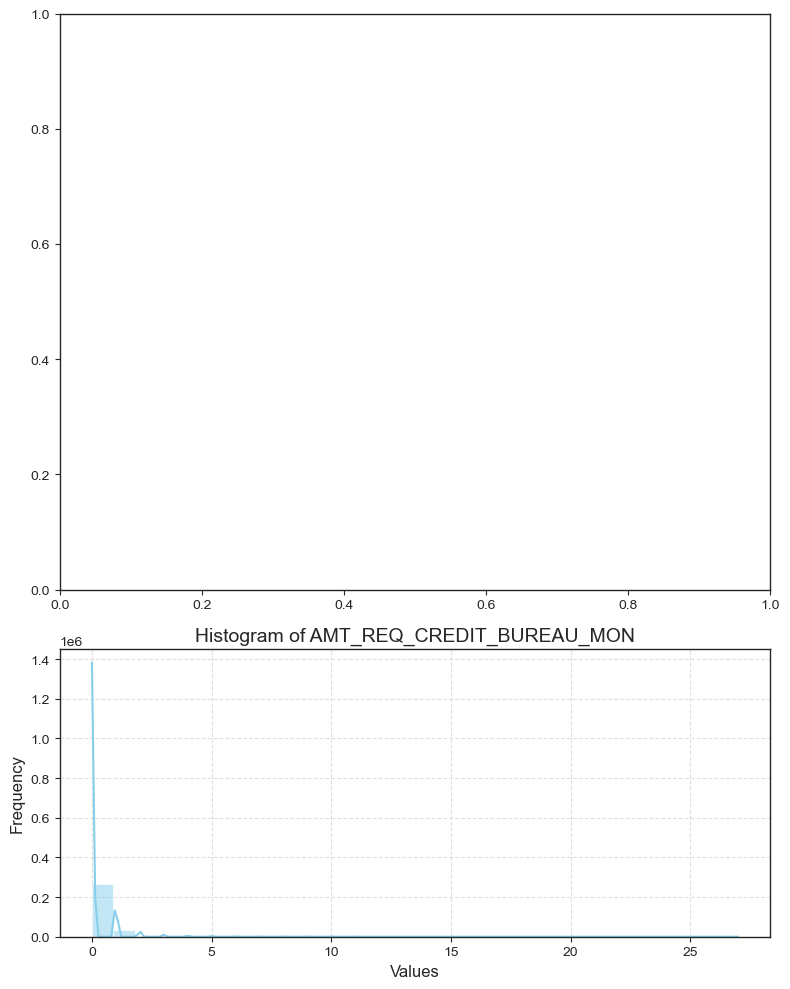

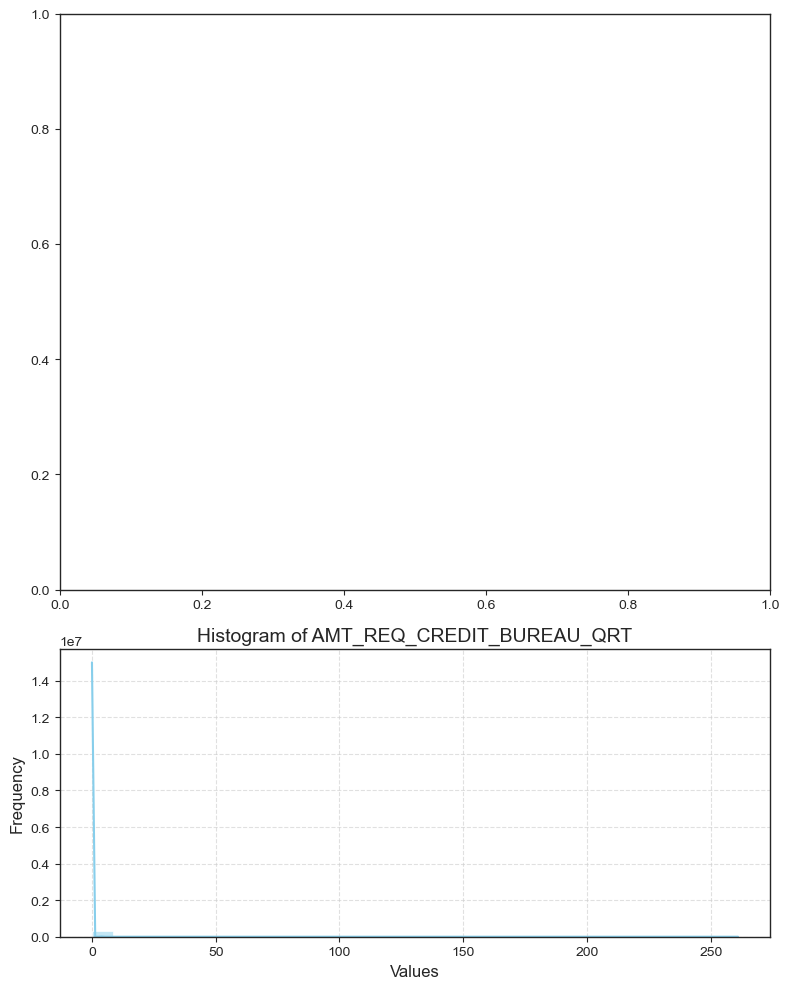

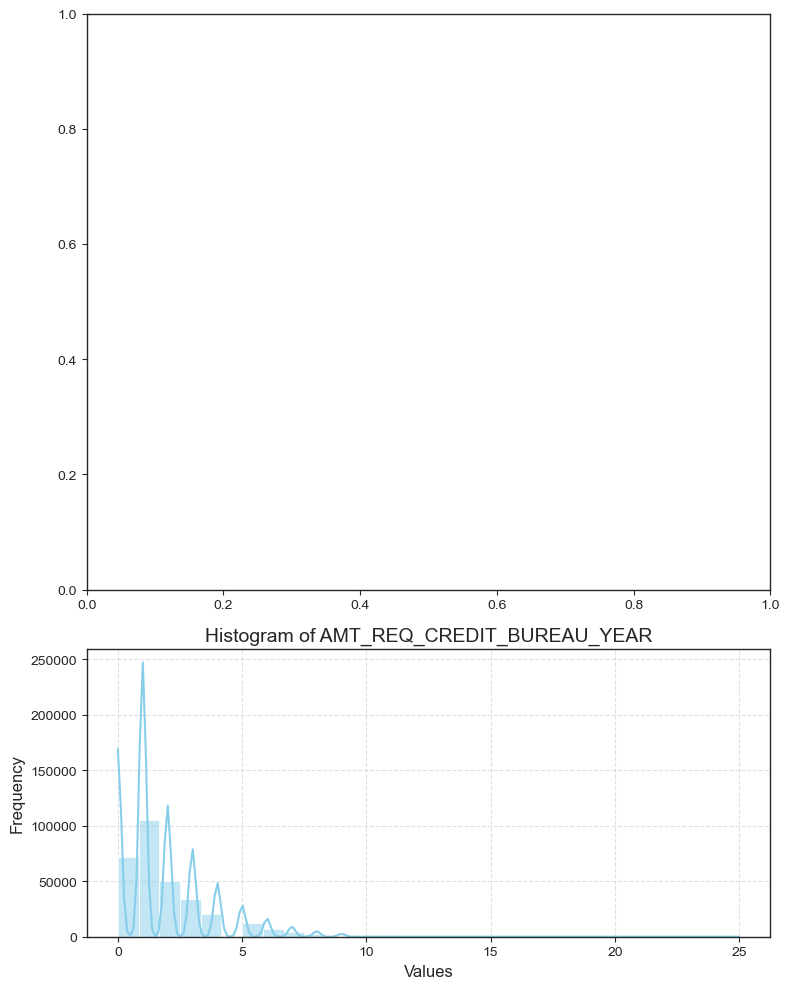

In [12]:
#  For numerical analysis
for column in numerical_columns:
    fig, axes = plt.subplots(2, 1, figsize=(8, 10), gridspec_kw={'height_ratios': [2, 1]})
    sns.histplot(data=df1, x=column, kde=True, ax=axes[1], bins=30, color='skyblue')
    axes[1].set_title(f"Histogram of {column}", fontsize=14)
    axes[1].set_xlabel("Values", fontsize=12)
    axes[1].set_ylabel("Frequency", fontsize=12)
    axes[1].grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
    

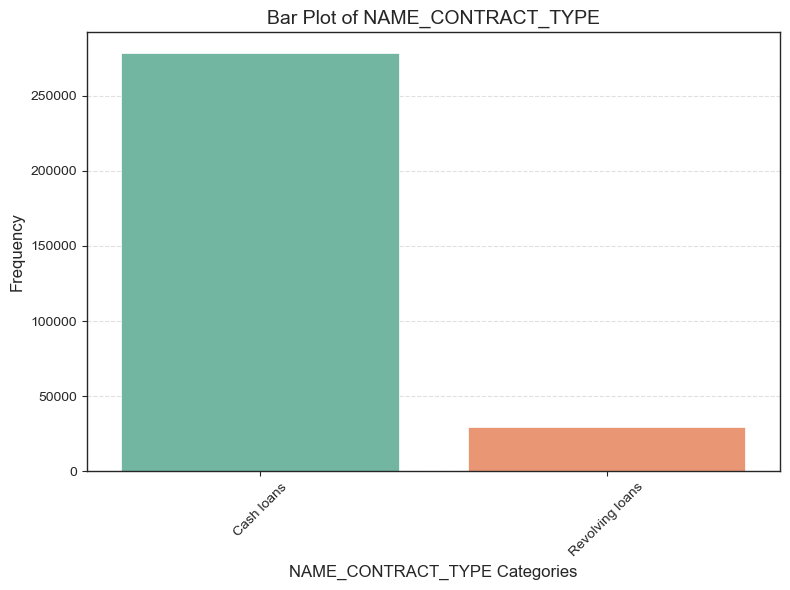

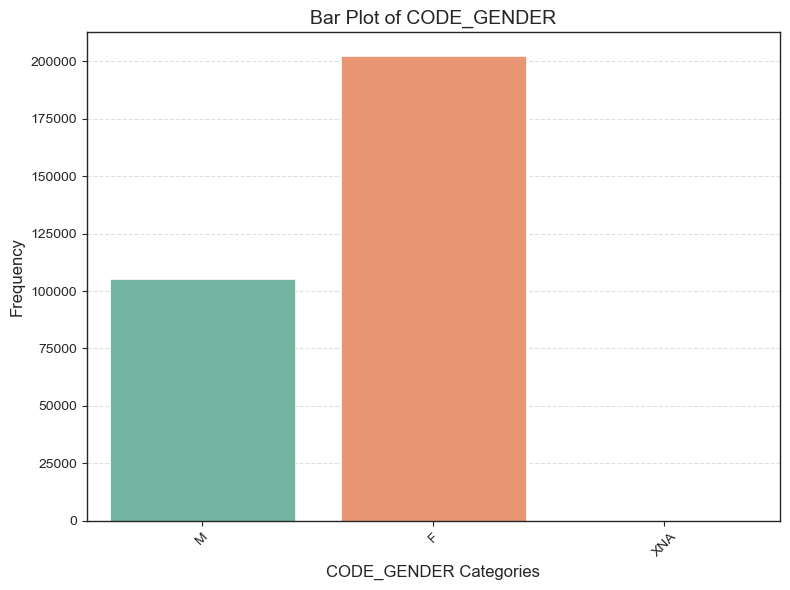

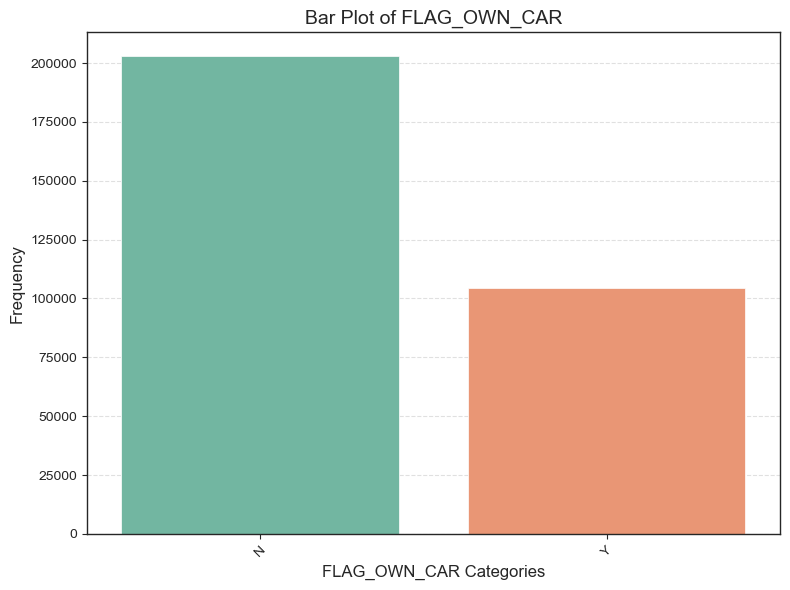

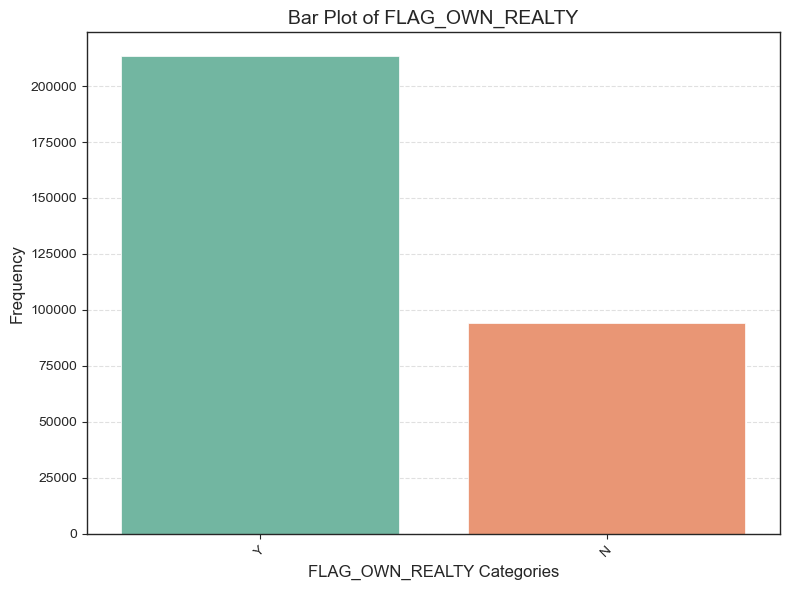

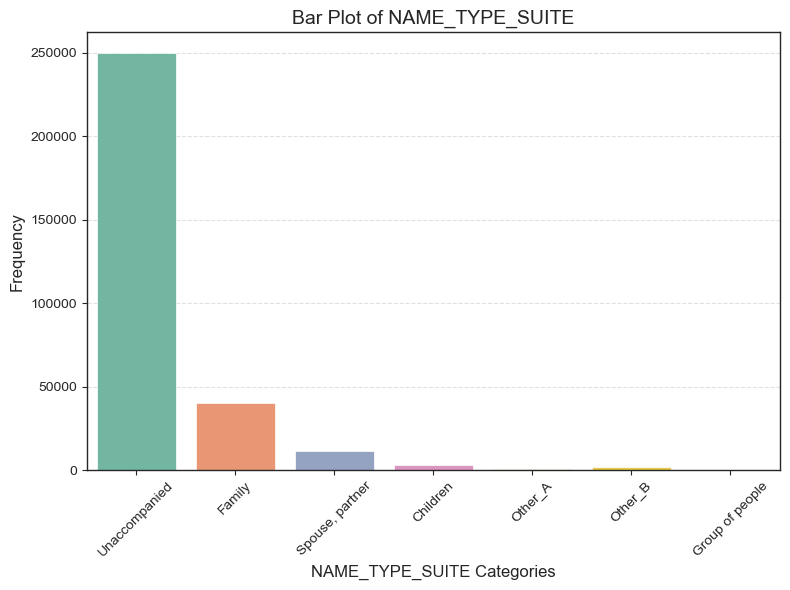

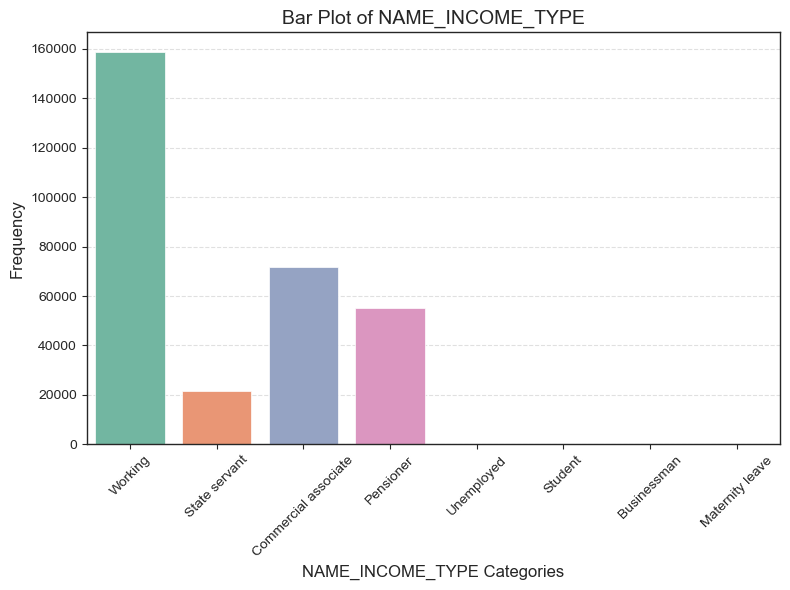

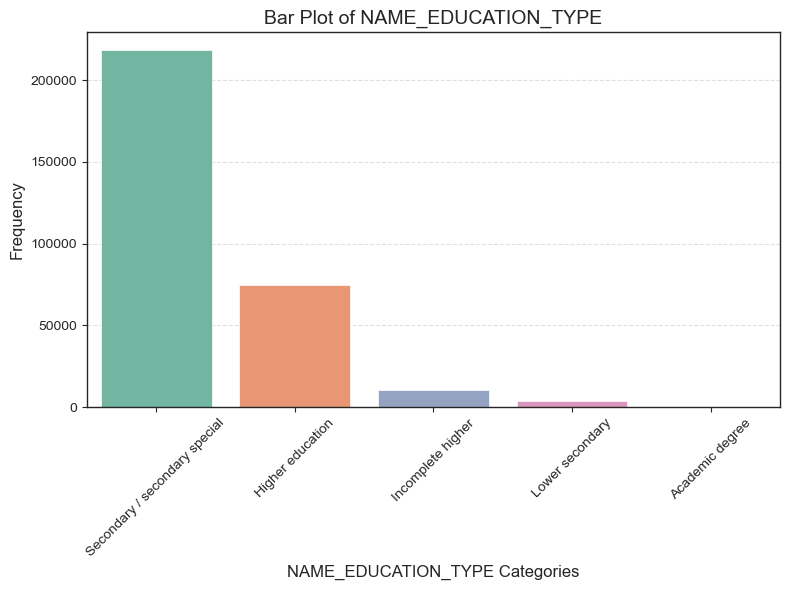

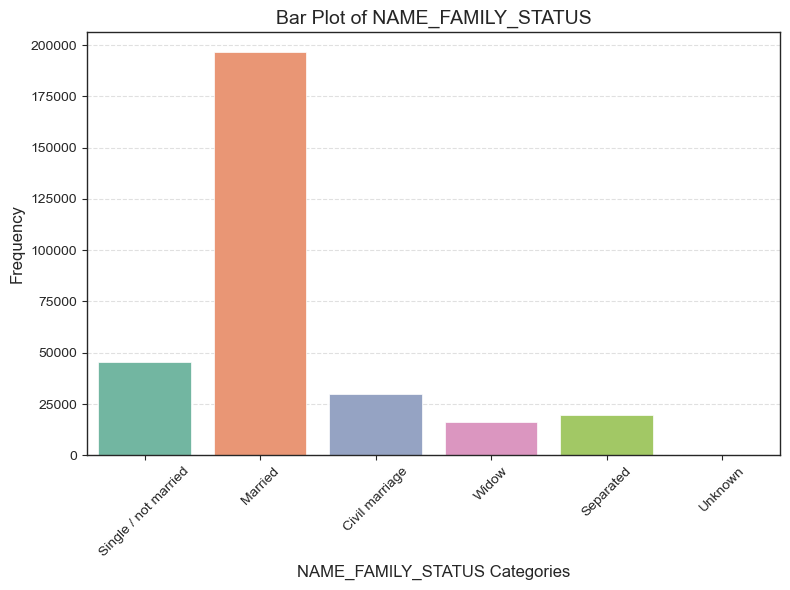

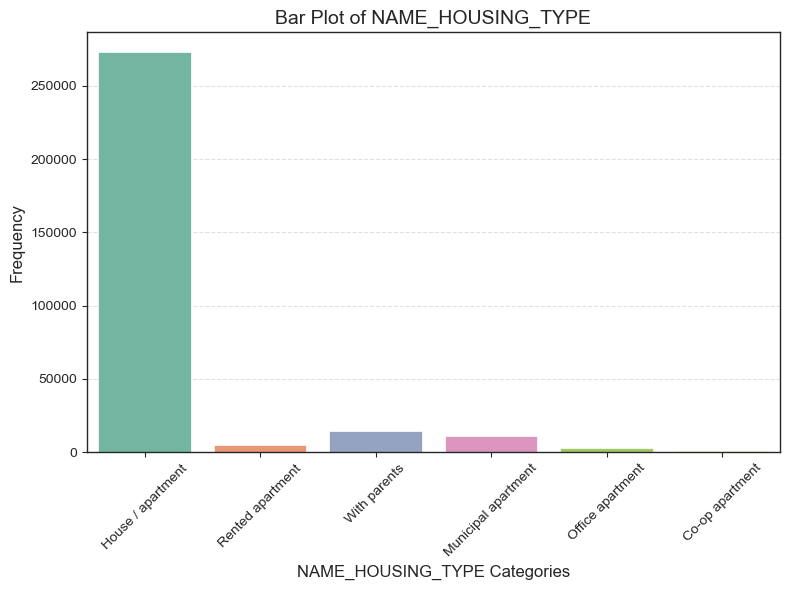

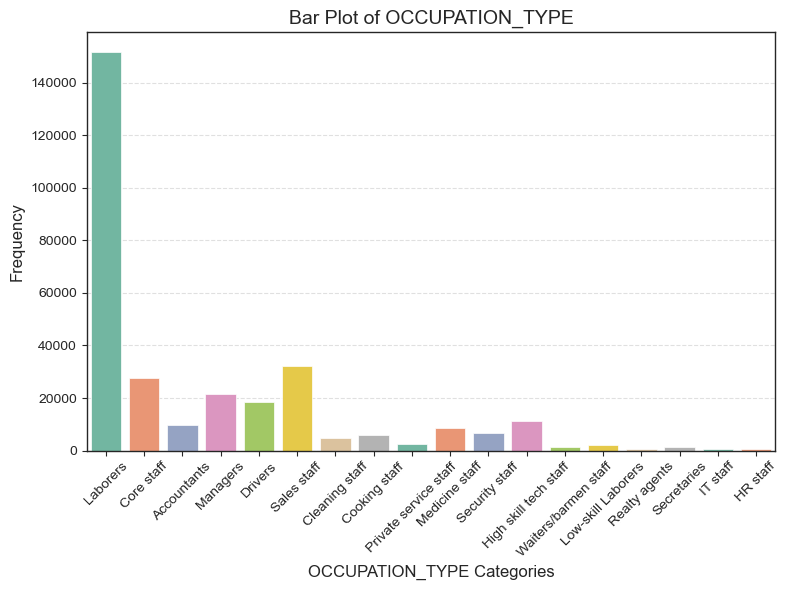

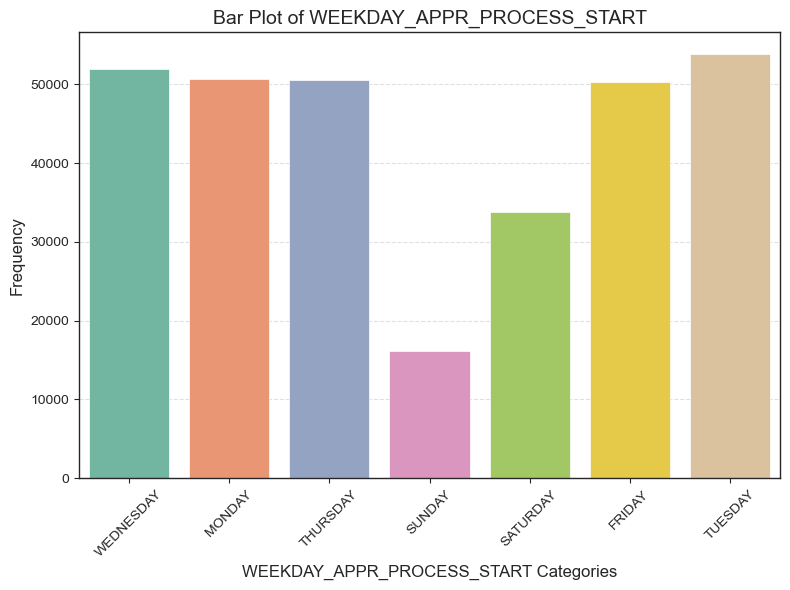

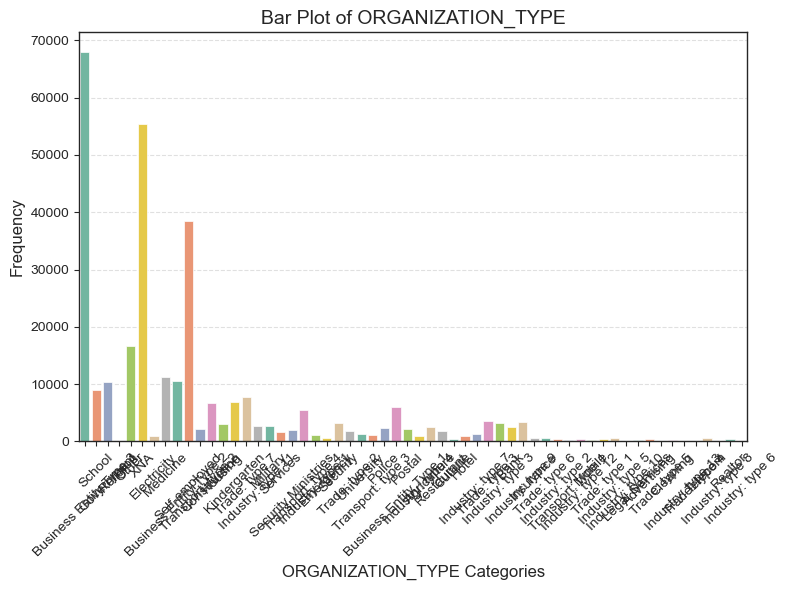

In [13]:
categorical_columns = df1.select_dtypes(include=['object']).columns

# For univariate analysis of categorical columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df1, x=column, palette='Set2')
    plt.title(f"Bar Plot of {column}", fontsize=14)
    plt.xlabel(f"{column} Categories", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6, axis='y')
    plt.tight_layout()
    plt.show()

# **Bivariate Analysis**

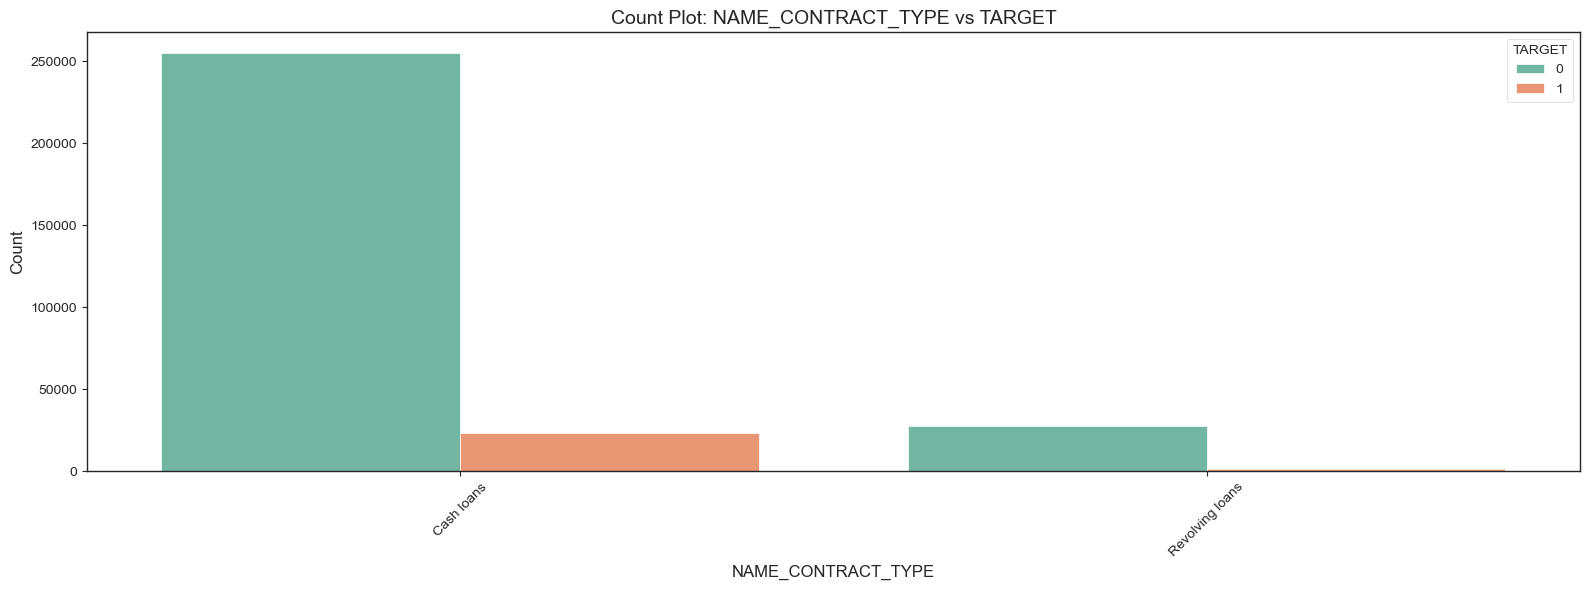

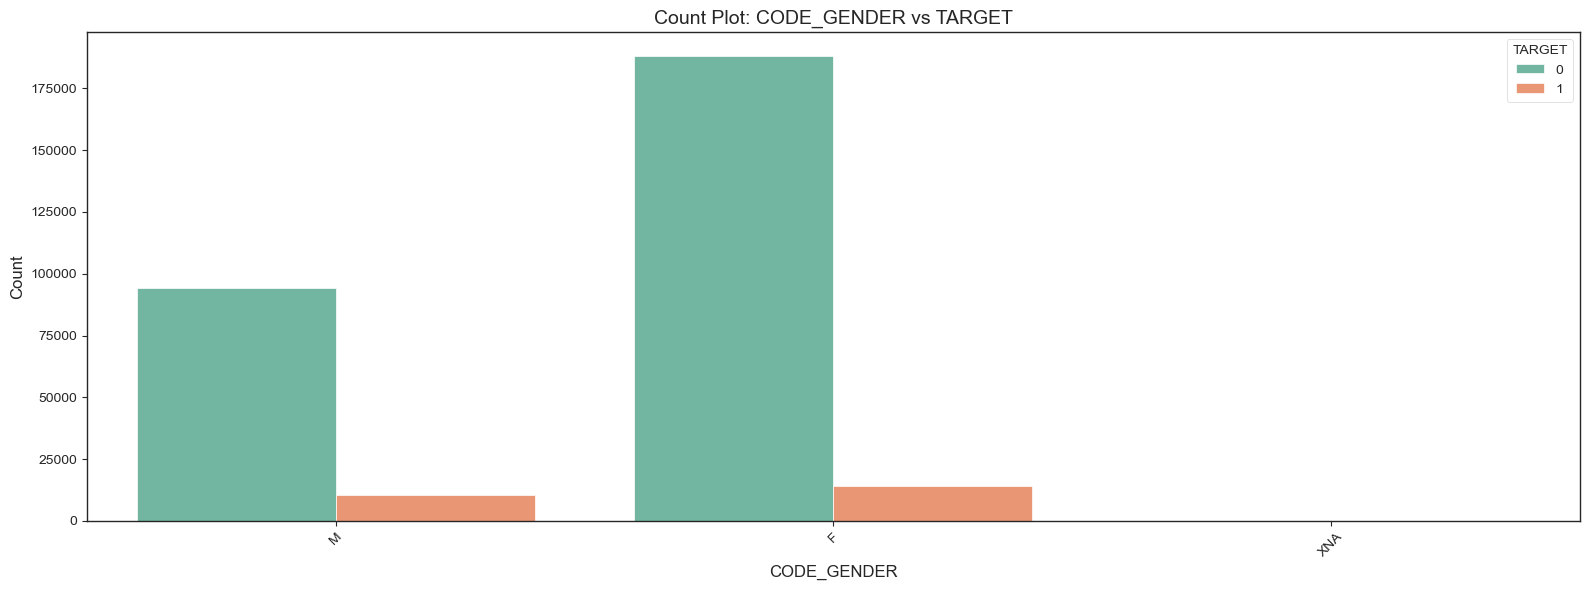

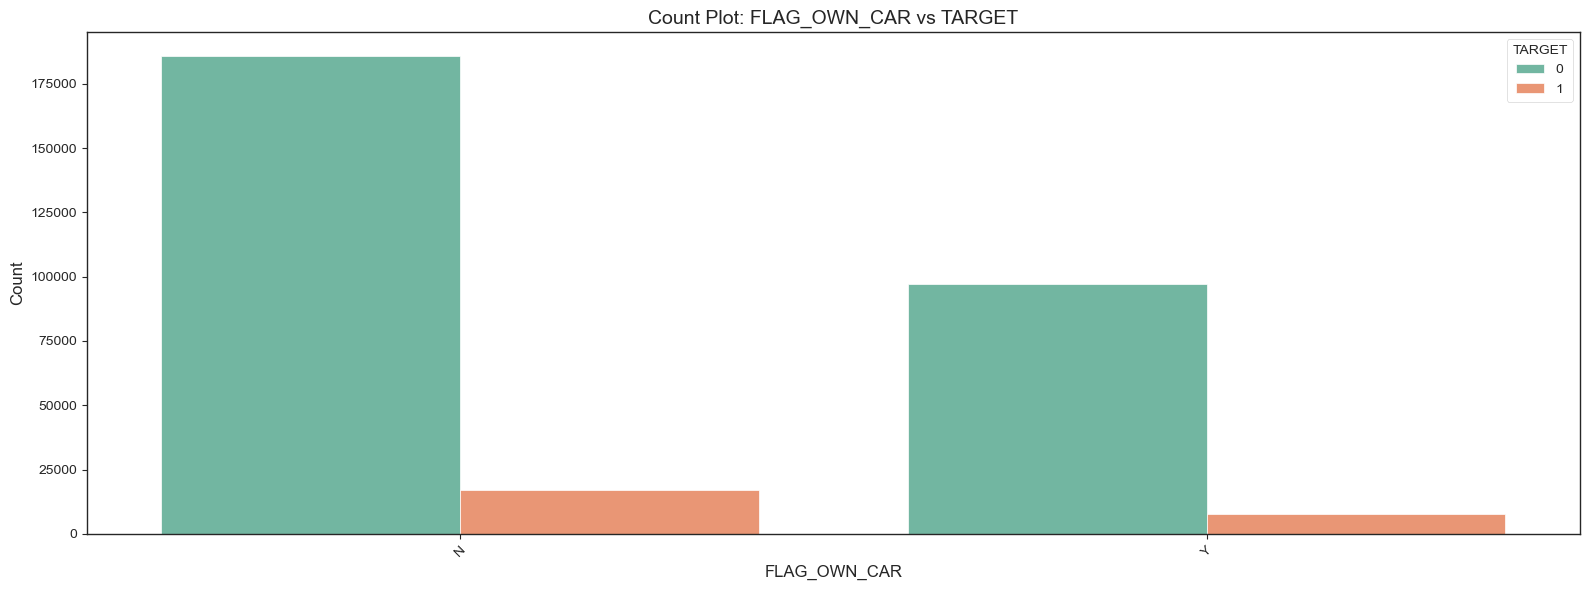

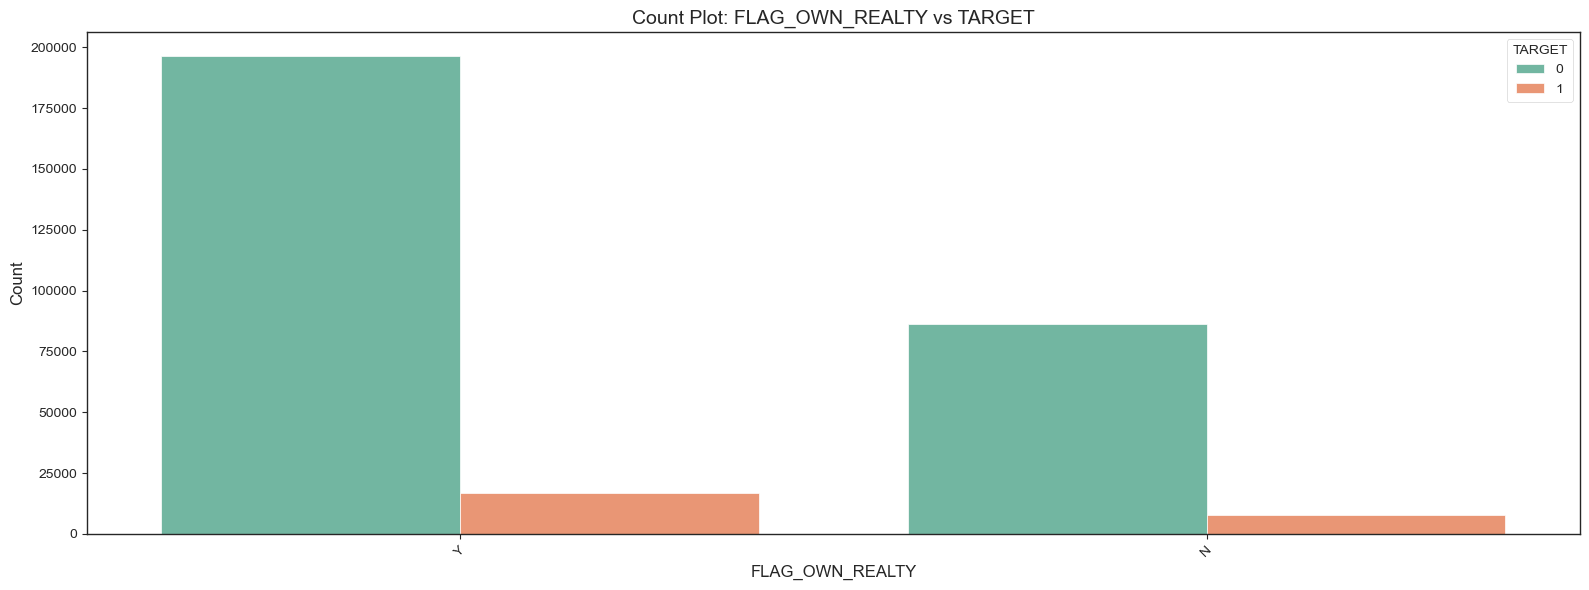

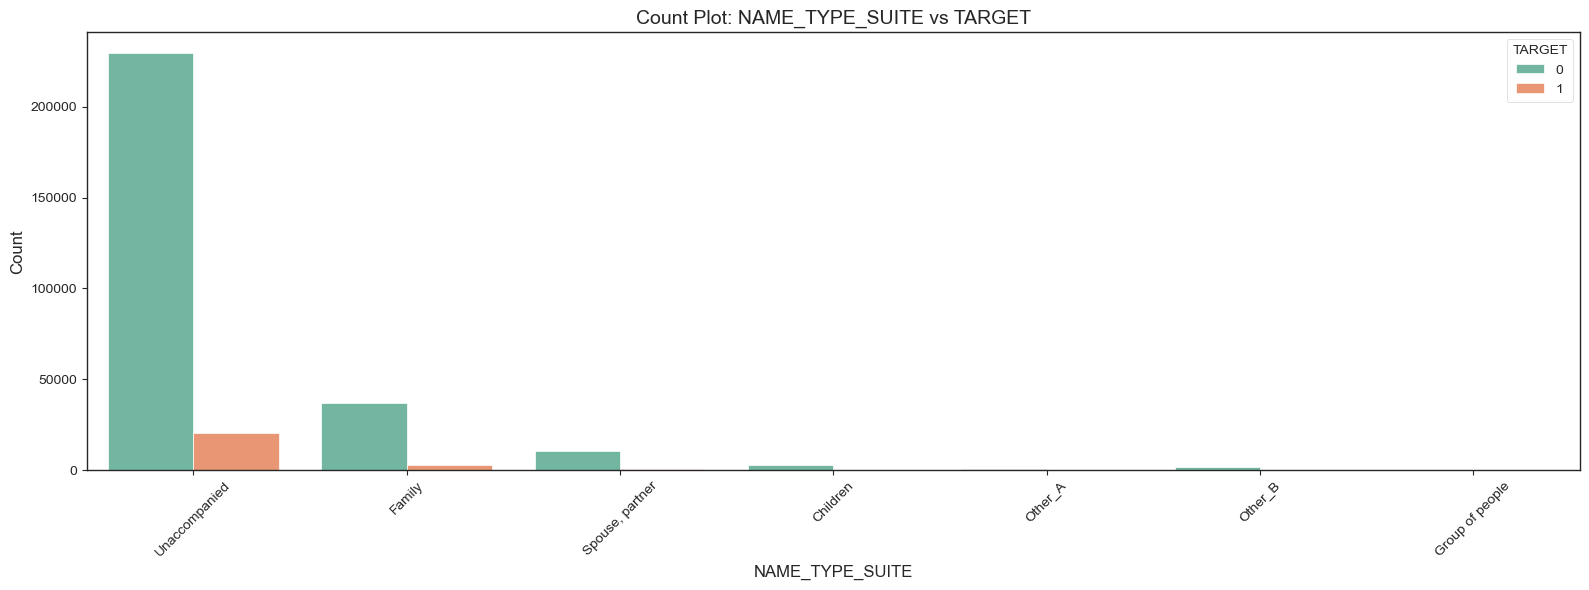

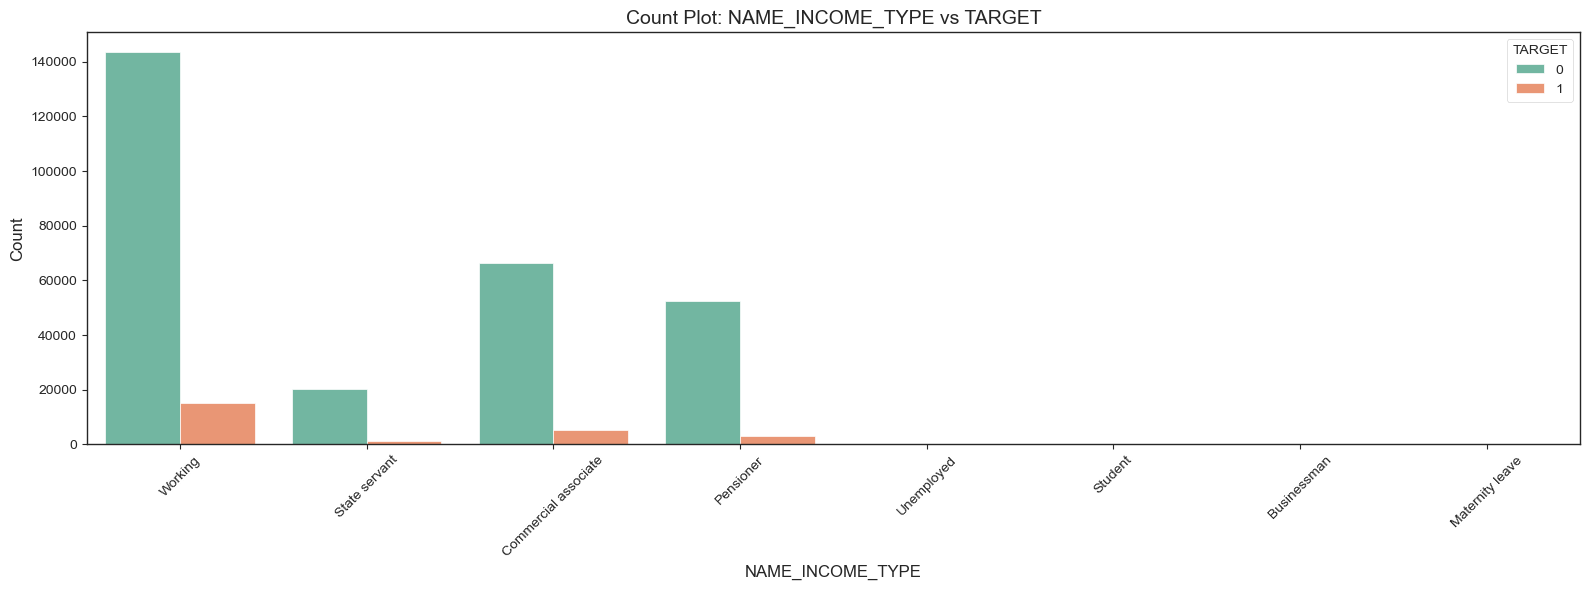

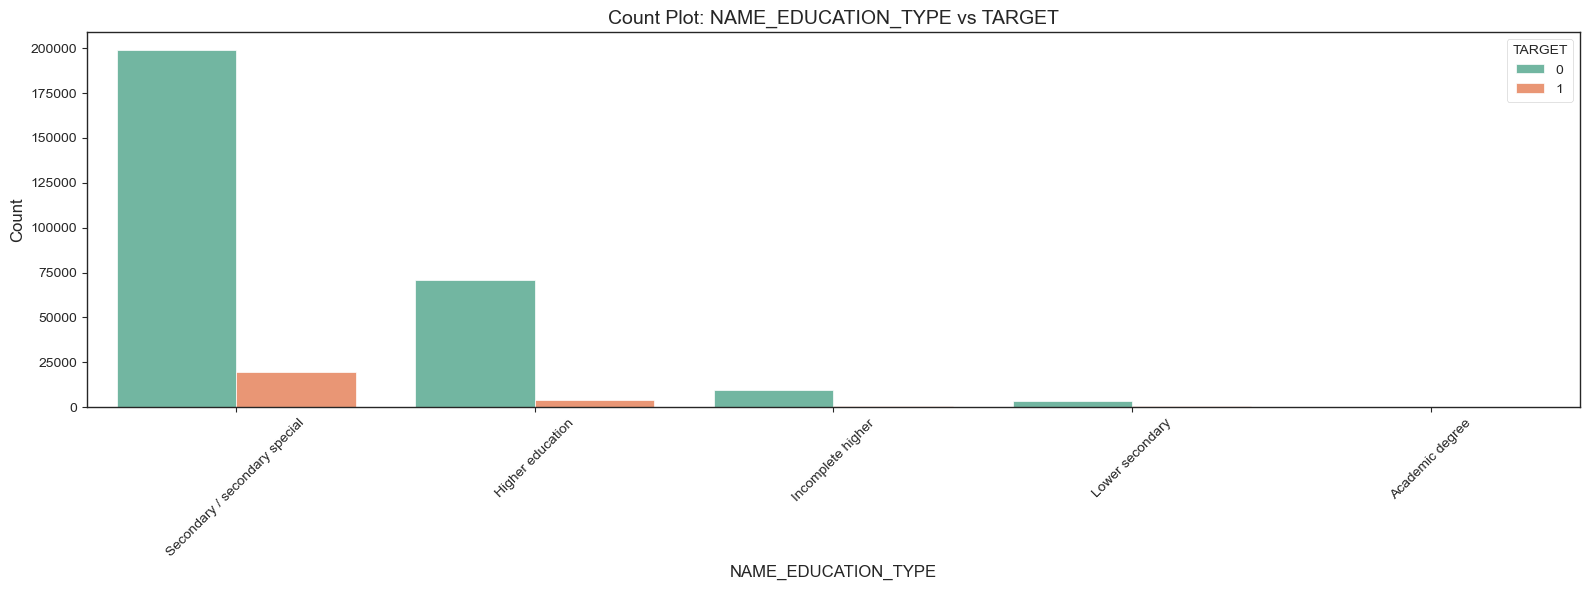

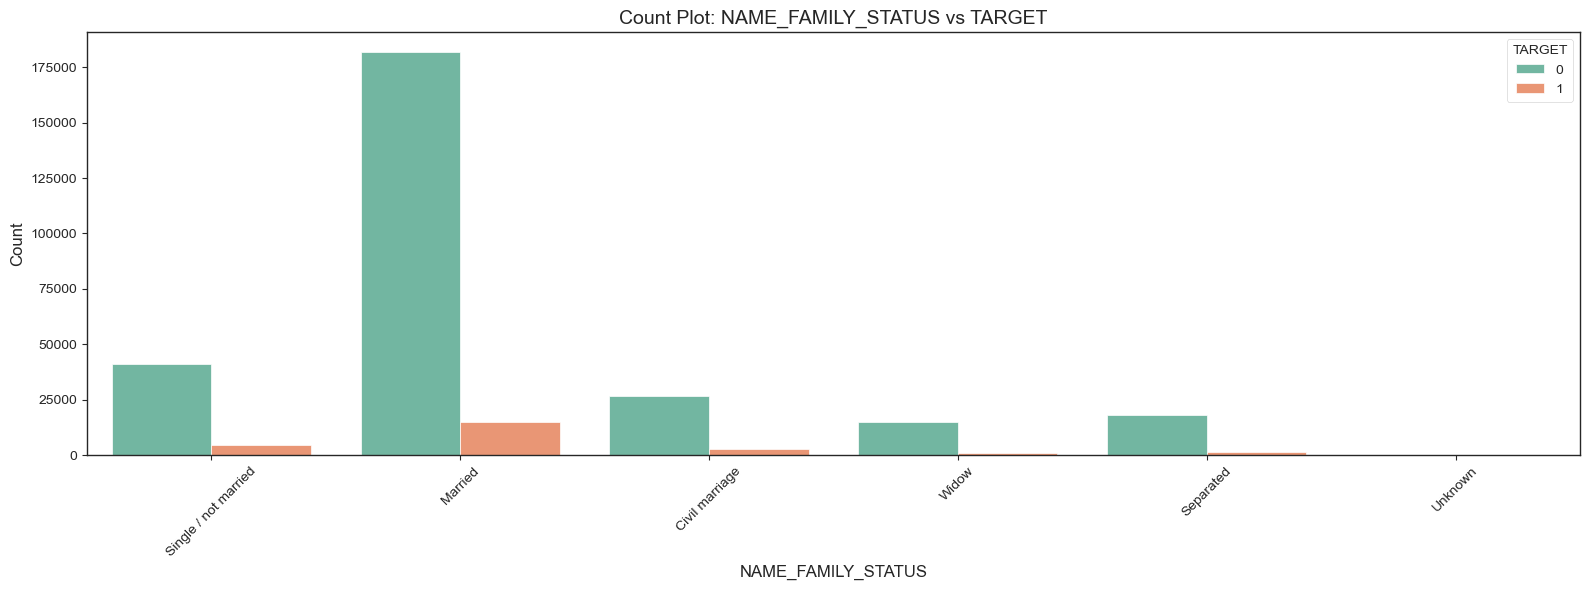

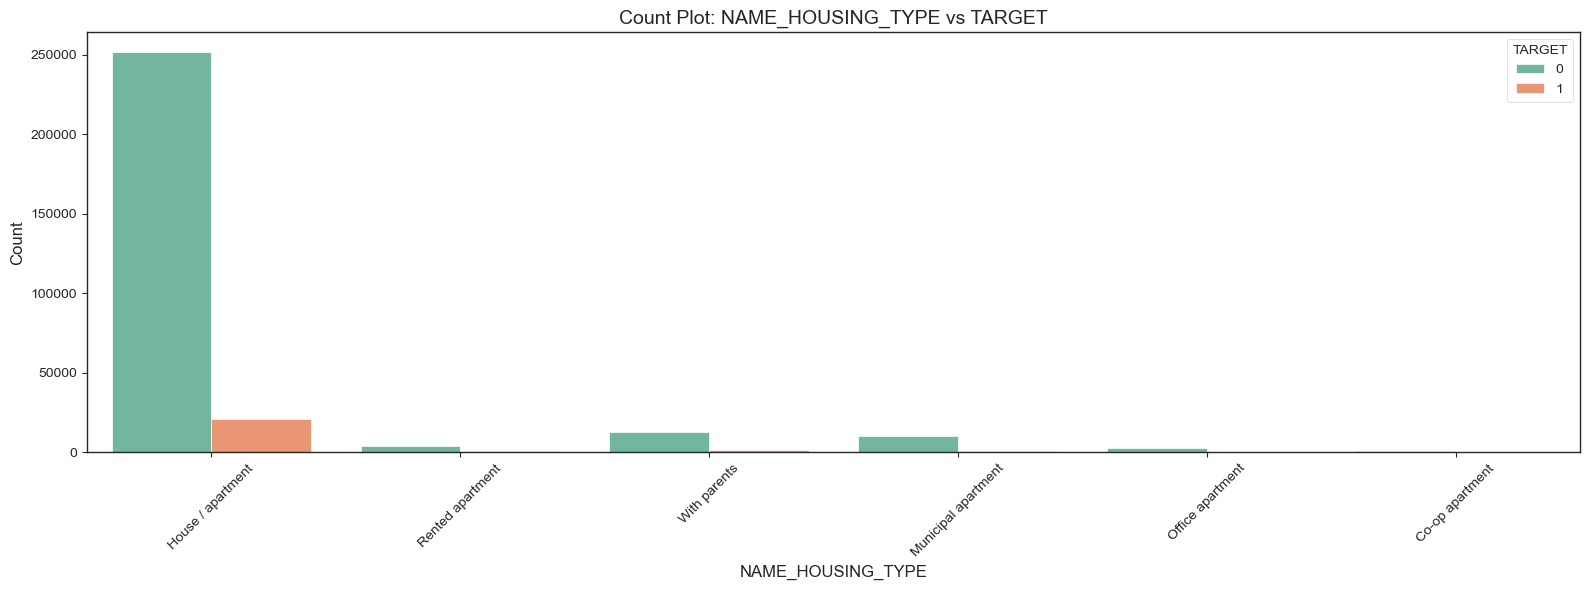

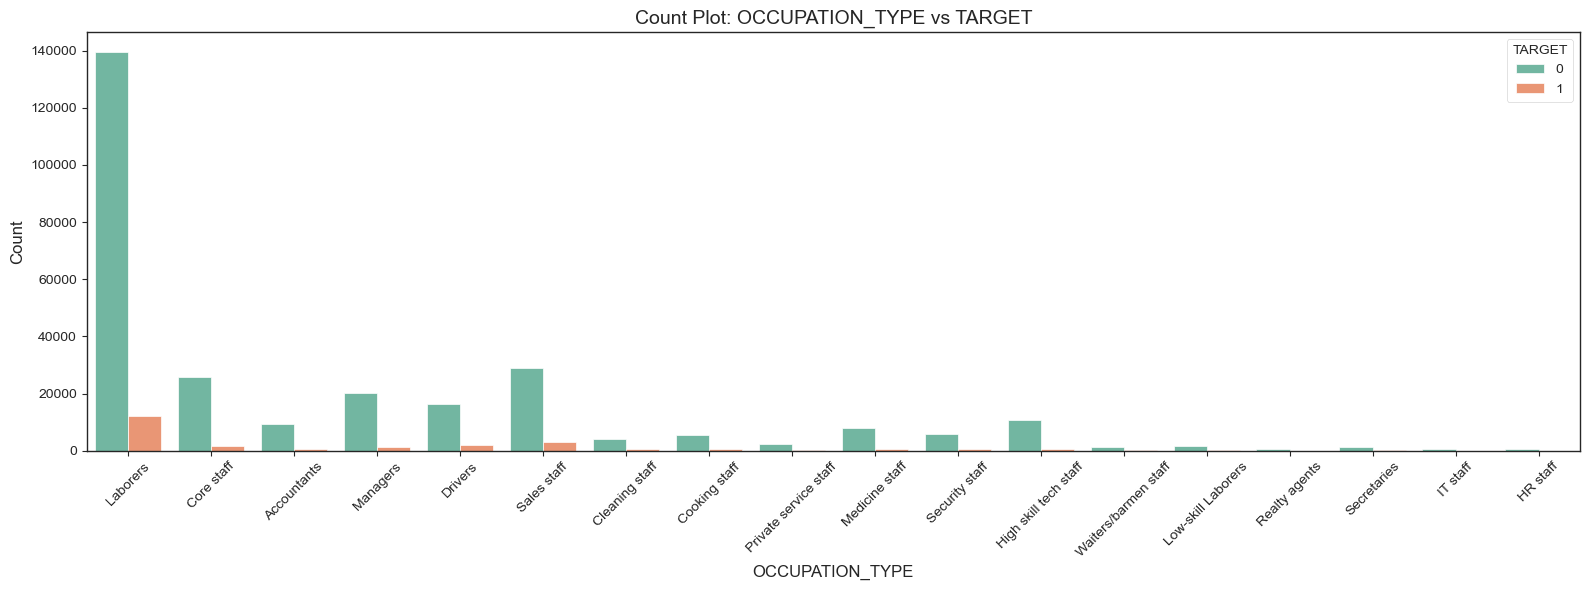

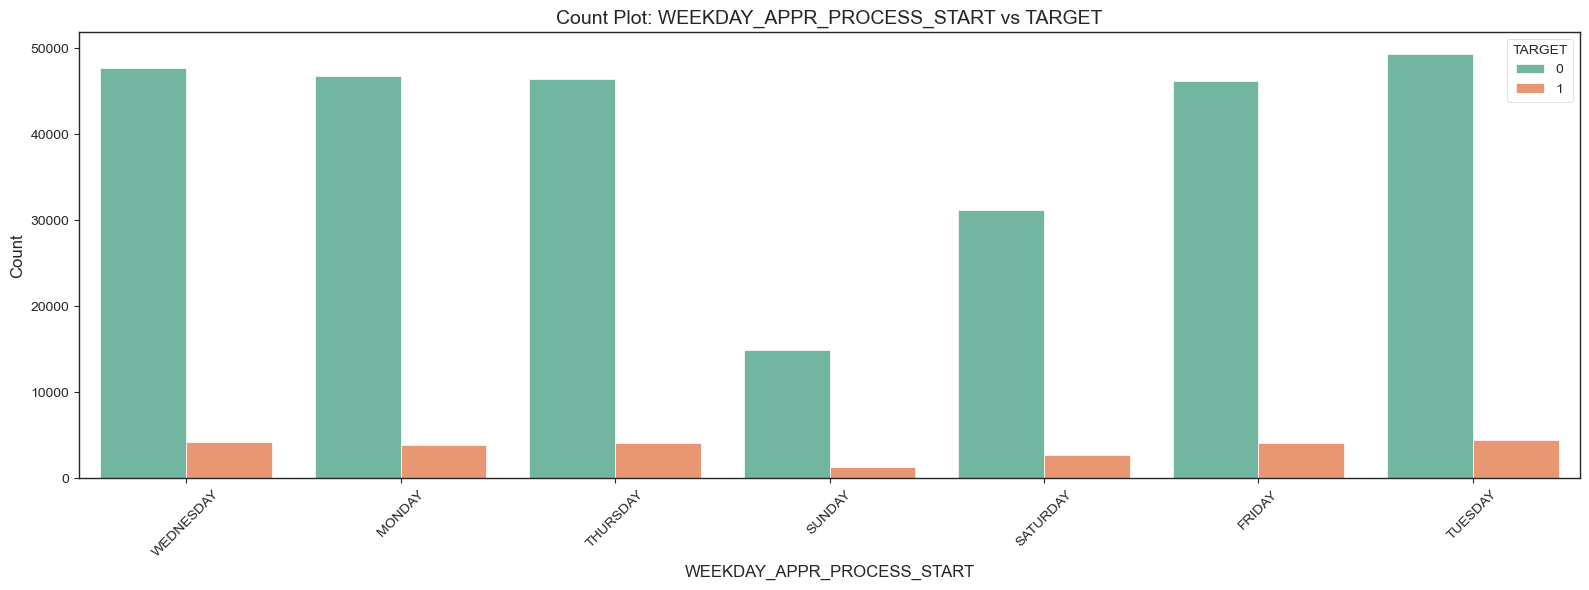

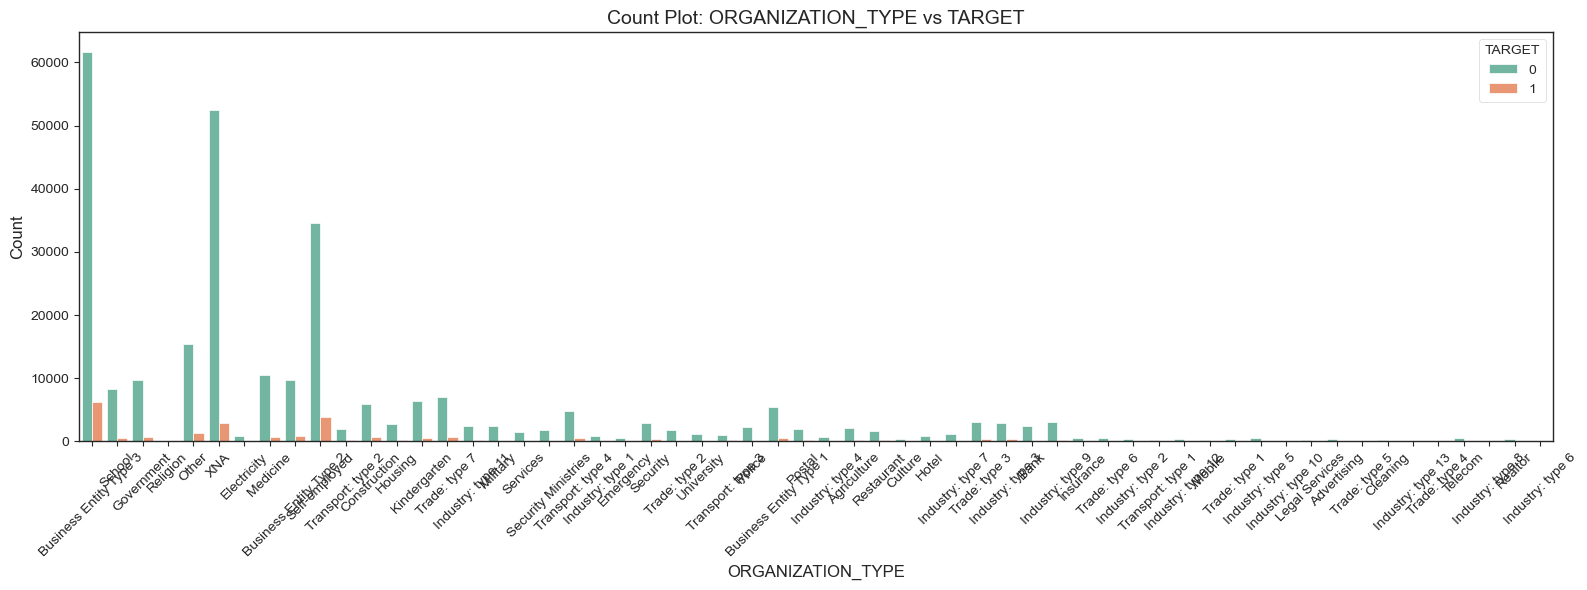

In [16]:
#  for categorical columns
for column in categorical_columns:
    if column != "TARGET":
        plt.figure(figsize=(16, 6))
        sns.countplot(data=df1, x=column, hue="TARGET", palette="Set2")
        plt.title(f"Count Plot: {column} vs TARGET", fontsize=14)
        plt.xlabel(column, fontsize=12)
        plt.ylabel("Count", fontsize=12)
        plt.xticks(rotation=45)  # Rotate labels if necessary
        plt.legend(title="TARGET")
        plt.tight_layout()
        plt.show()

# **Multivariable Analysis**

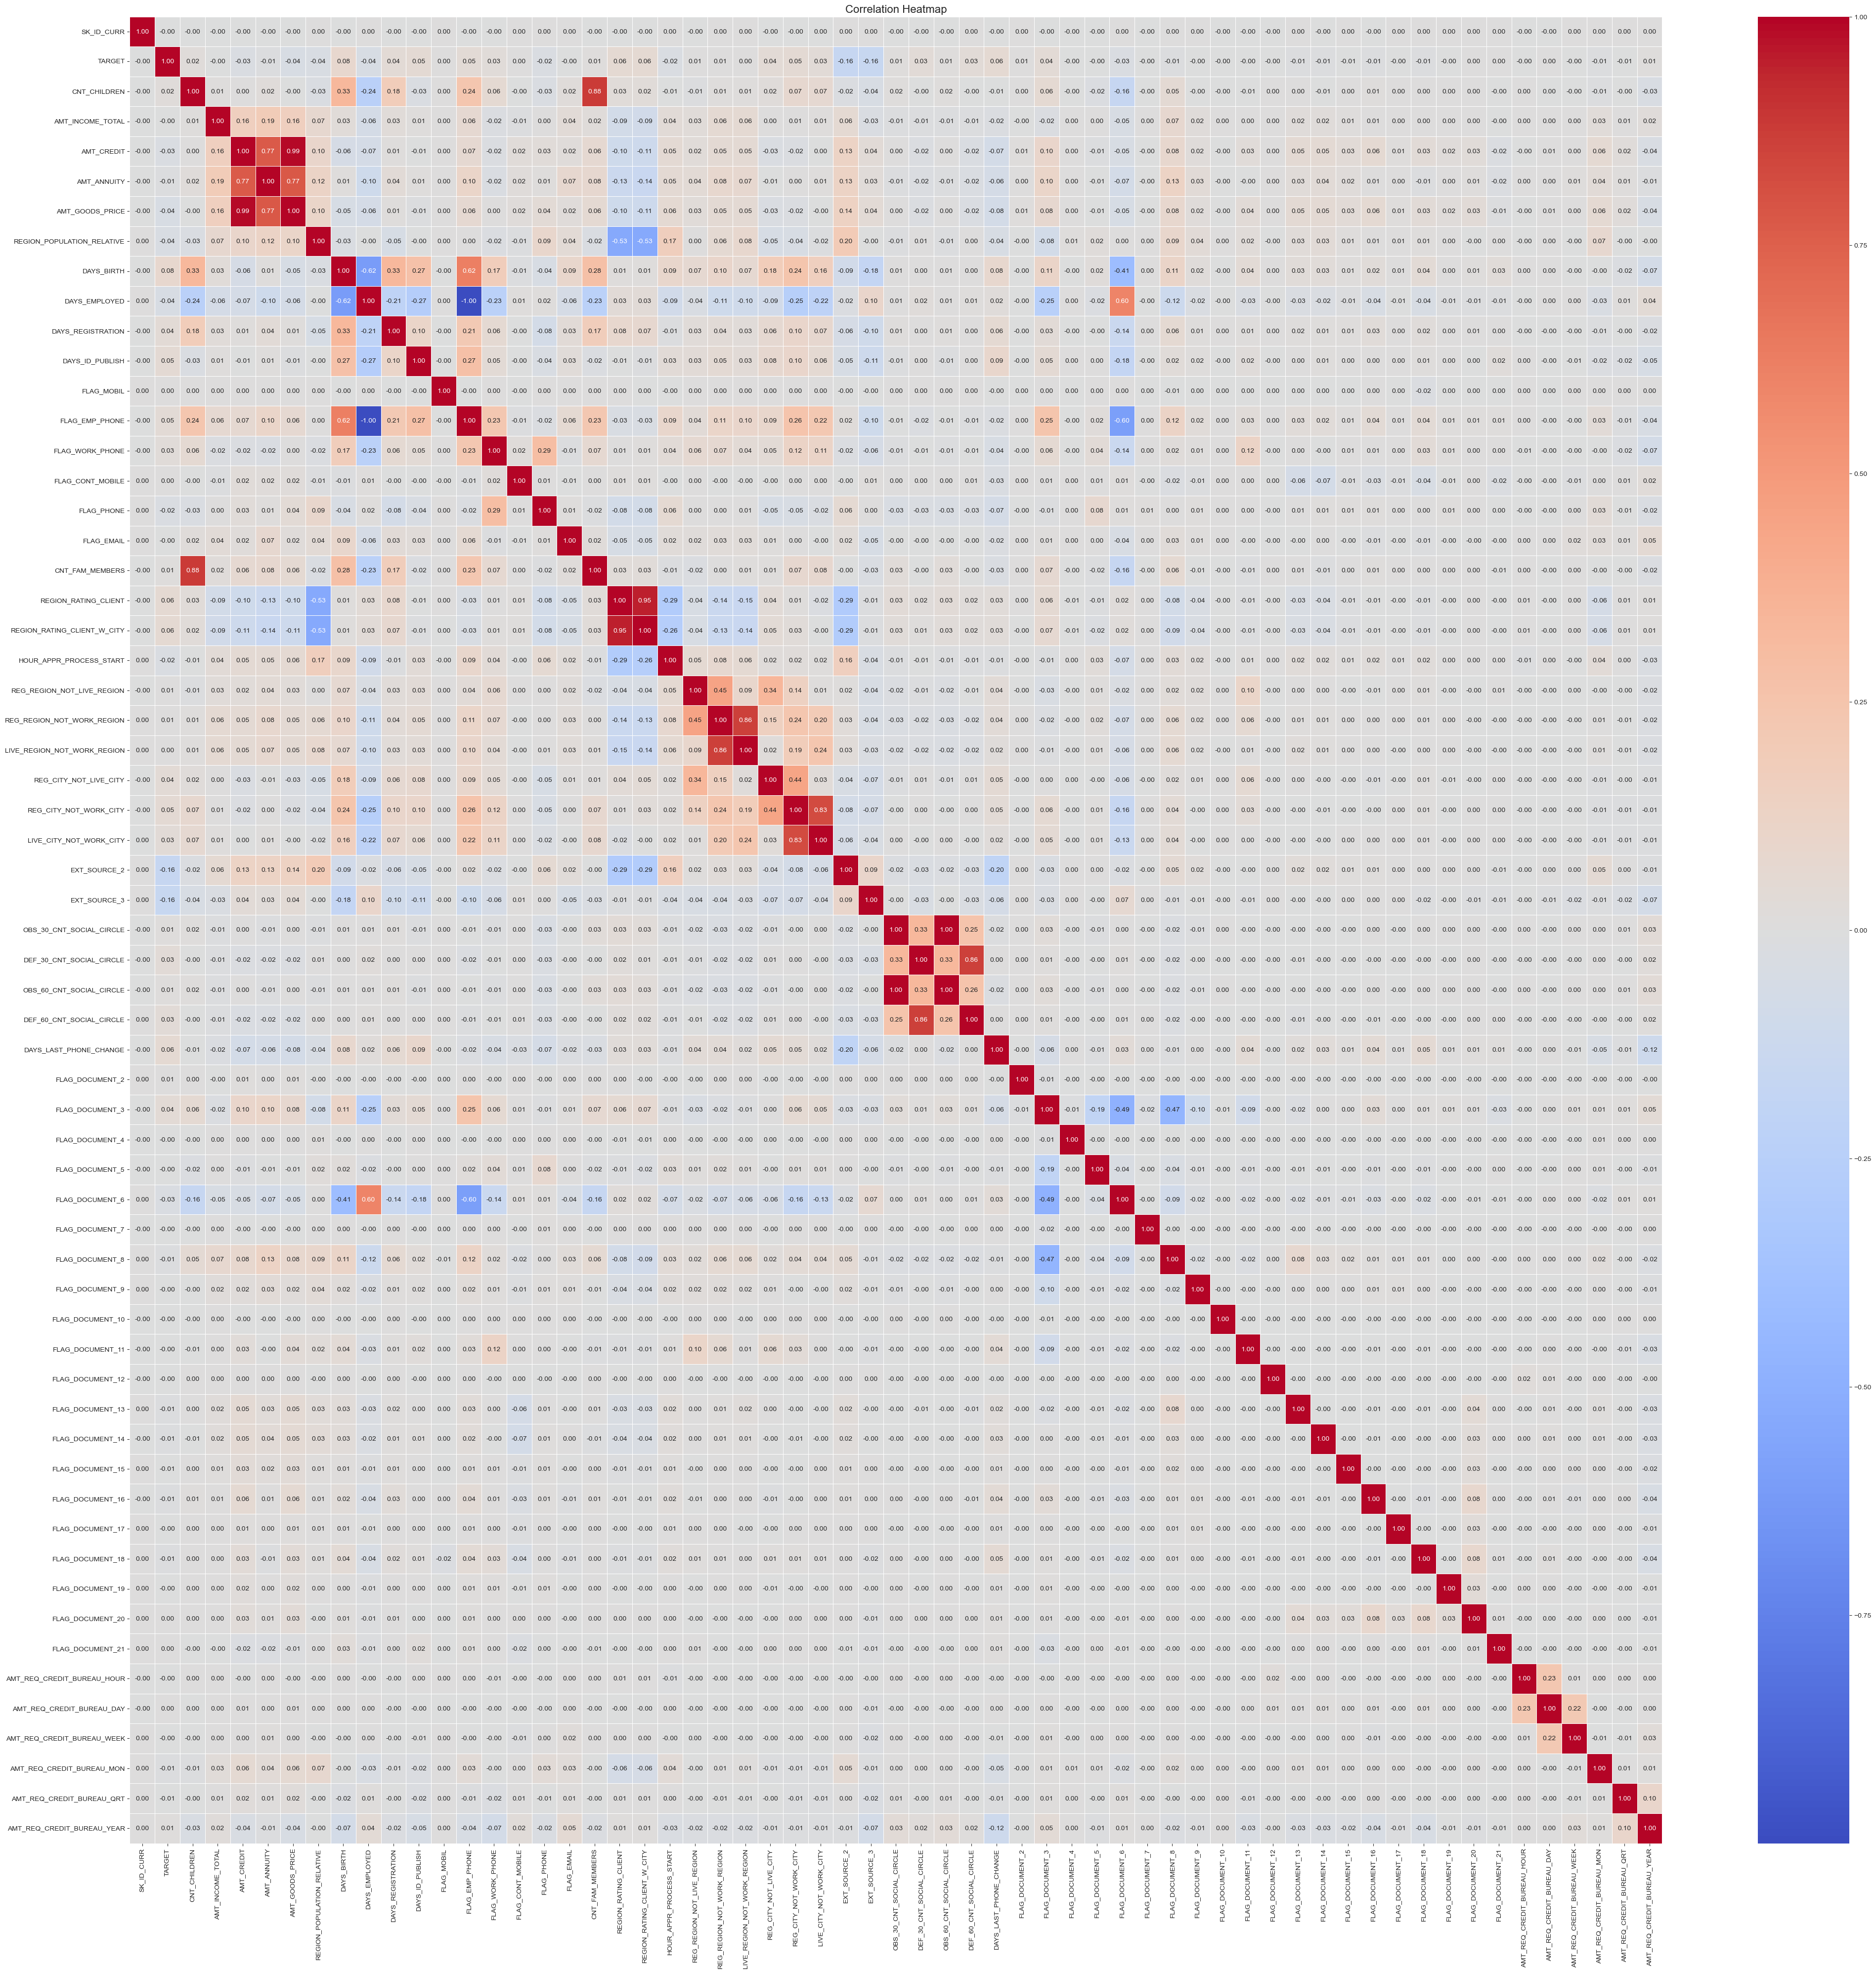

In [28]:
# Compute correlation matrix
correlation_matrix = df1[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(50,48))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()